In [ ]:
# 數據分析

## Setting

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

In [ ]:
myfont = FontProperties(fname=r'/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/TaipeiSansTCBeta-Regular.ttf')

## Read

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/sales_train.csv')

In [ ]:
df_itemCategory = pd.read_csv('/content/drive/MyDrive/課程相關/109-2/資料科學與人工智慧競技/HW4/kaggle_data/items.csv')

In [ ]:
df['date'] = [datetime.strptime(date_str, "%d.%m.%Y") for date_str in df['date'].values]

In [ ]:
item_cate = {}
for i in df_itemCategory.index:
    # print(df_itemCategory['item_id'][i], df_itemCategory['item_category_id'][i])
    item_cate[df_itemCategory['item_id'][i]] = df_itemCategory['item_category_id'][i]
df['item_category_id'] = [item_cate[item_id] for item_id in df['item_id']]

In [ ]:
pd.set_option('max_columns', None)
print(df)
print(df.keys())

              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3              

In [ ]:
month_cnt = np.unique(df['date_block_num']).shape[0]
shop_cnt = np.unique(df['shop_id']).shape[0]
cate_cnt = np.unique(df['item_category_id']).shape[0]
item_cnt = np.unique(df_itemCategory['item_id']).shape[0]

print('month_cnt -> ', month_cnt)
print('shop_cnt -> ', shop_cnt)
print('cate_cnt -> ', cate_cnt)
print('item_cnt -> ', item_cnt)

month_cnt ->  34
shop_cnt ->  60
cate_cnt ->  84
item_cnt ->  22170


## 營業額 / 月

In [ ]:
d = np.zeros([month_cnt])

In [ ]:
total_price = df['item_price'] * df['item_cnt_day']
block_num = df['date_block_num']

In [ ]:
for i in range(34):
    d[i] = np.sum(total_price[block_num == i])

In [ ]:
dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]

Text(0.5, 1.0, '每月營業額')

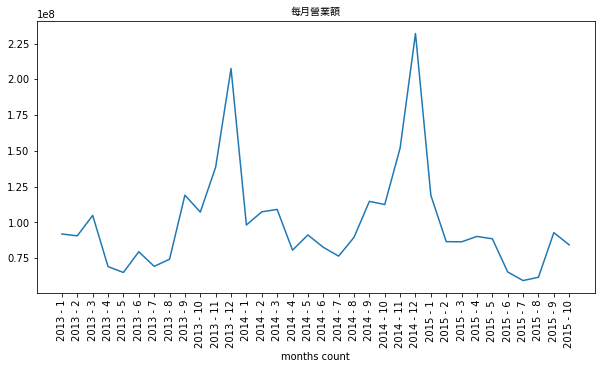

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(d)
plt.xticks(ticks=range(34), labels=label, rotation=90)
plt.xlabel('months count')
plt.title('每月營業額', fontproperties=myfont)

## 各類別銷量 / 月

In [ ]:
d = np.zeros([month_cnt,cate_cnt])

In [ ]:
item_category_id = df['item_category_id']
block_num = df['date_block_num']
sale_count = df['item_cnt_day']
for i in df.index:
    d[block_num[i], item_category_id[i]] += sale_count[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


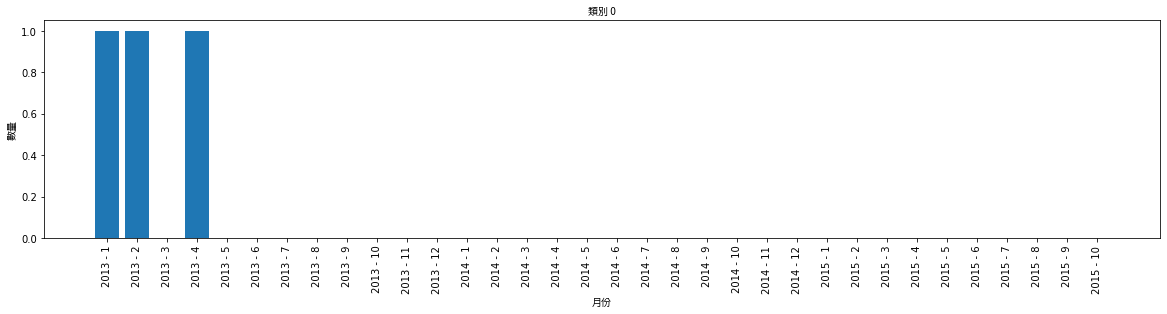

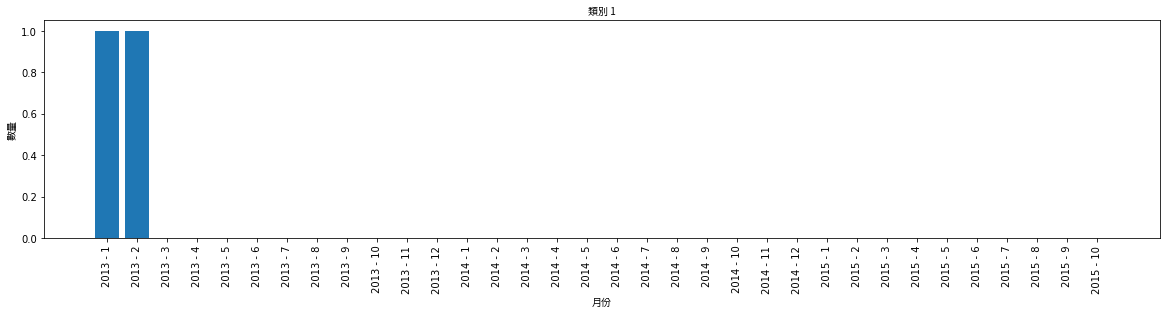

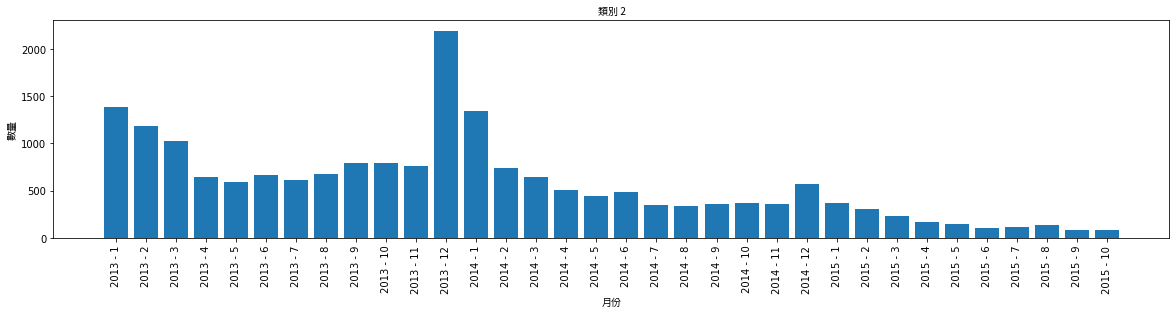

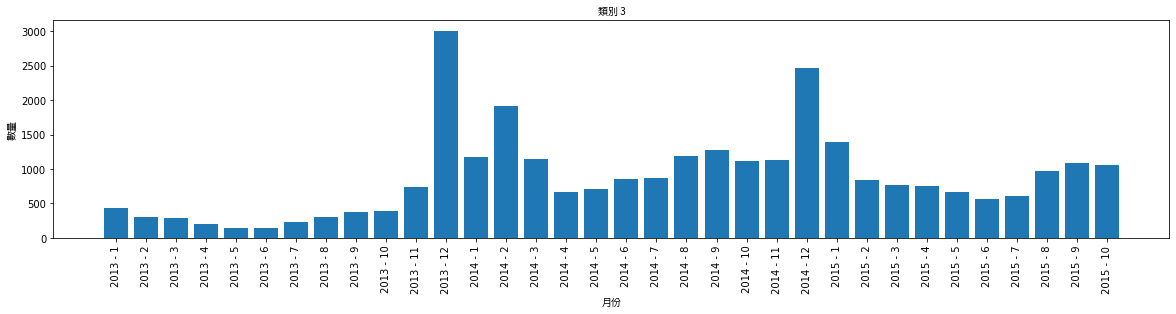

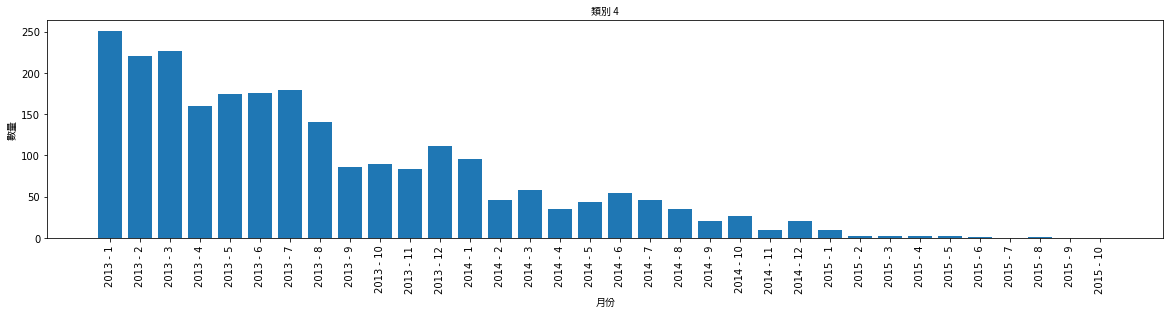

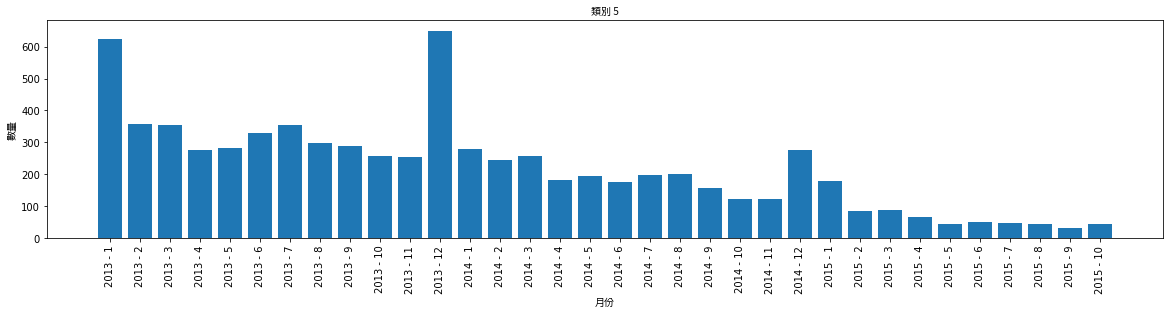

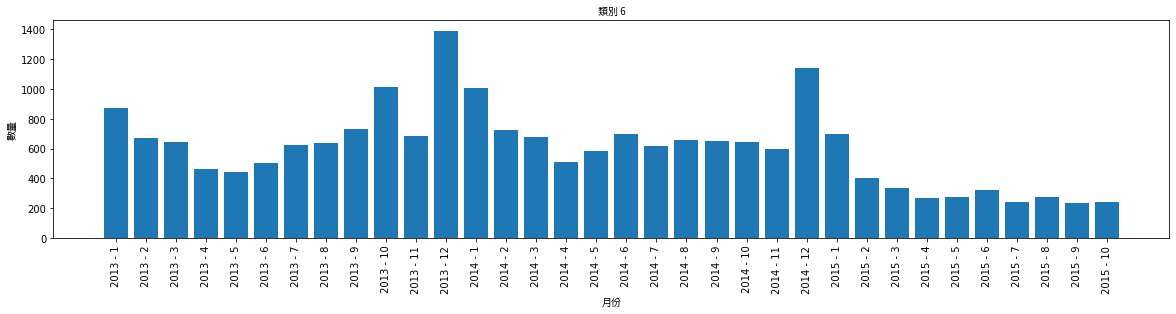

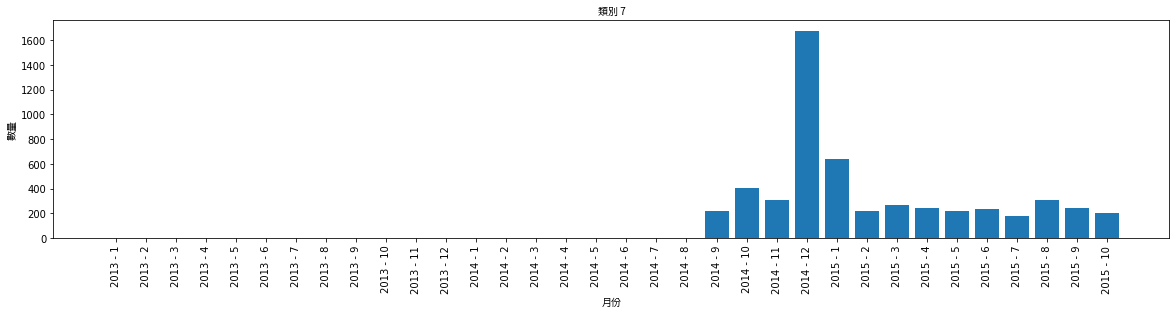

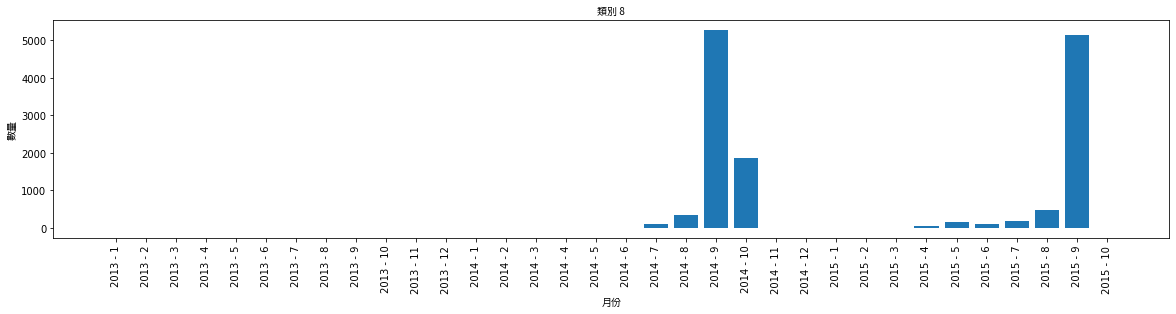

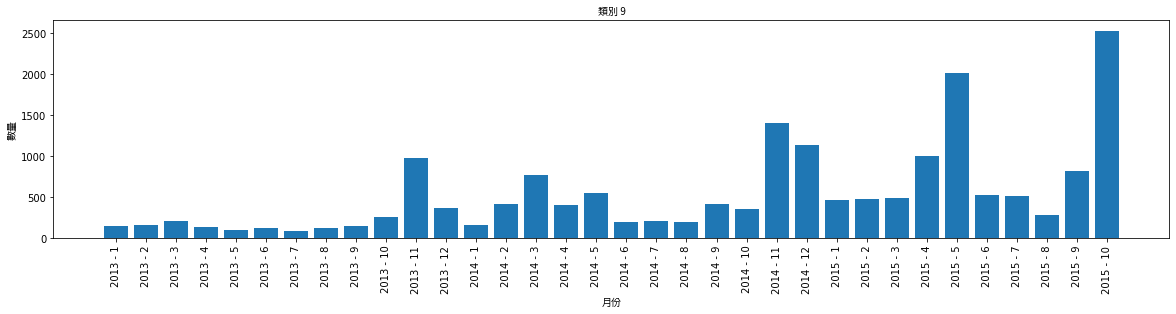

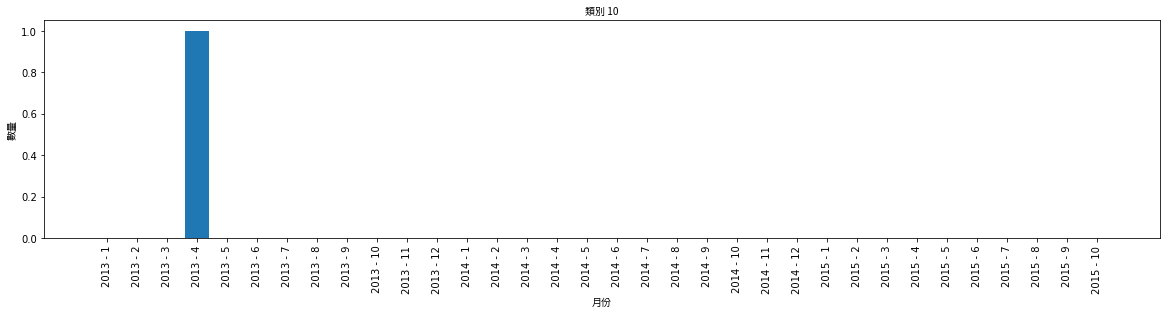

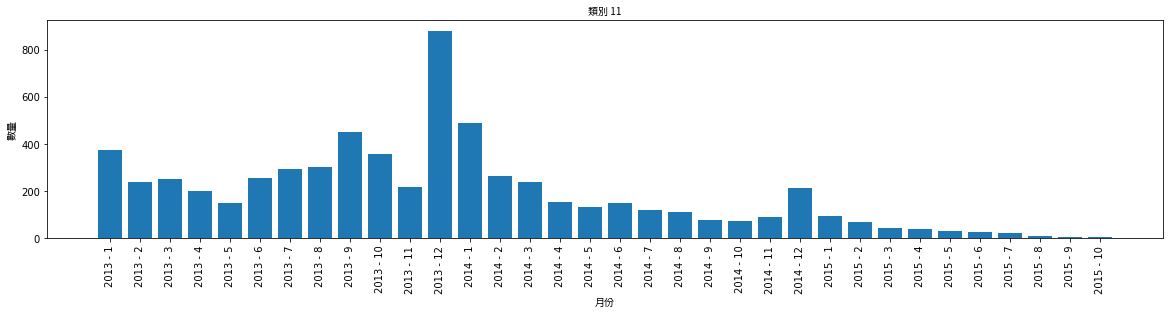

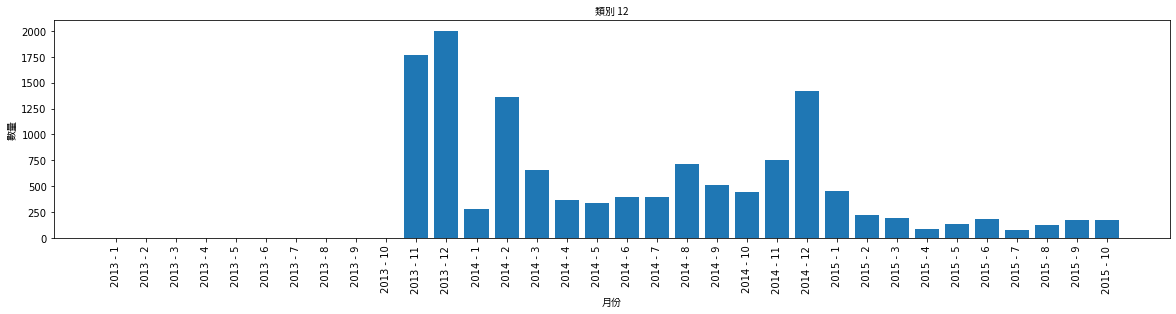

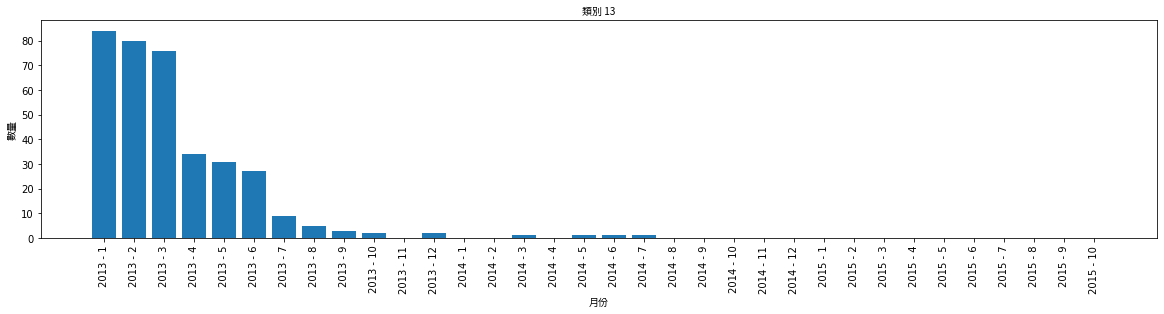

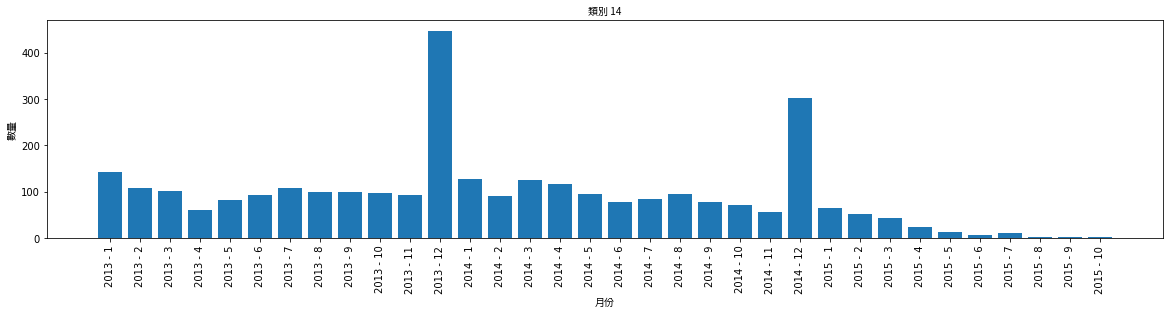

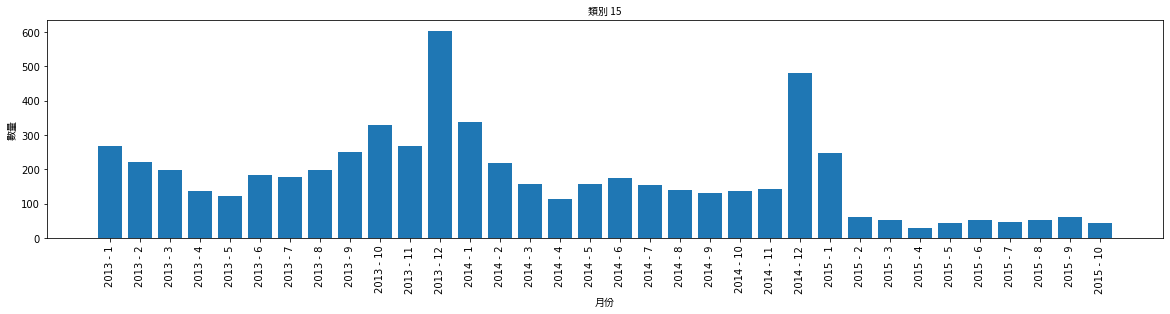

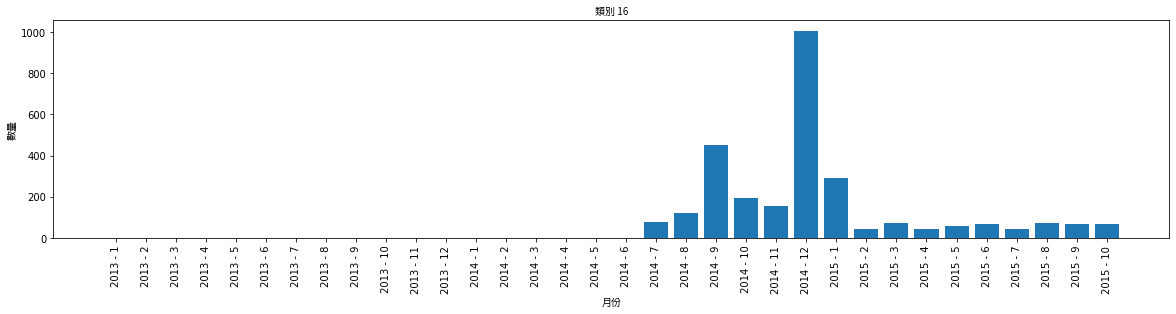

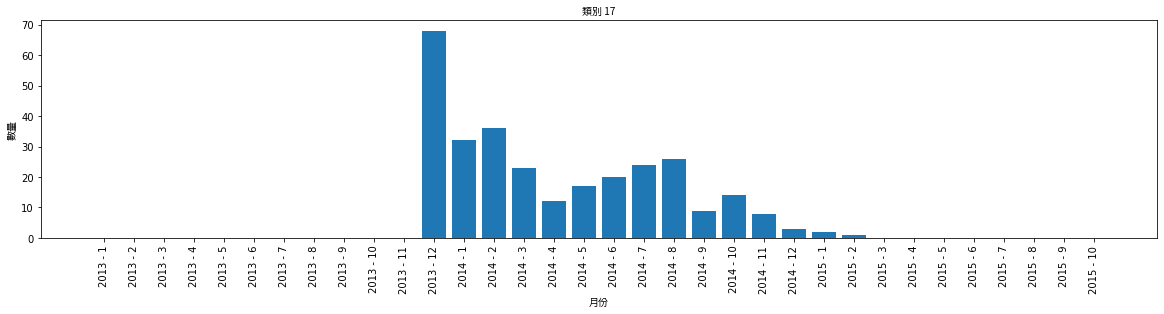

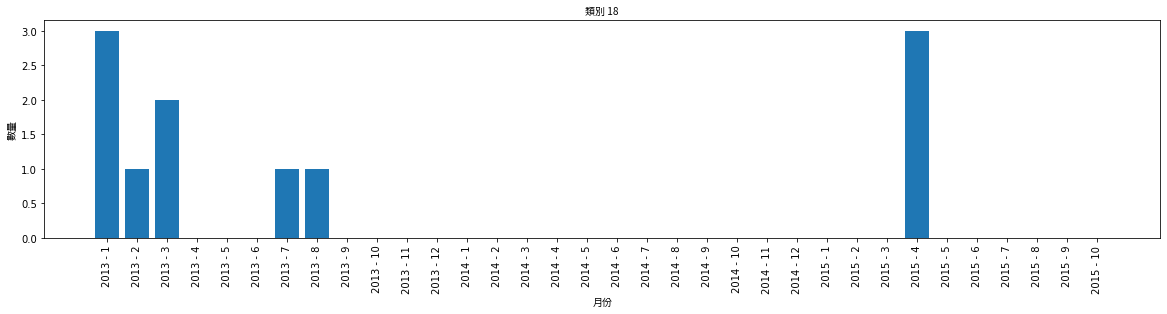

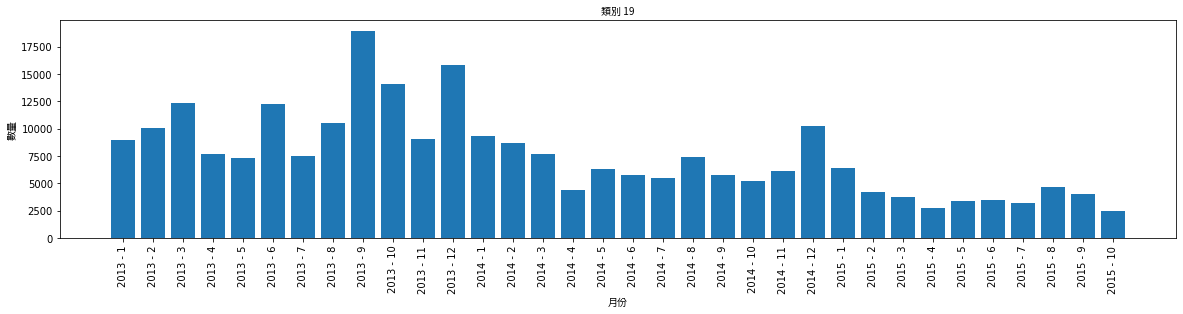

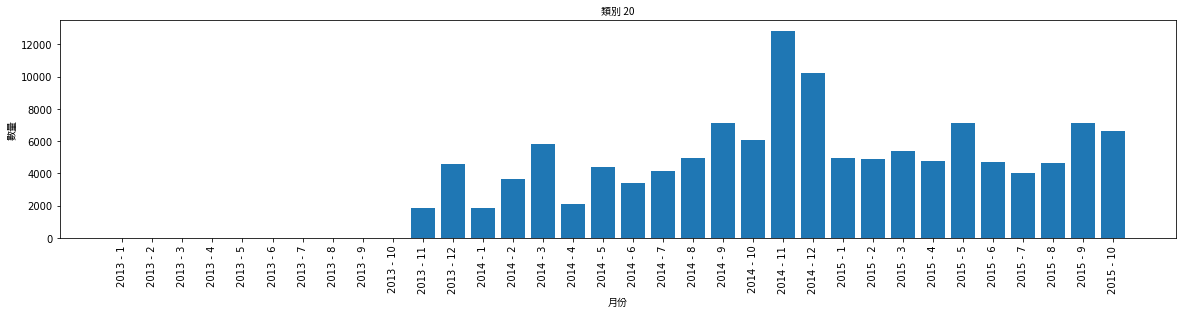

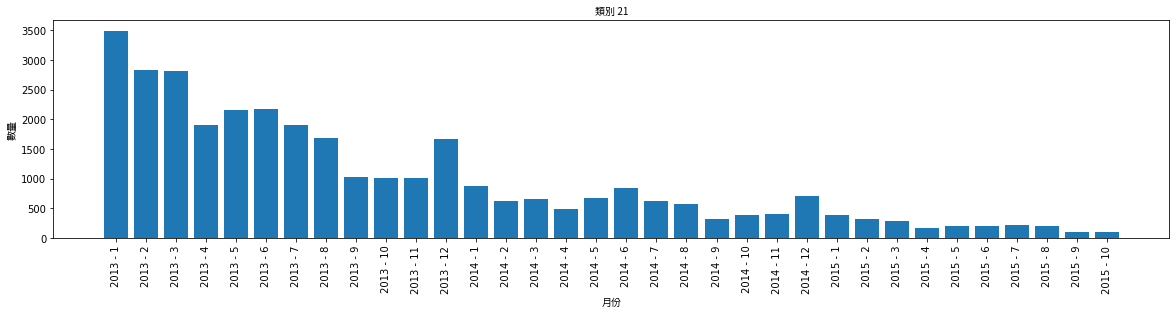

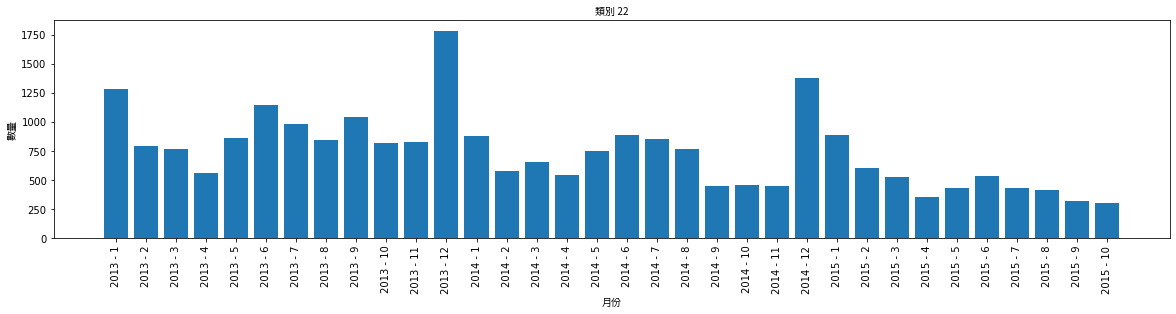

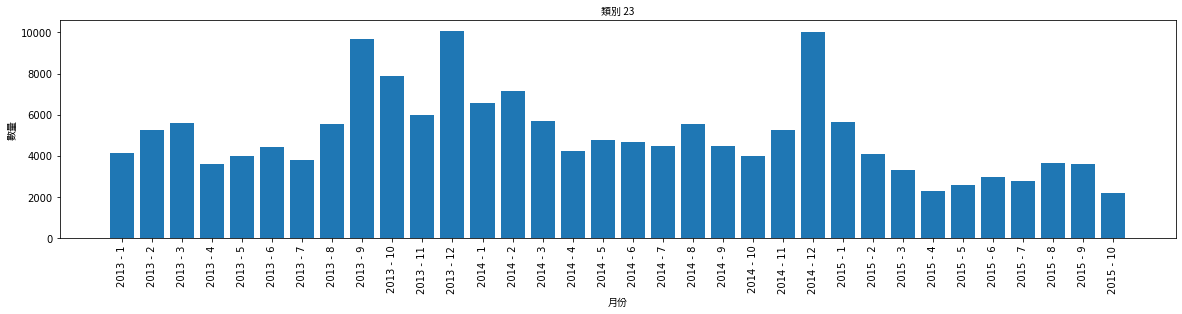

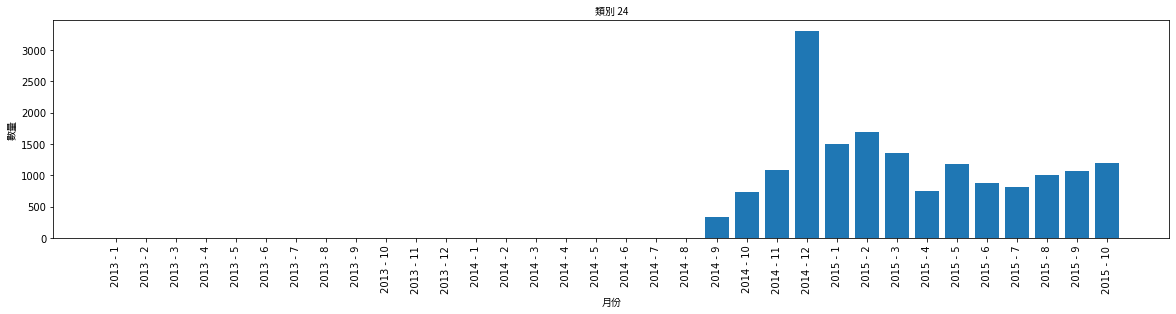

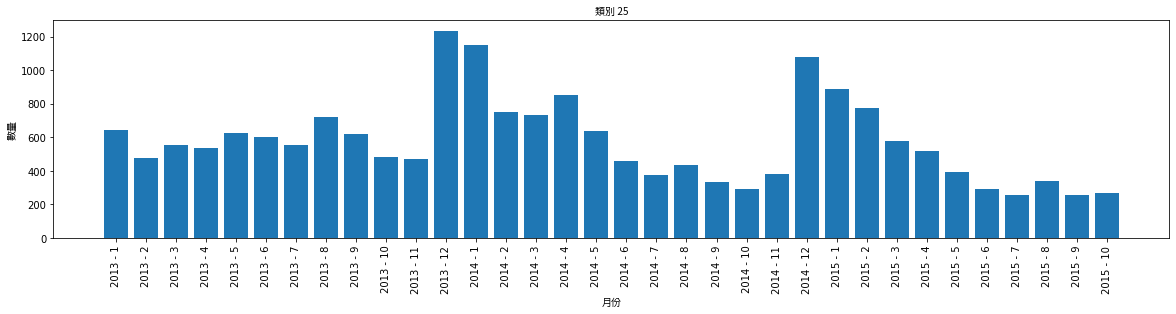

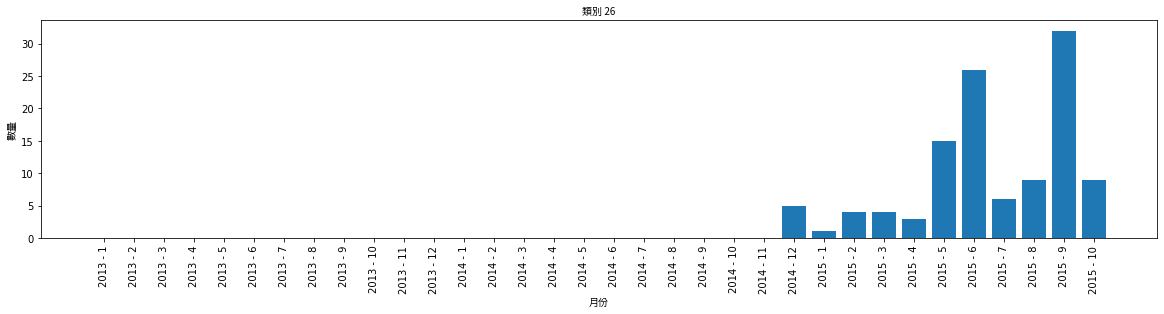

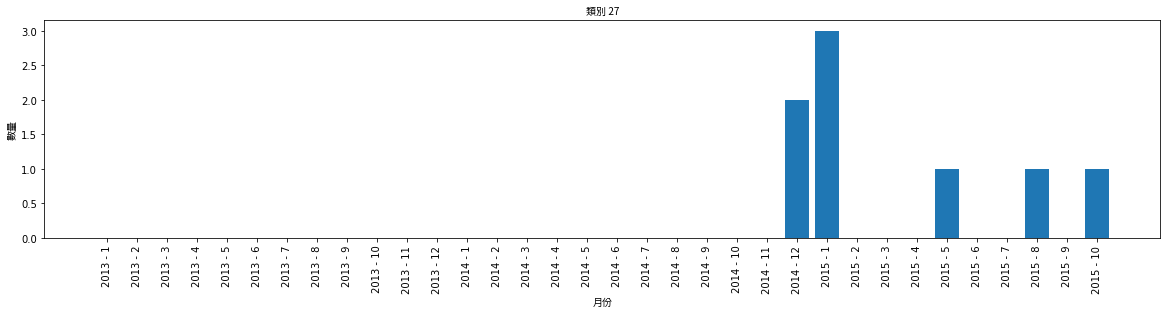

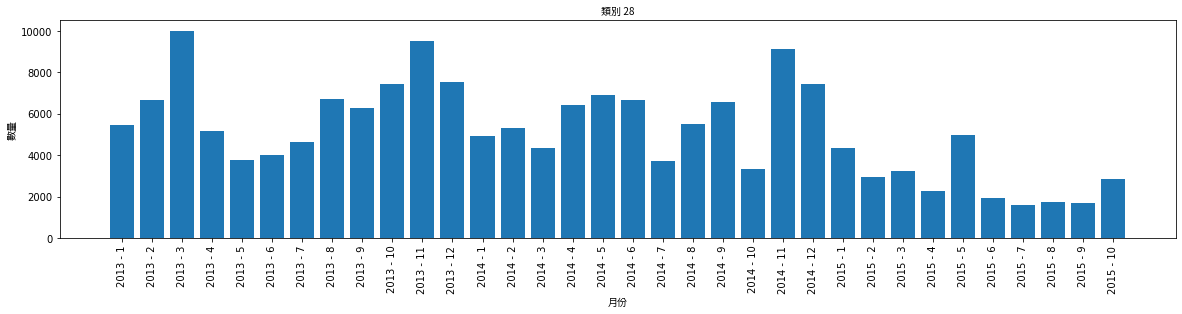

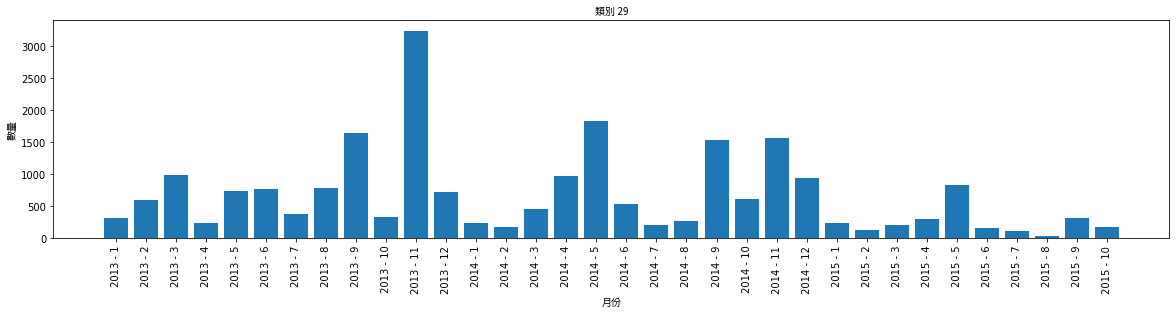

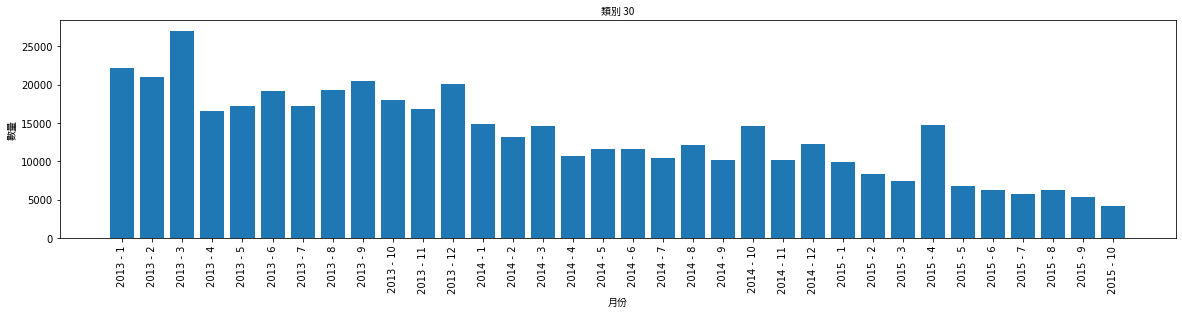

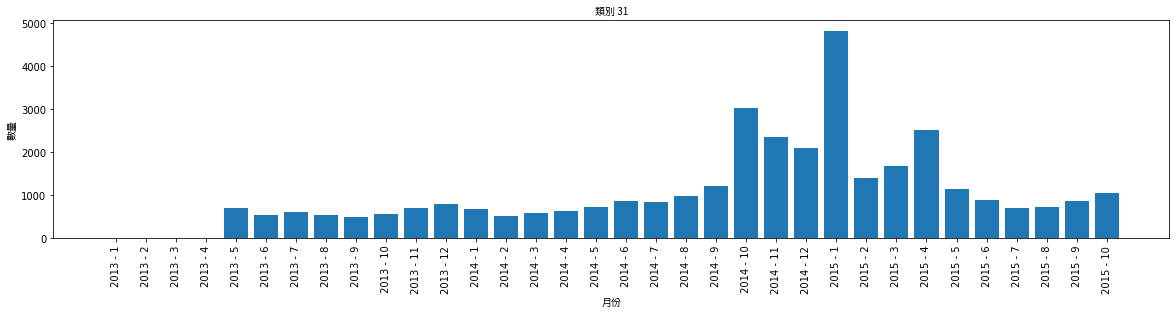

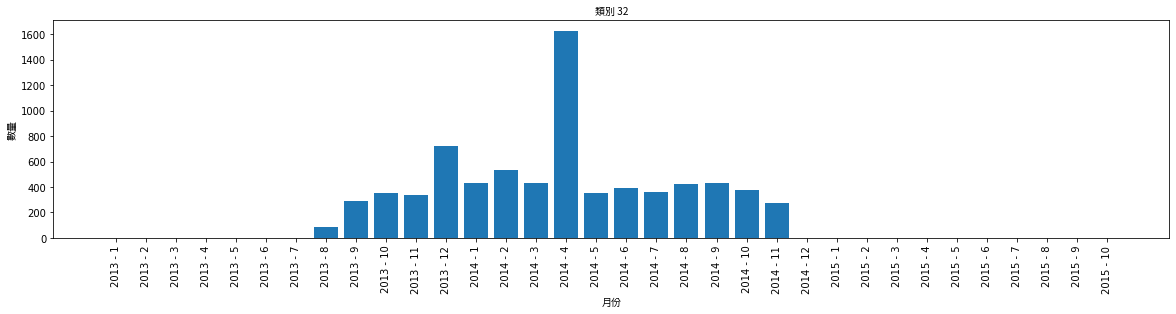

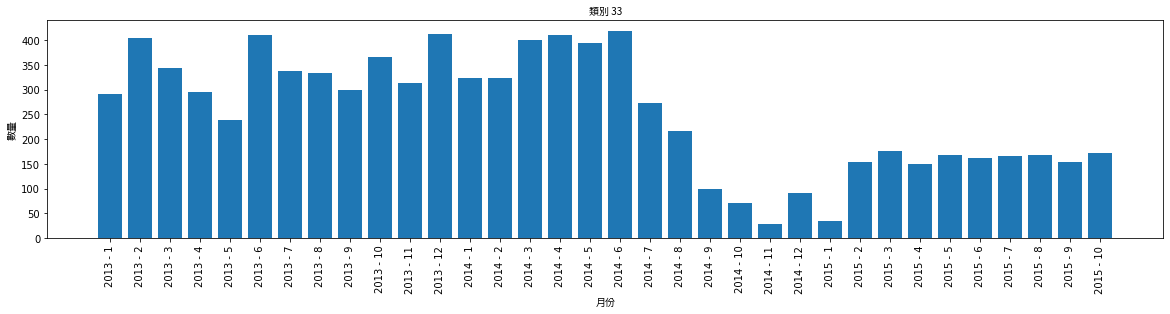

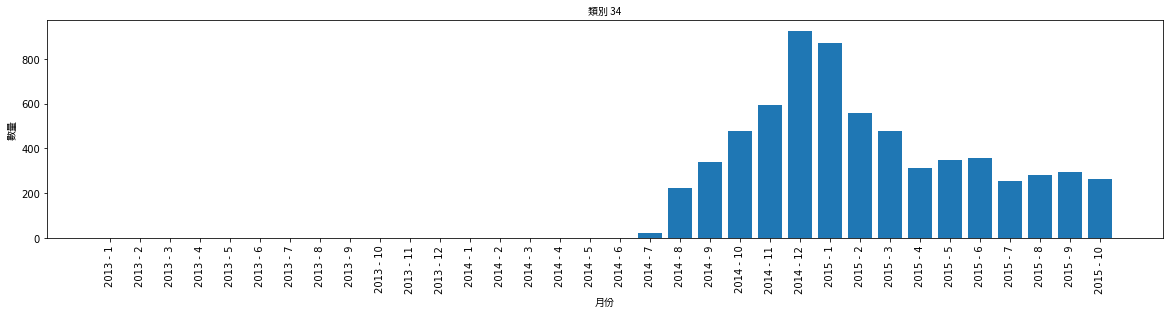

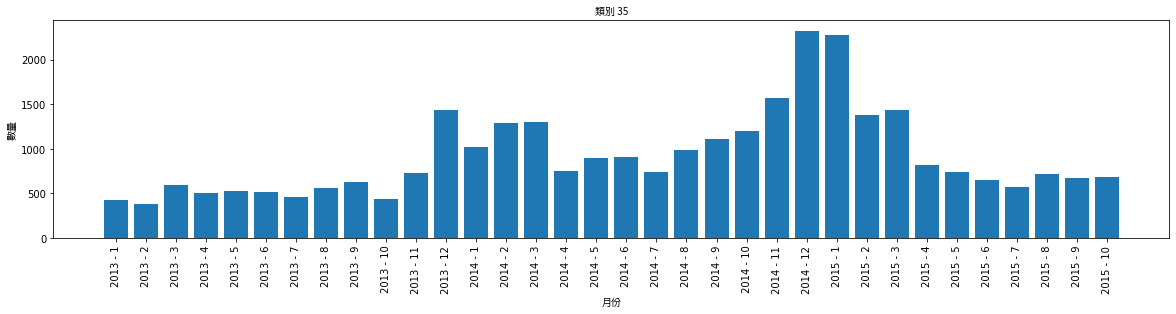

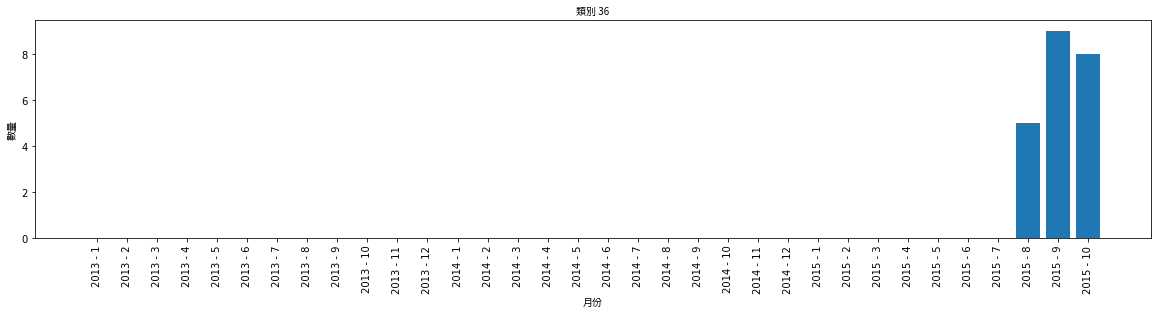

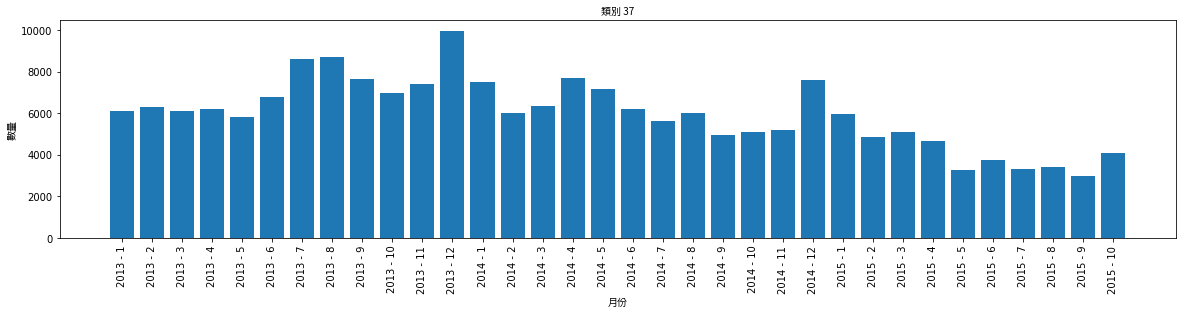

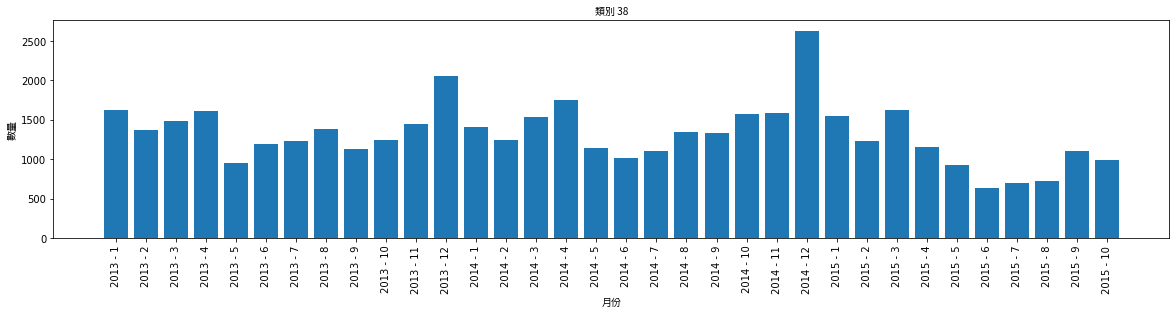

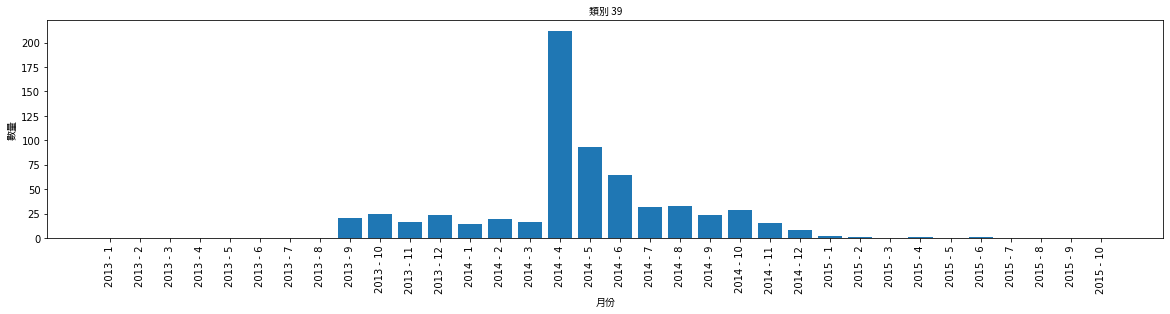

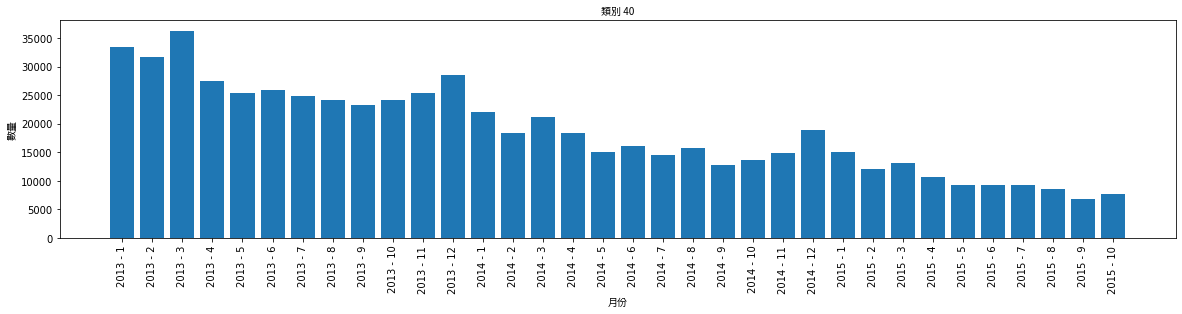

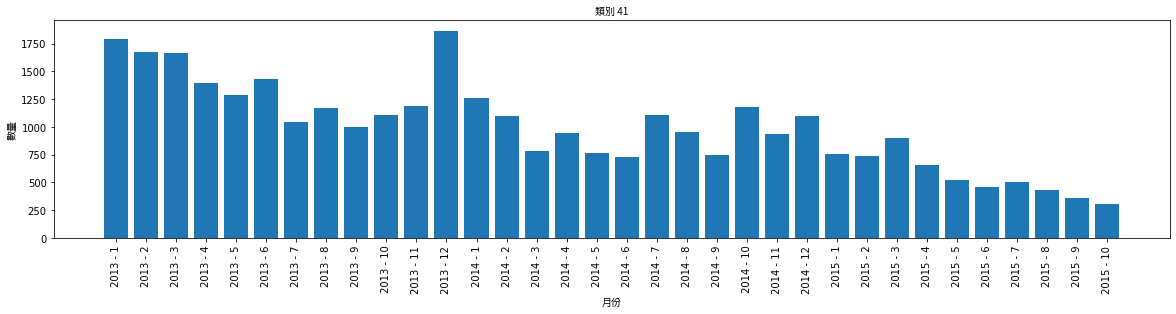

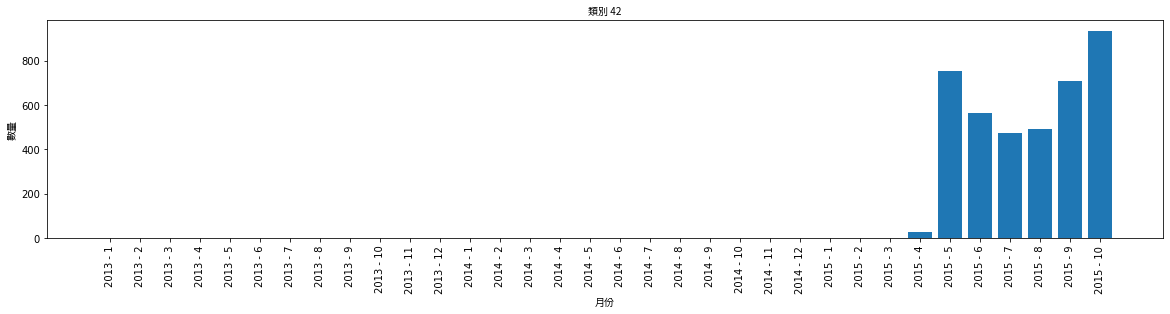

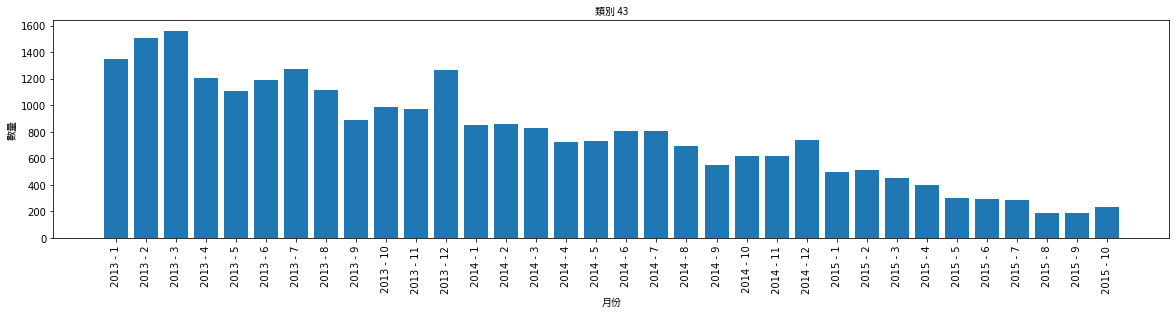

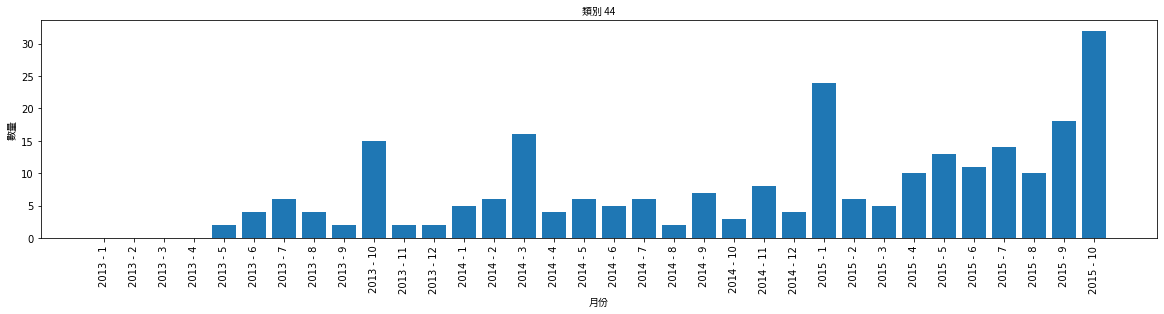

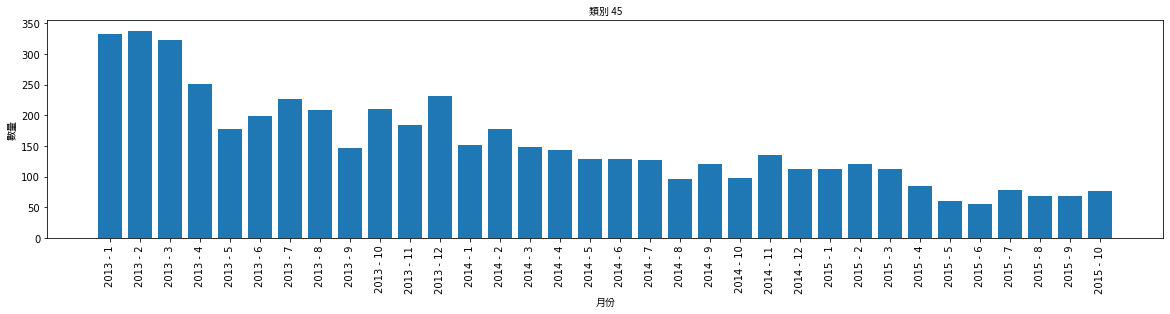

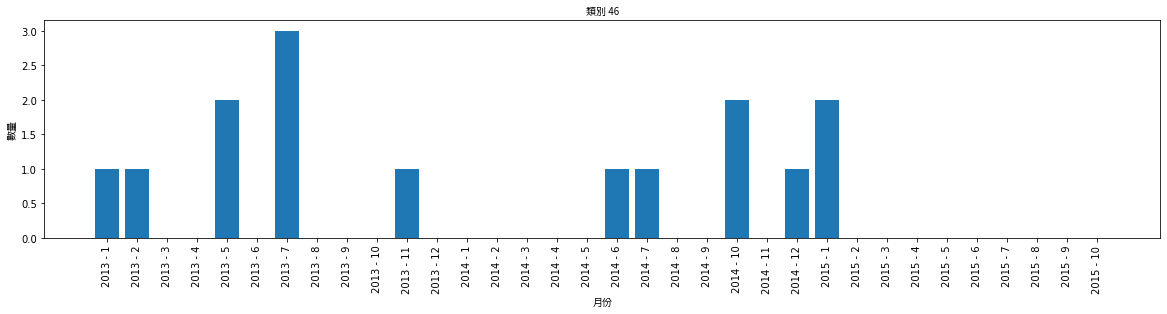

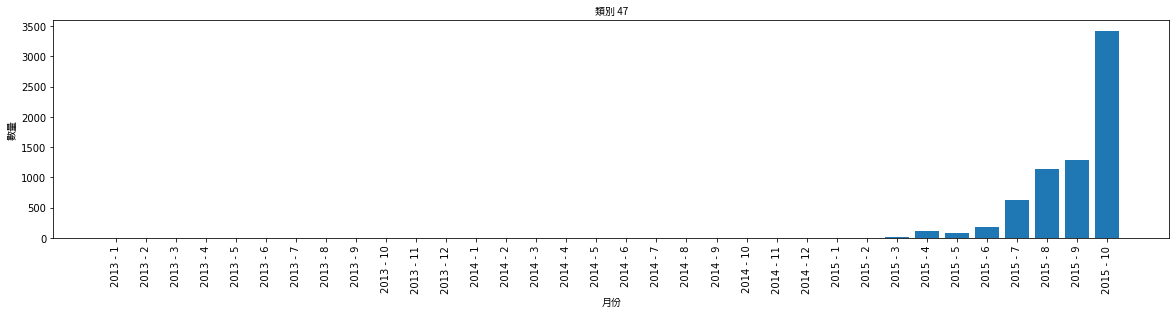

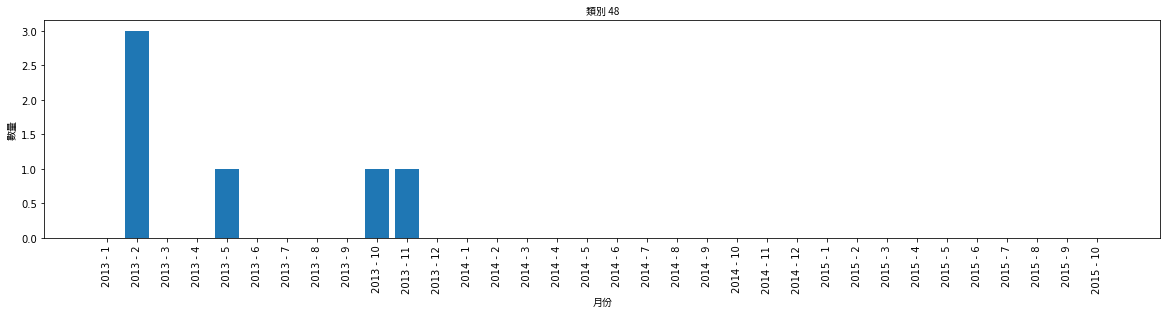

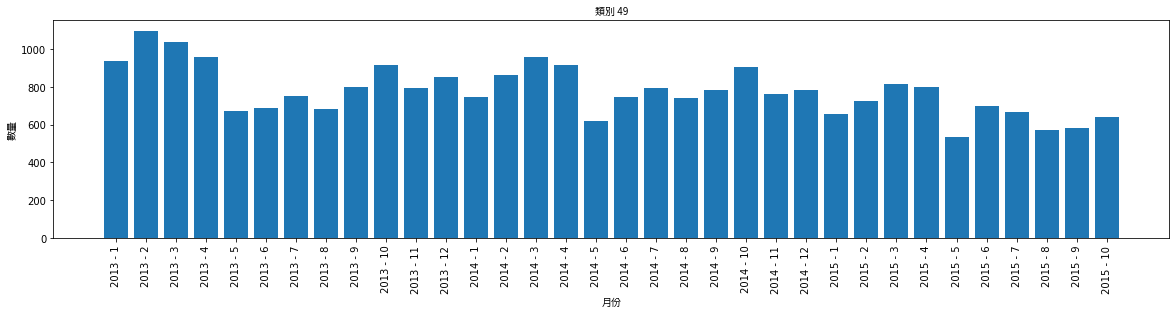

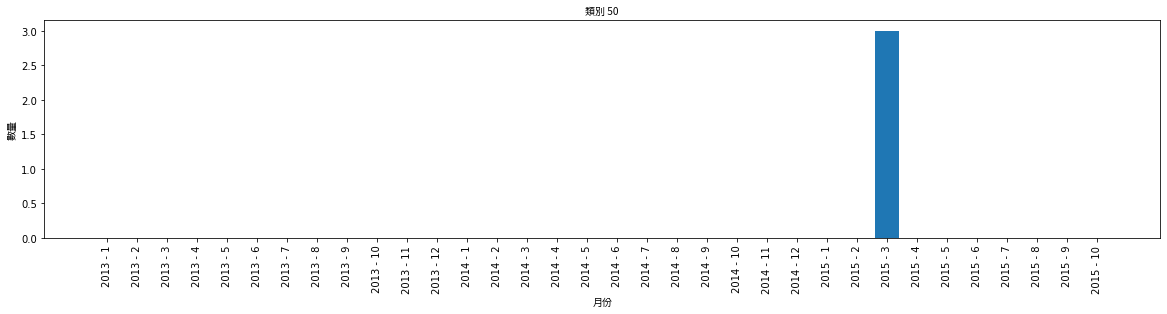

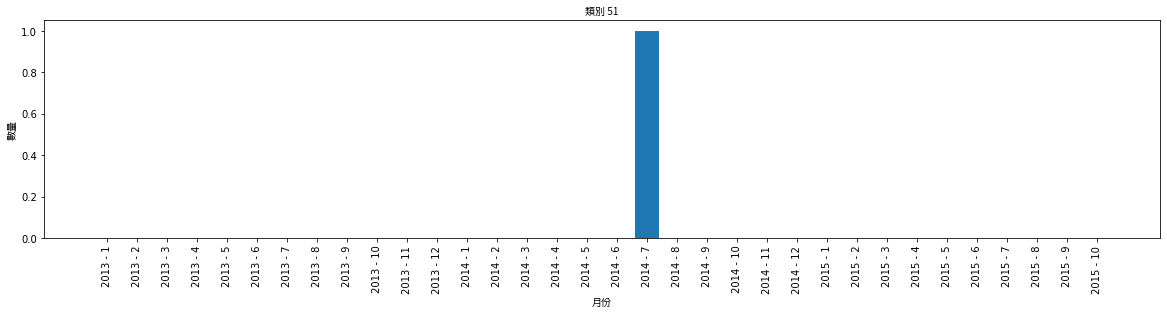

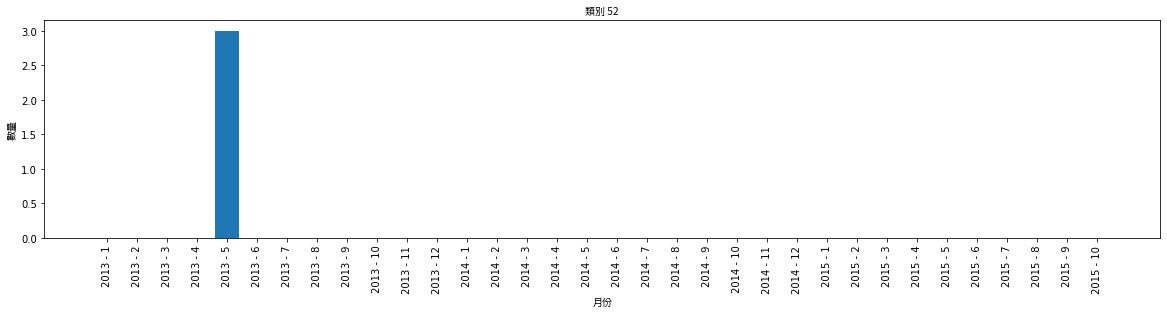

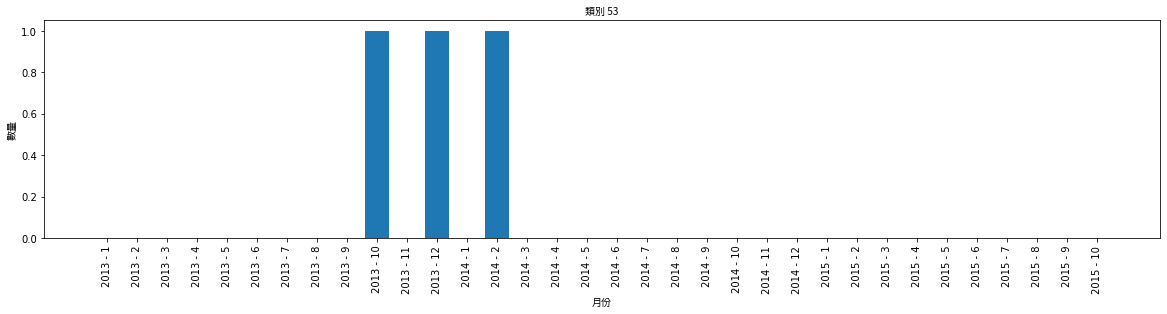

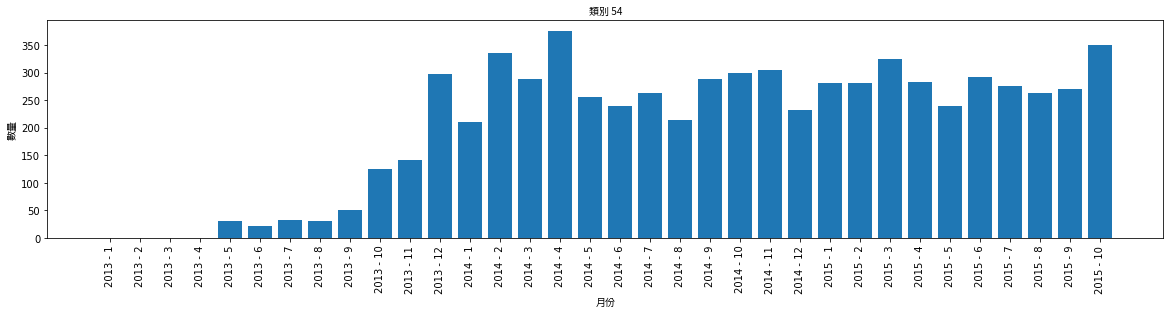

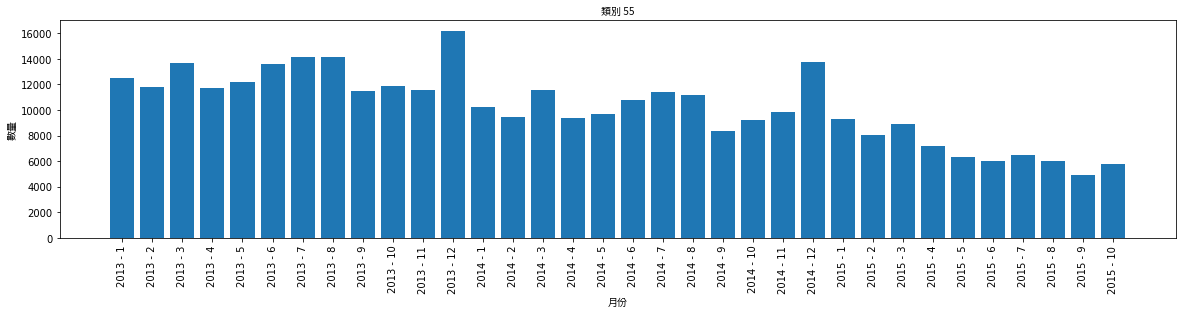

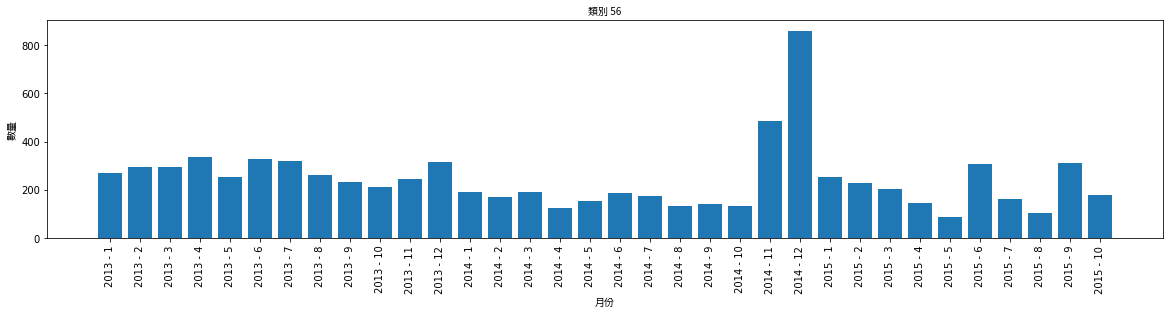

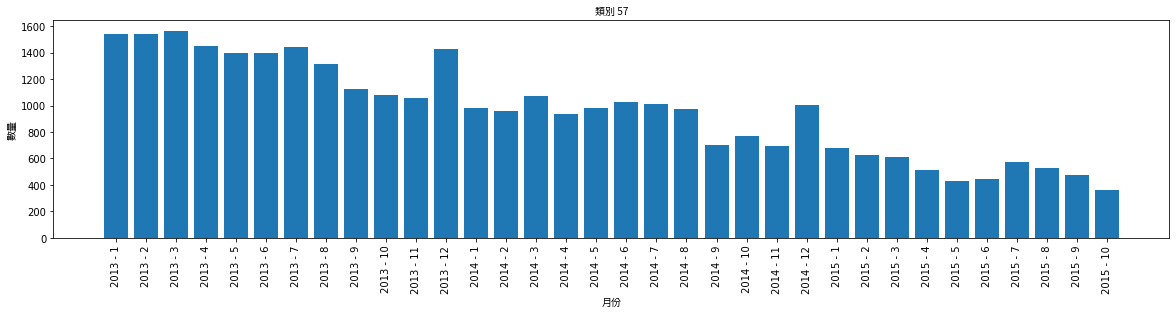

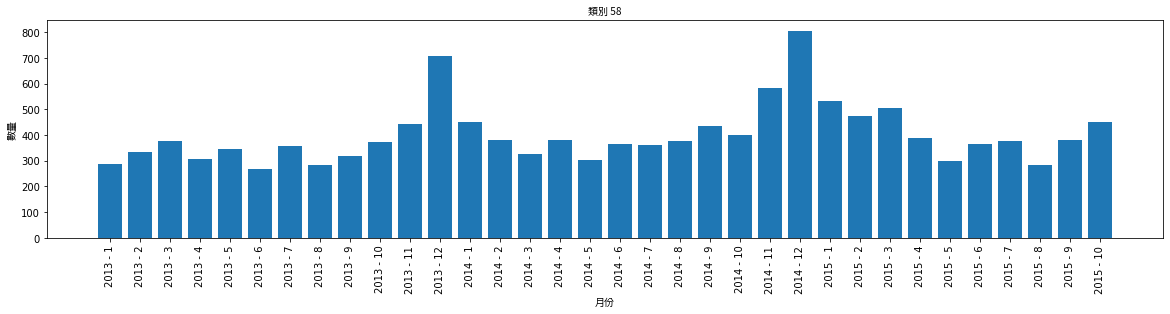

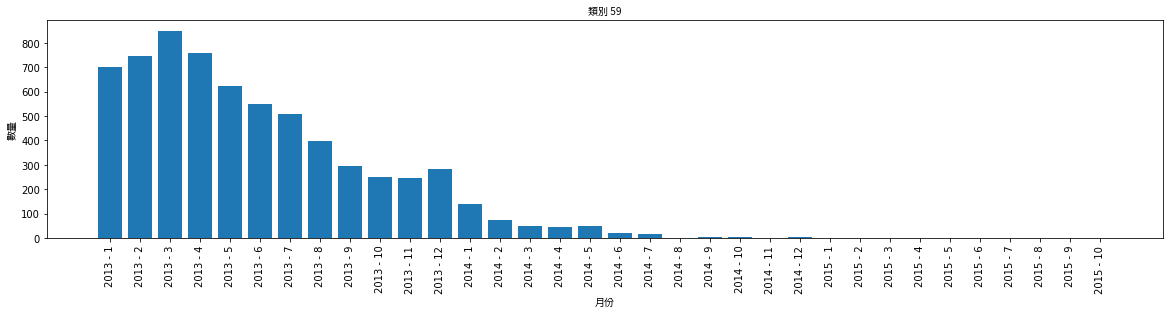

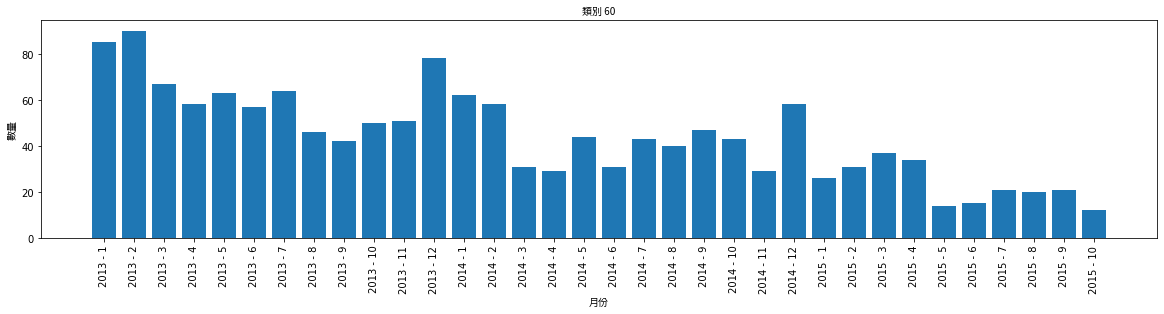

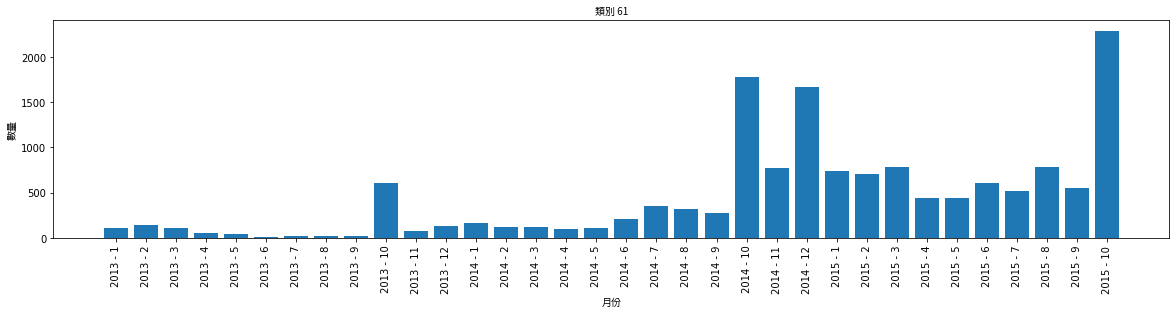

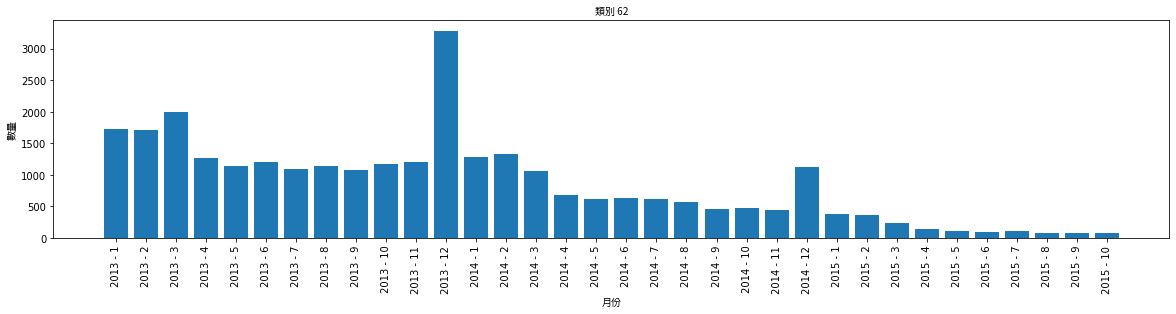

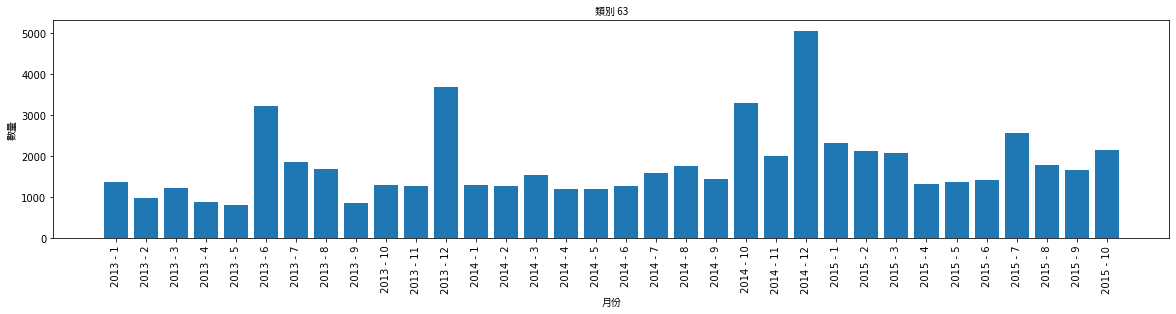

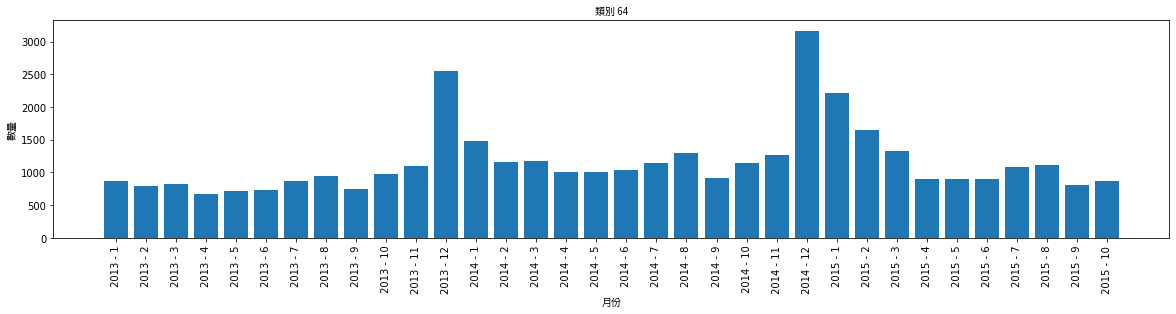

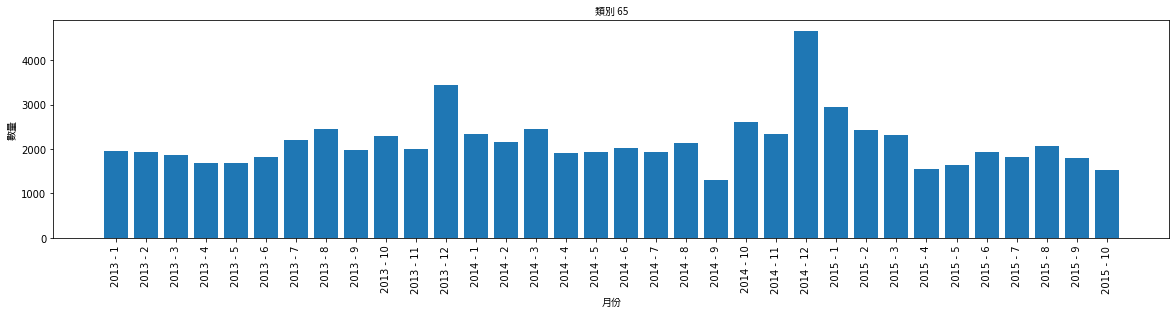

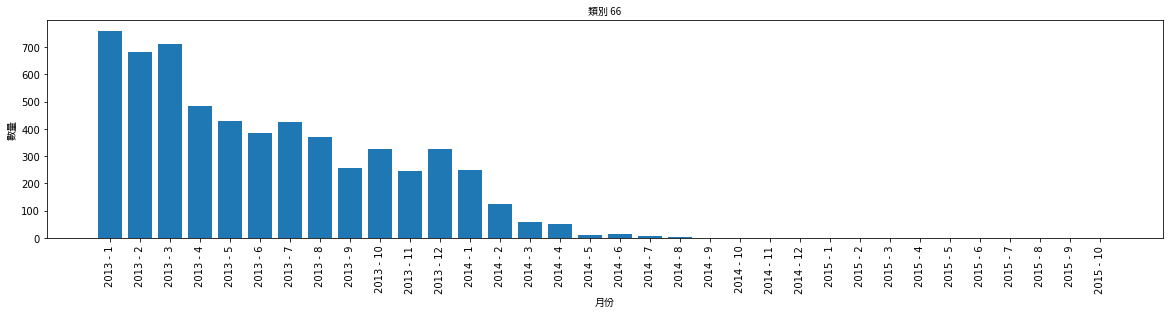

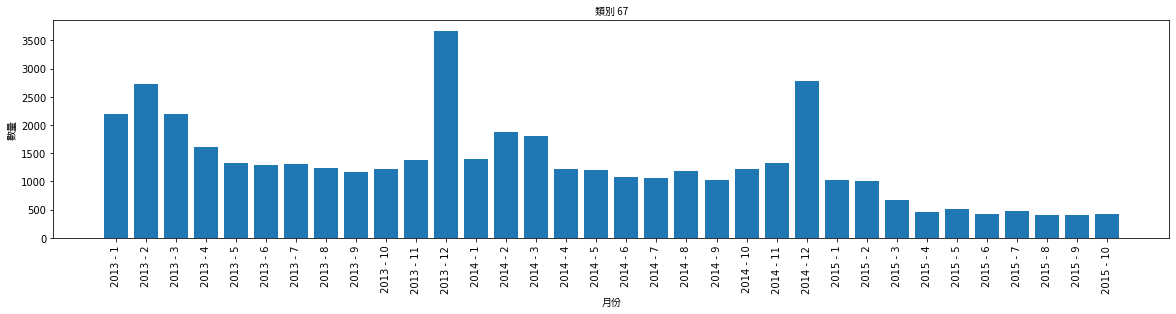

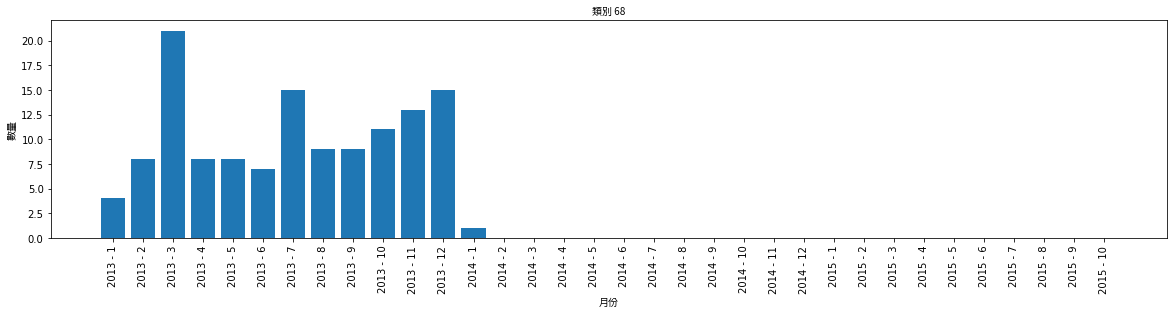

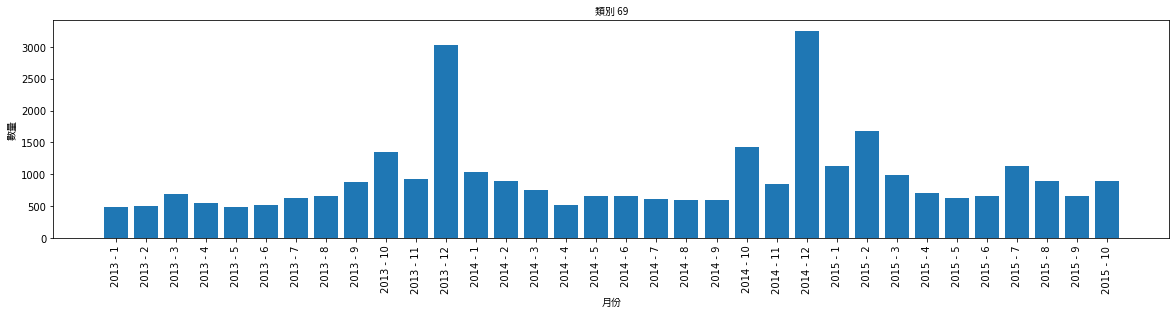

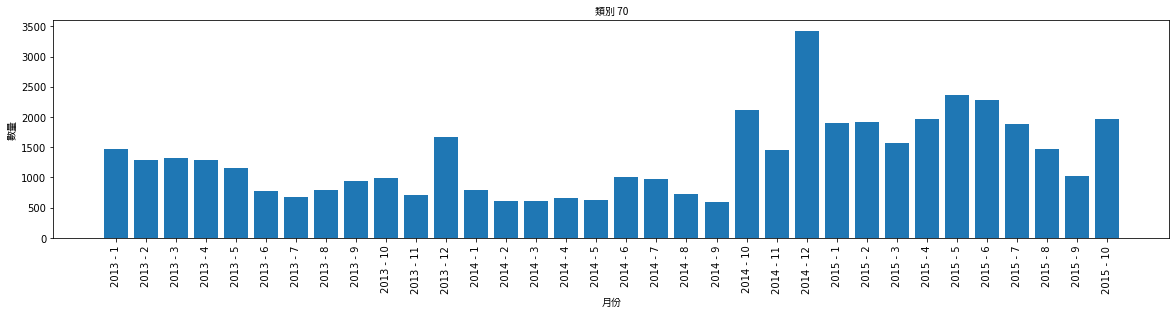

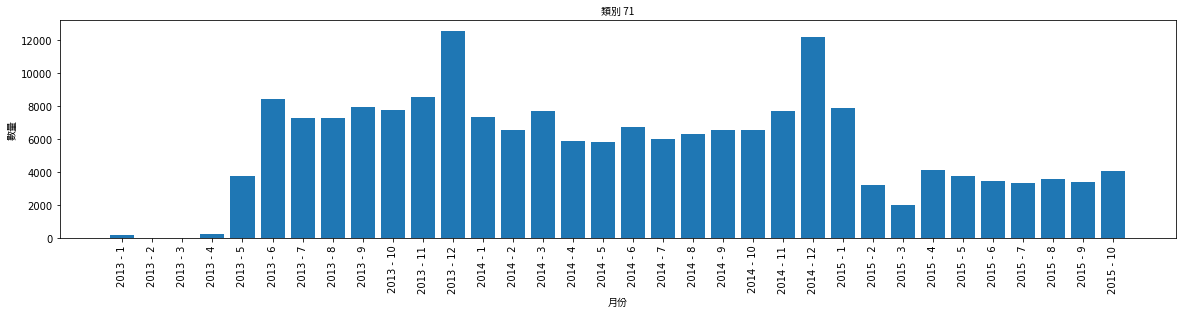

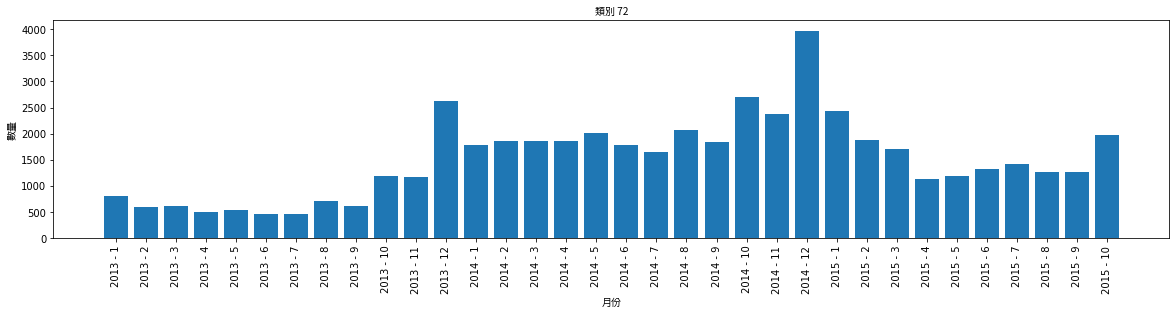

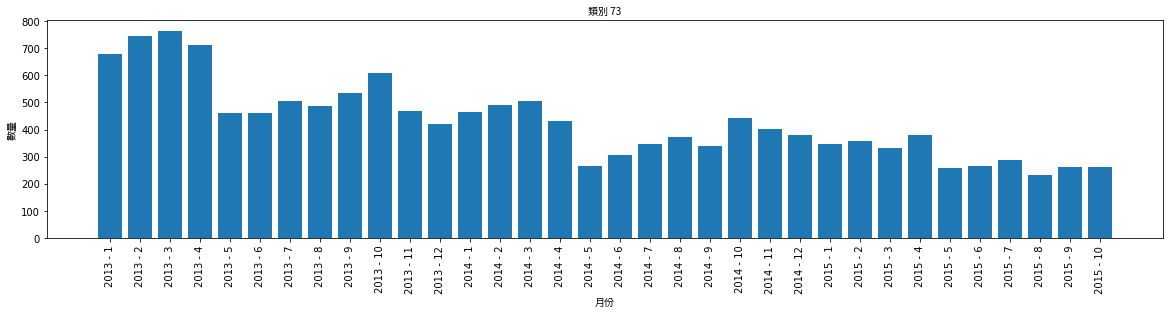

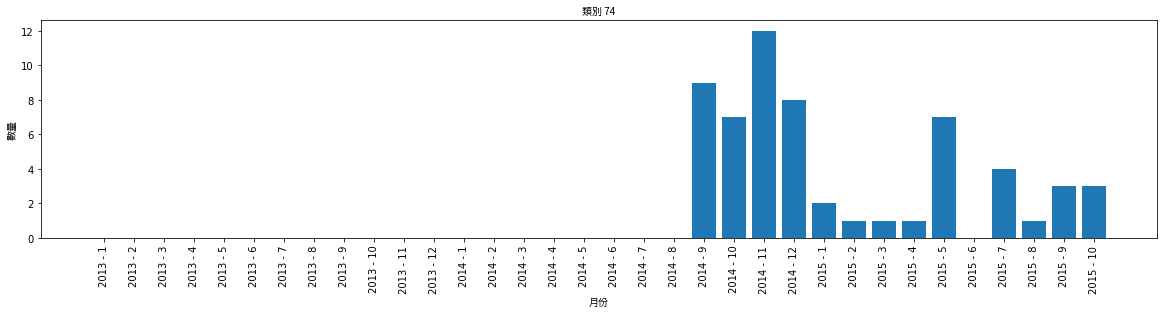

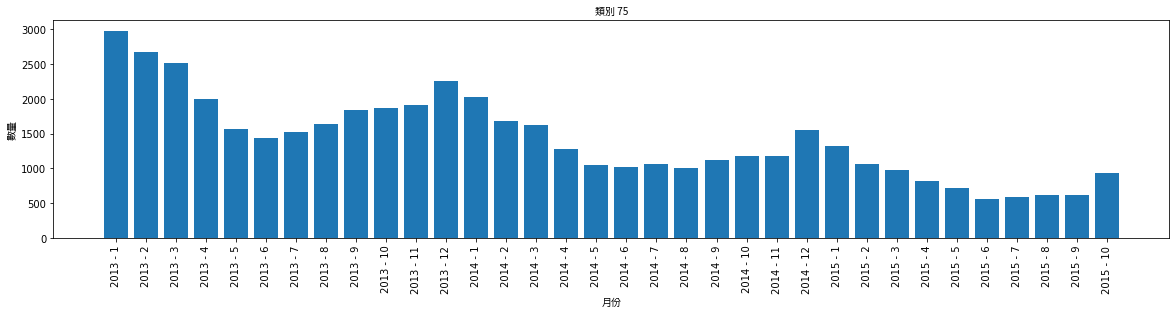

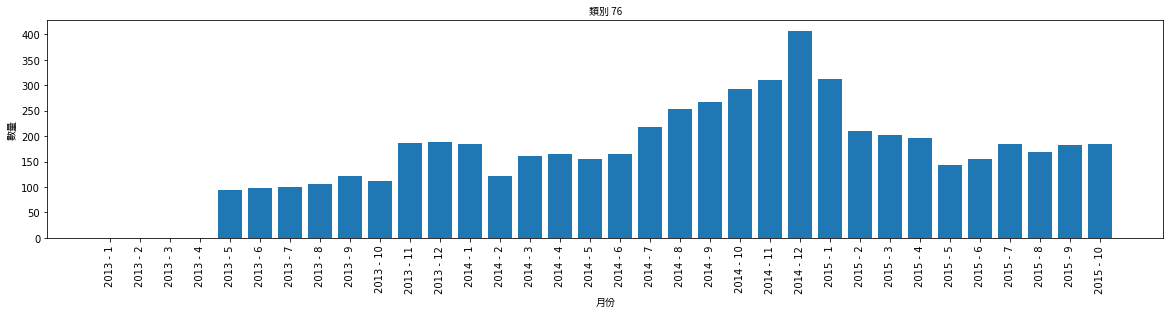

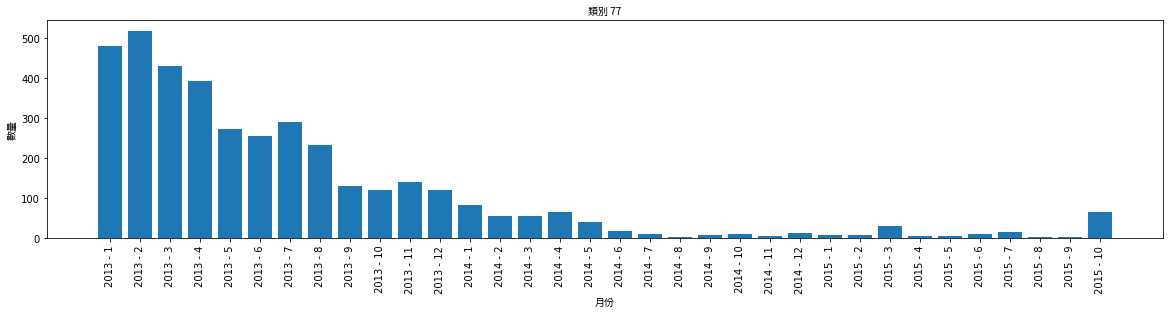

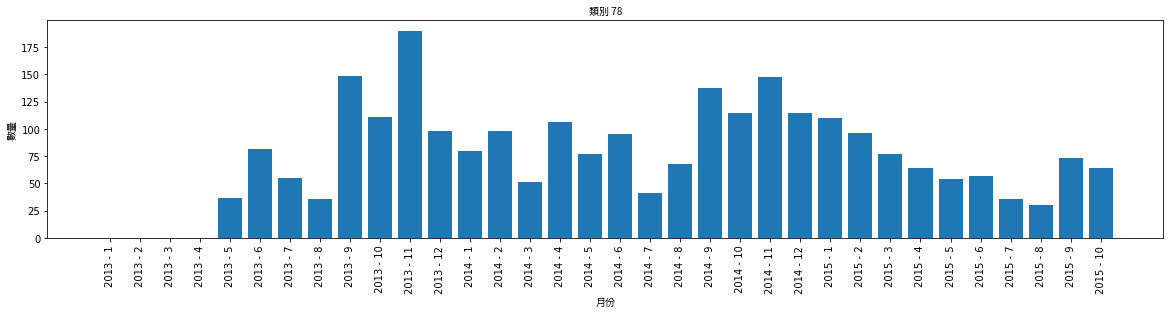

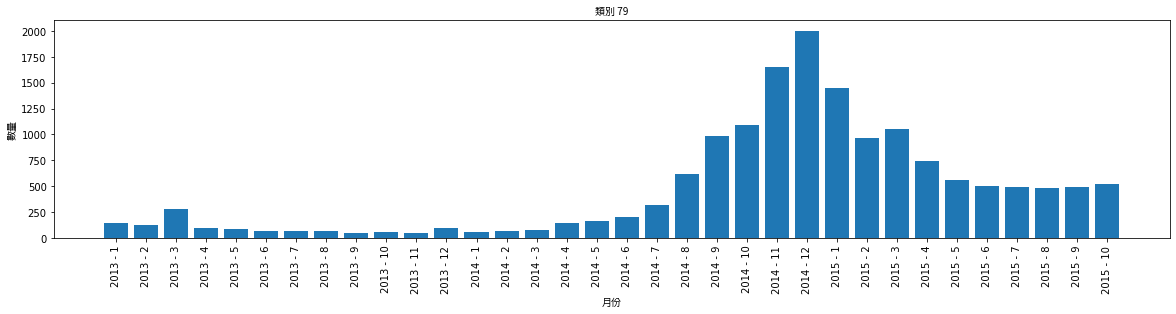

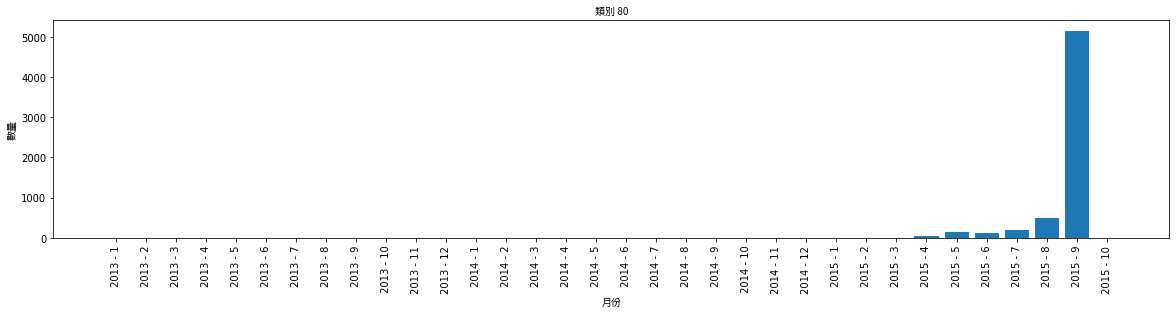

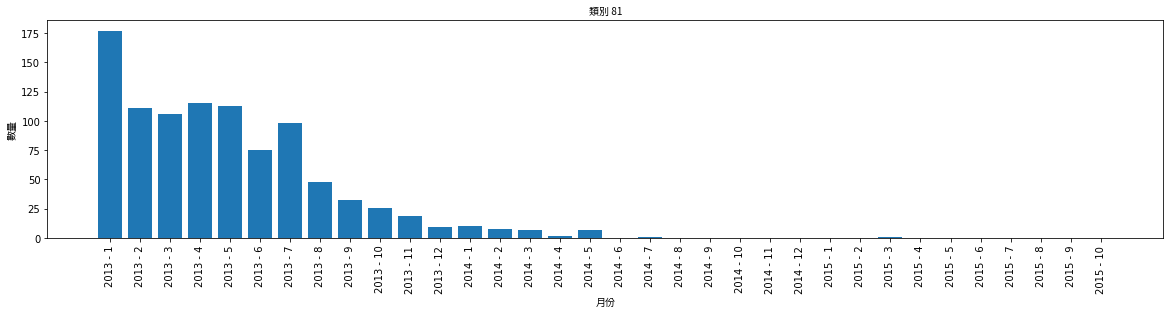

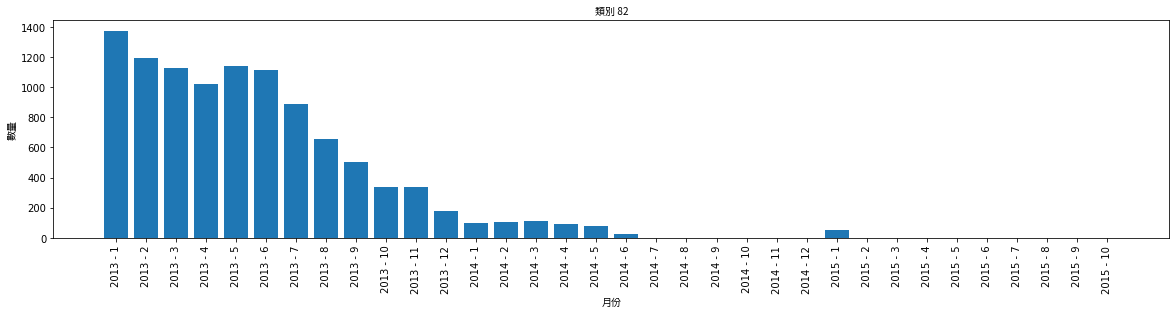

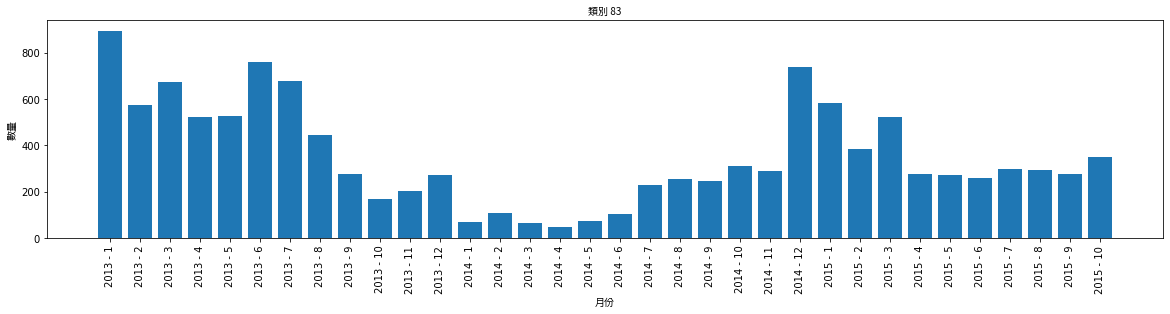

In [ ]:
for item_category in range(84):
    plt.figure(figsize=(20,4))

    plt.bar(range(34),d[:, item_category])

    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月份', fontproperties=myfont)
    plt.ylabel('數量', fontproperties=myfont)
    plt.title(f'類別 {item_category}', fontproperties=myfont)

## 各分店銷售量 / 月

In [ ]:
d = np.zeros([month_cnt,shop_cnt])

In [ ]:
shop_id = df['shop_id']
total_price = df['item_cnt_day']
block_num = df['date_block_num']
for i in range(34):
    for j in range(shop_cnt):
        d[i,j] = np.sum(total_price[(block_num == i) & (shop_id == j)])

In [ ]:
dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

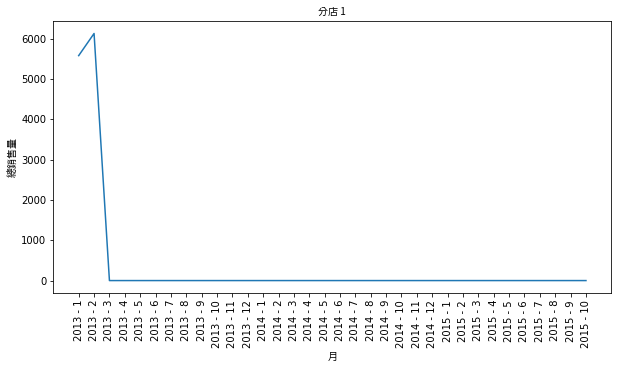

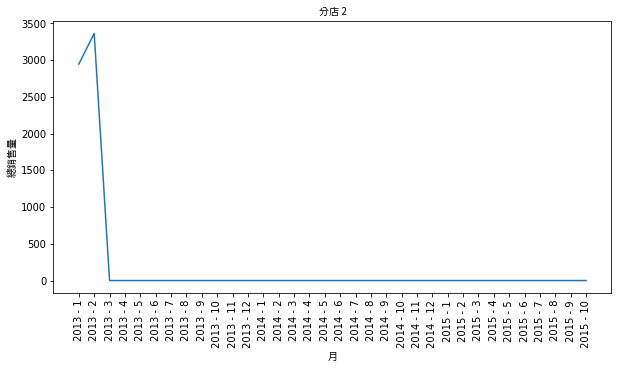

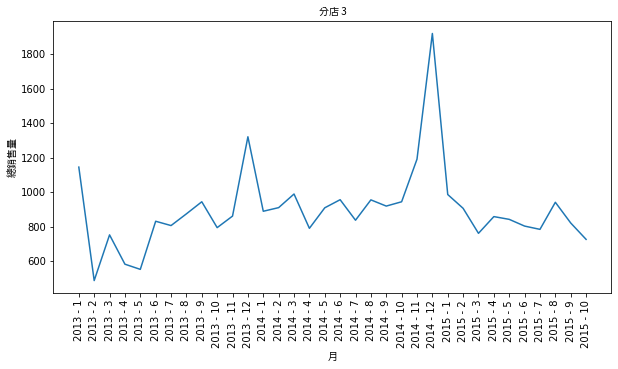

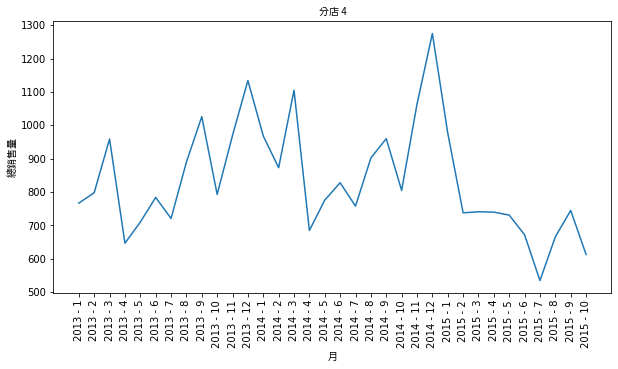

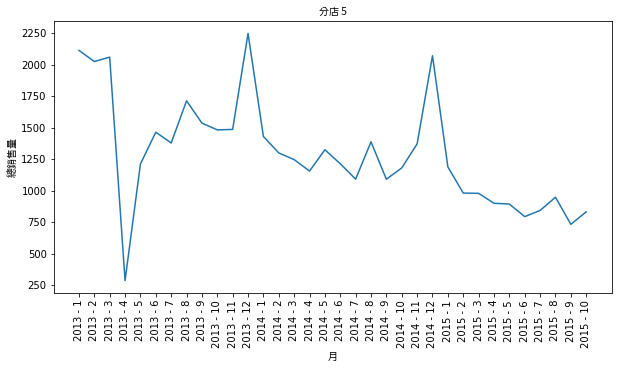

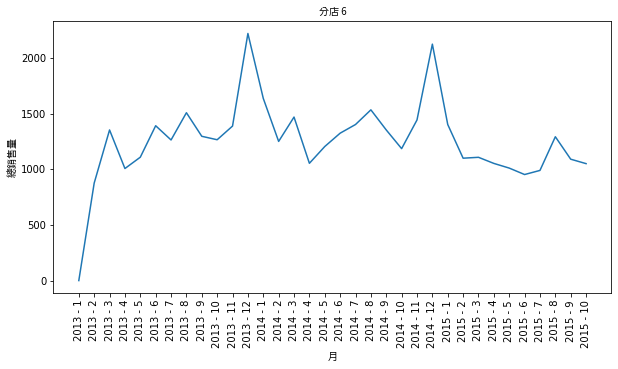

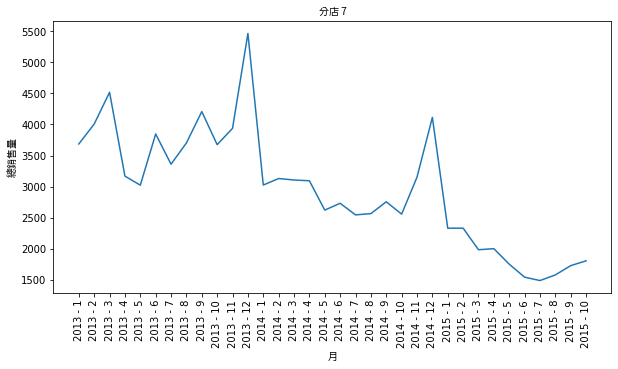

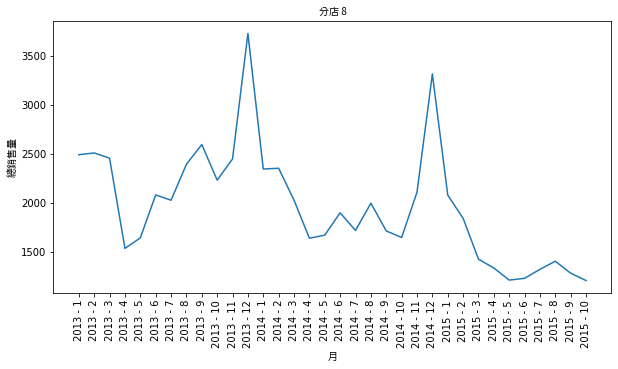

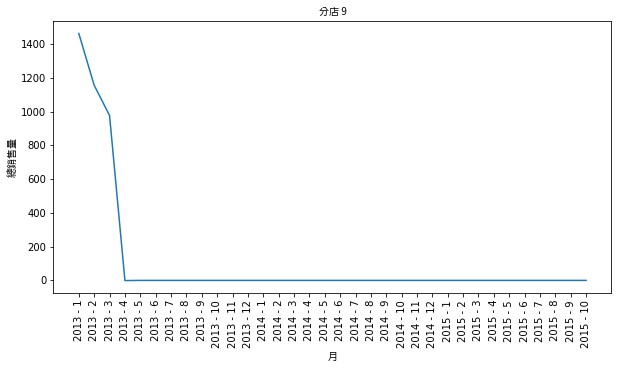

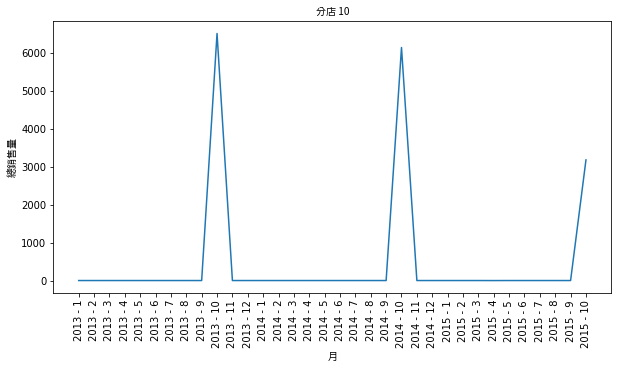

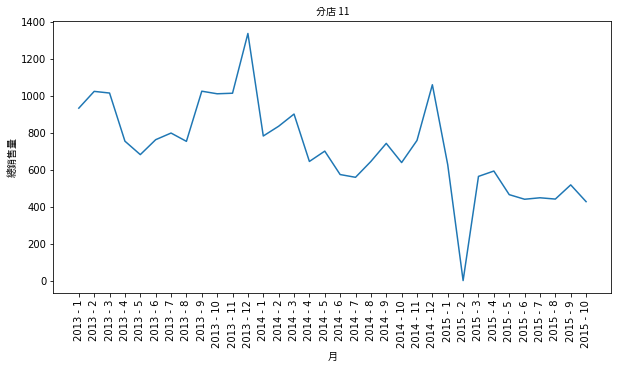

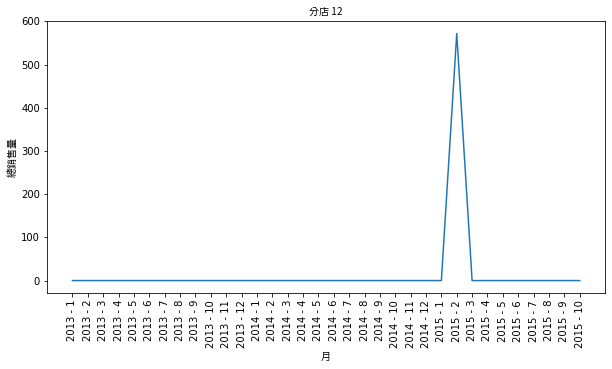

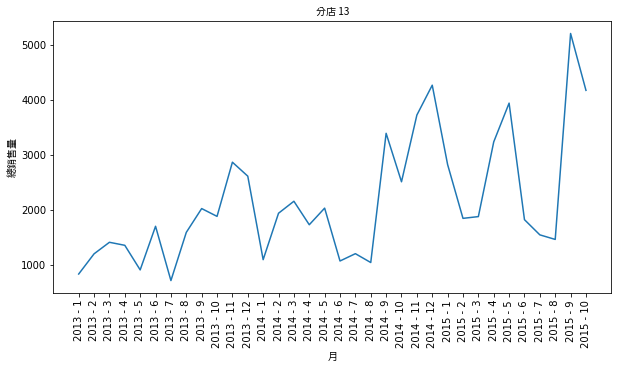

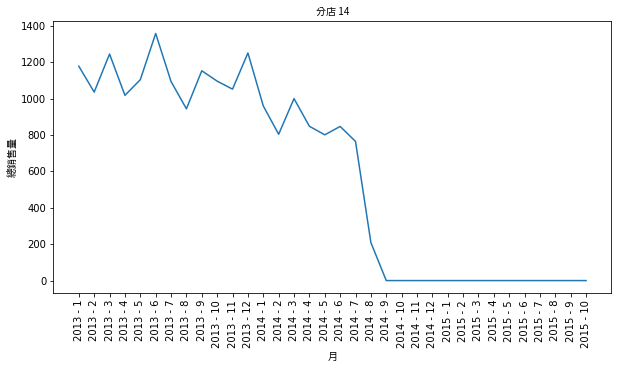

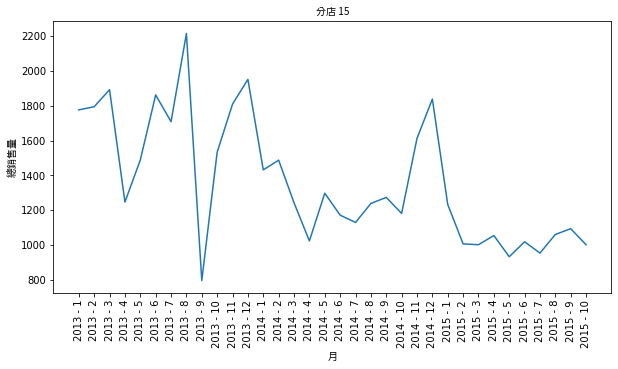

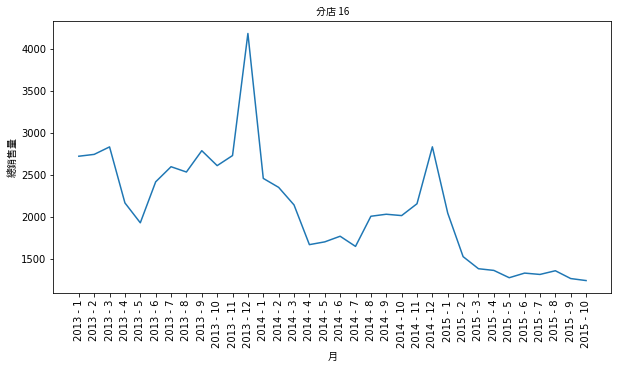

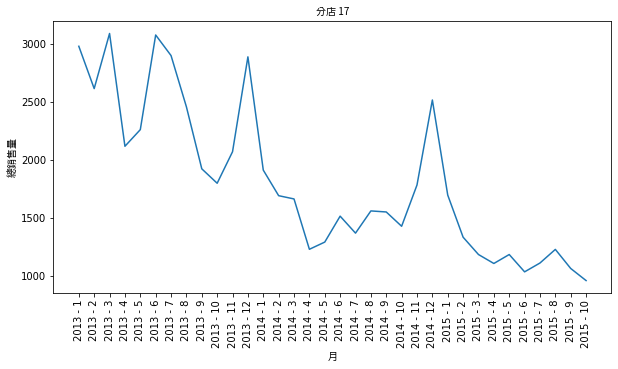

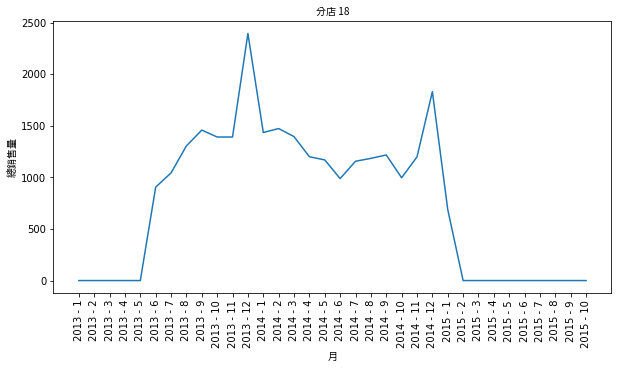

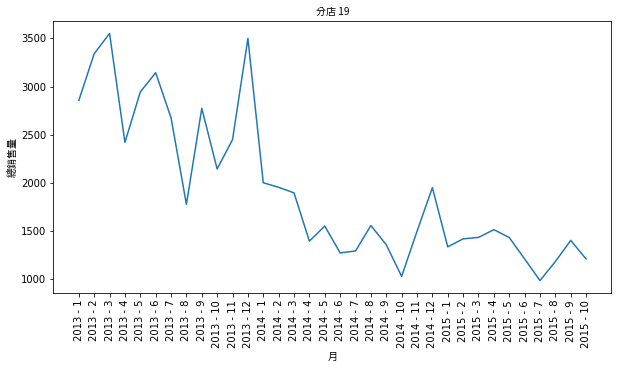

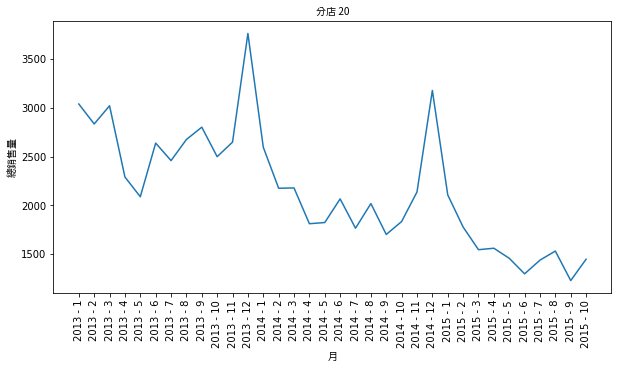

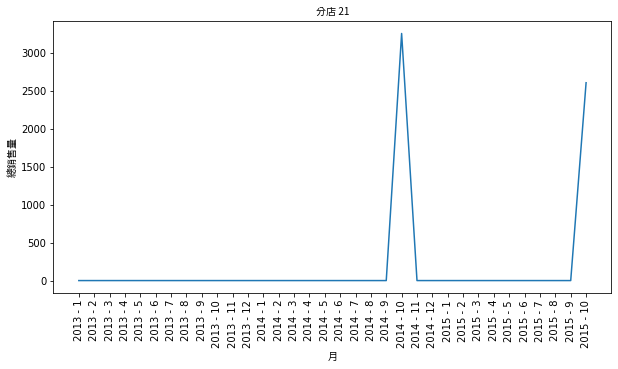

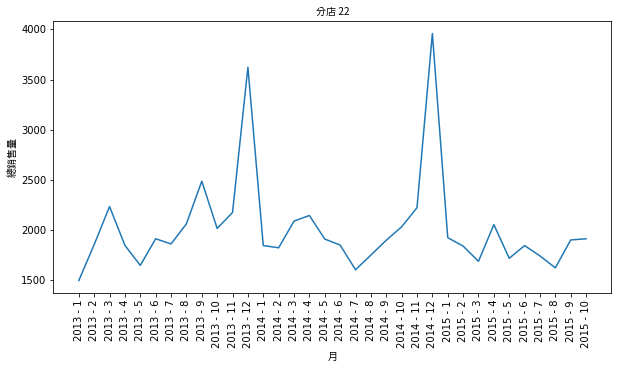

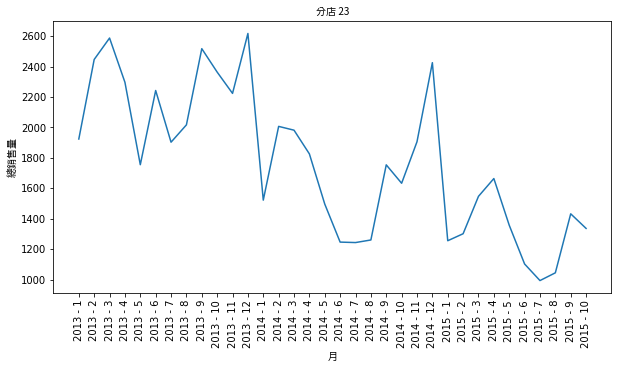

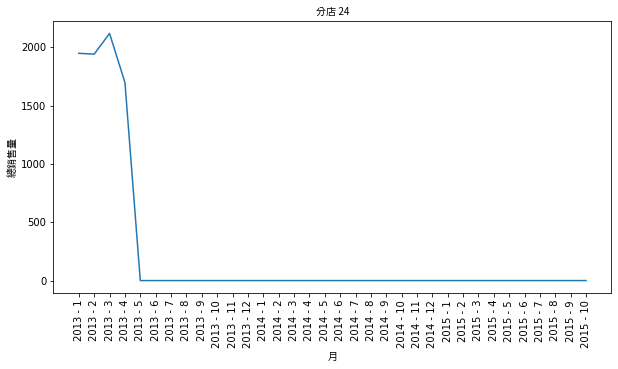

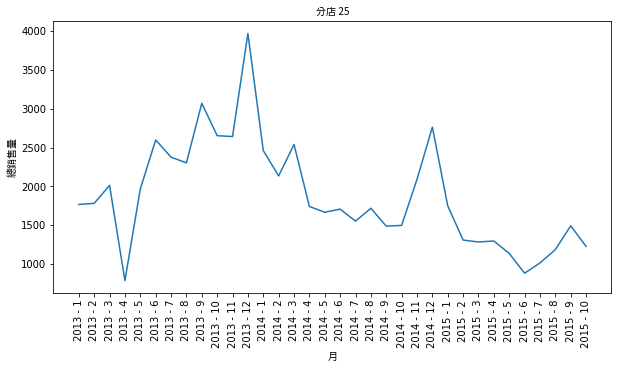

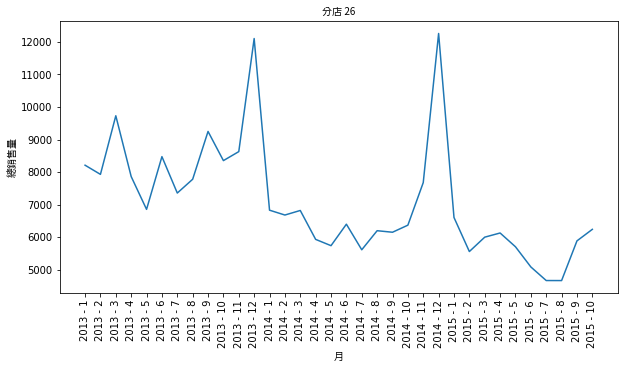

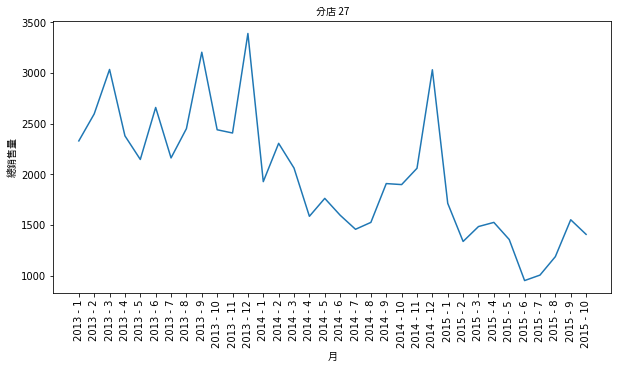

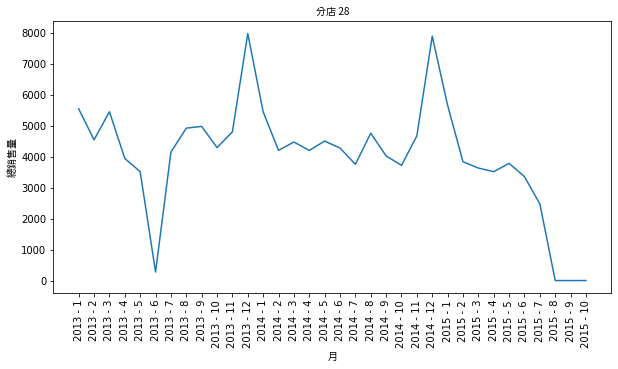

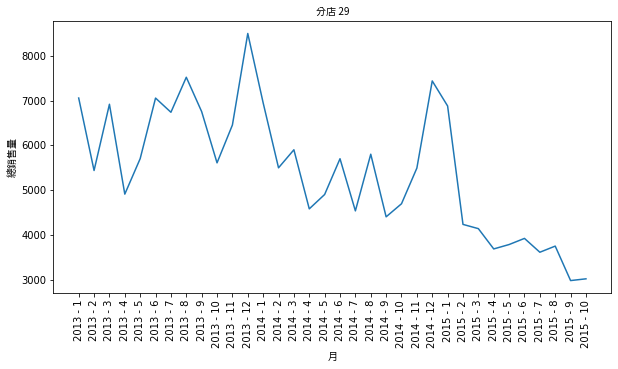

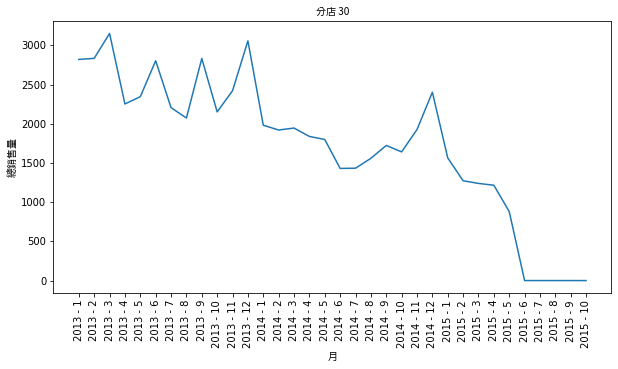

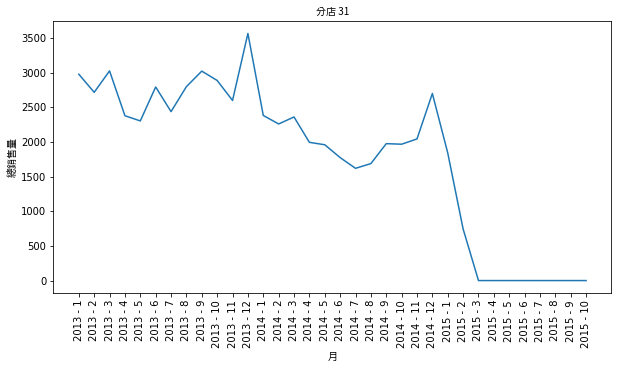

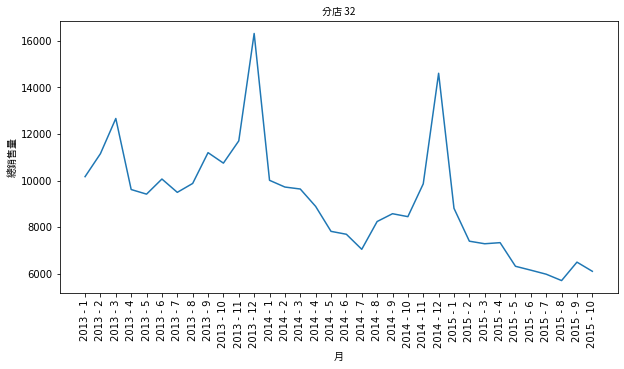

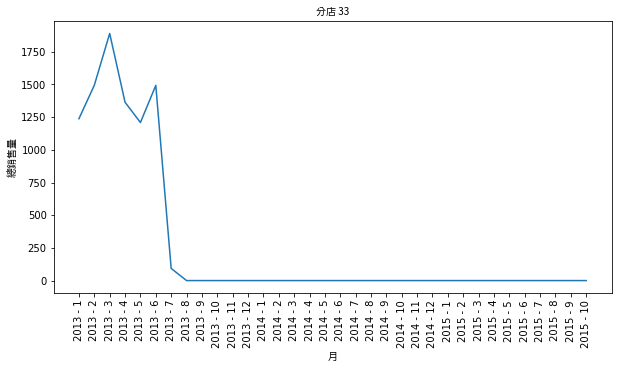

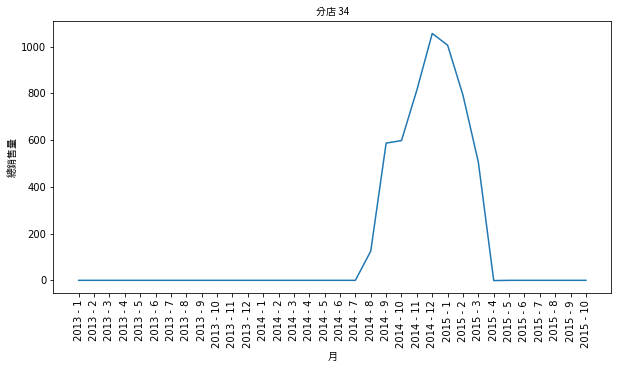

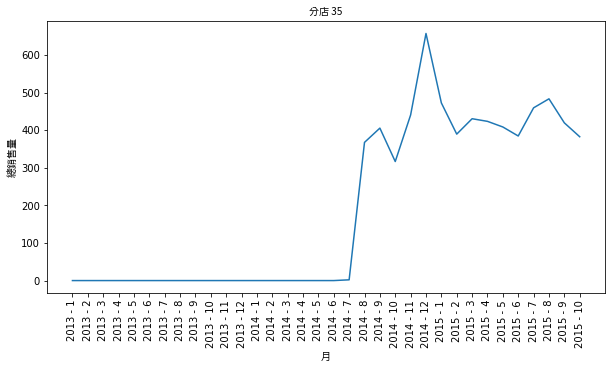

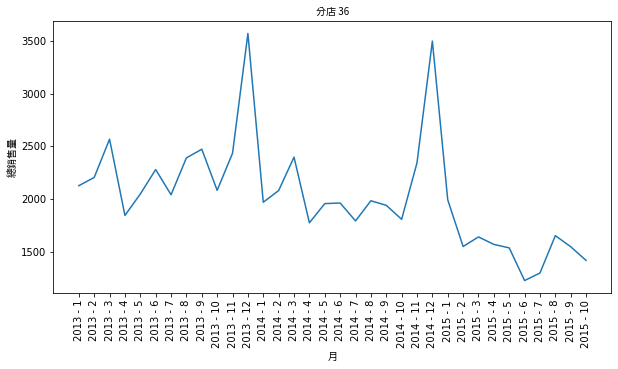

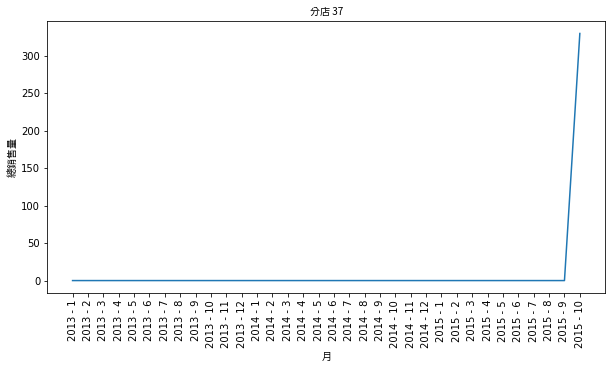

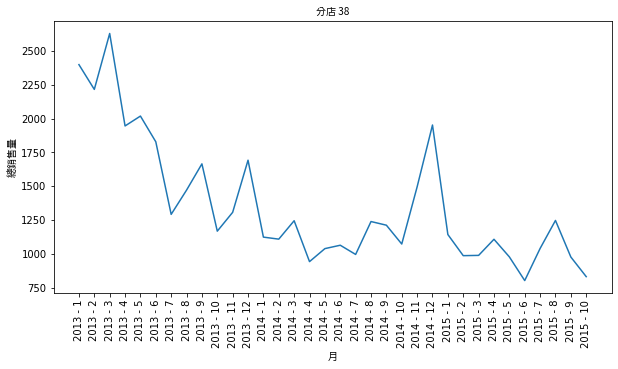

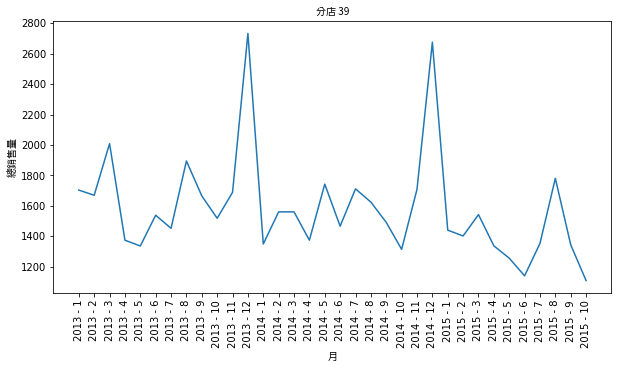

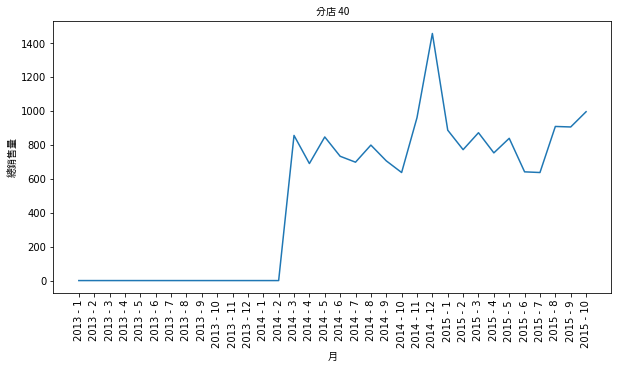

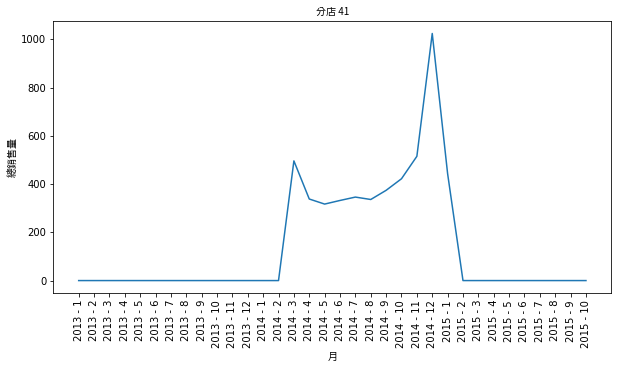

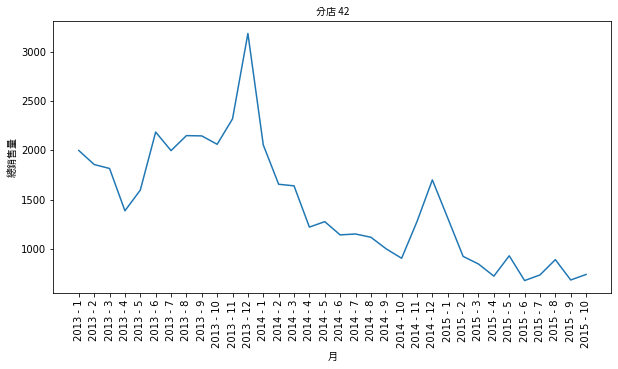

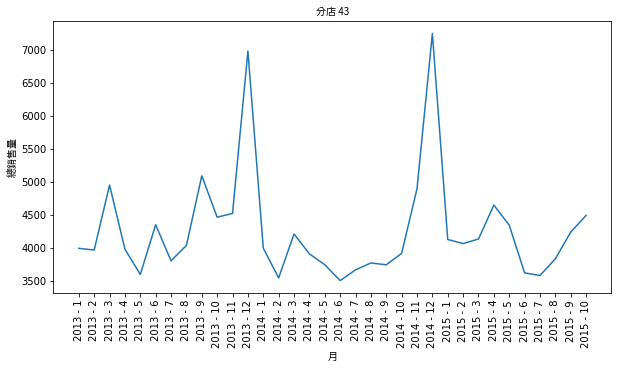

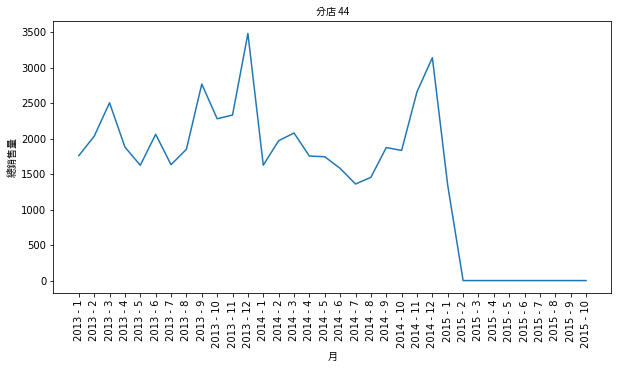

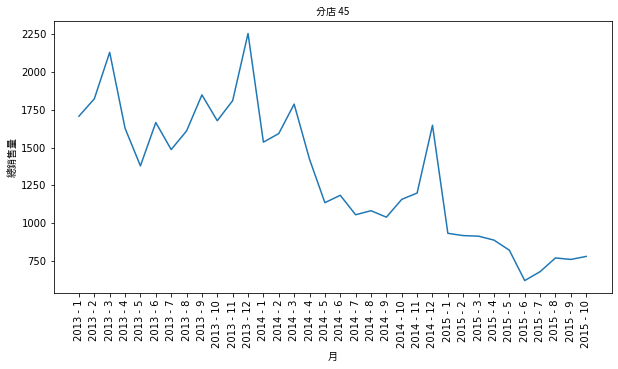

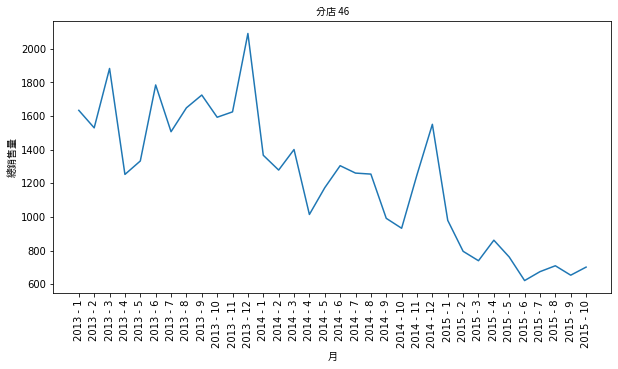

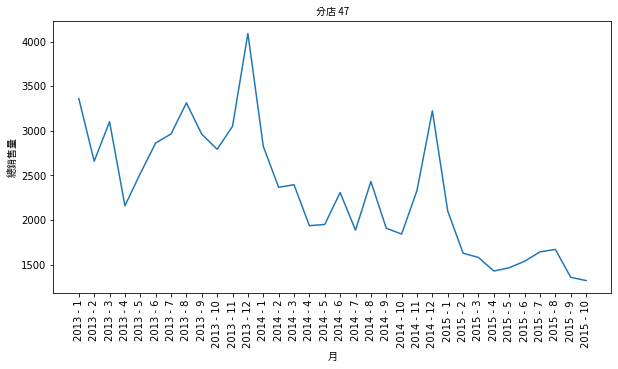

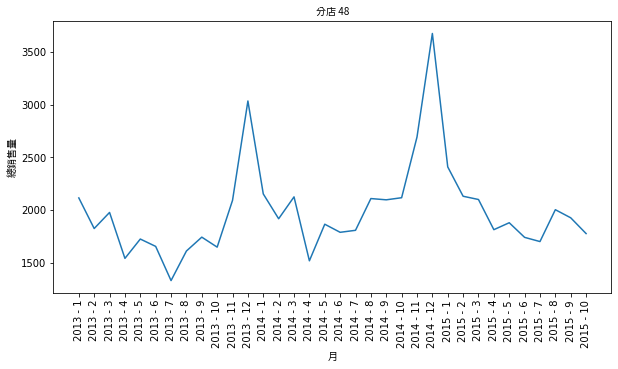

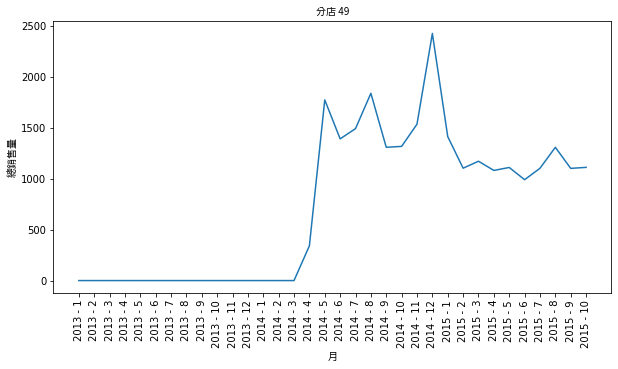

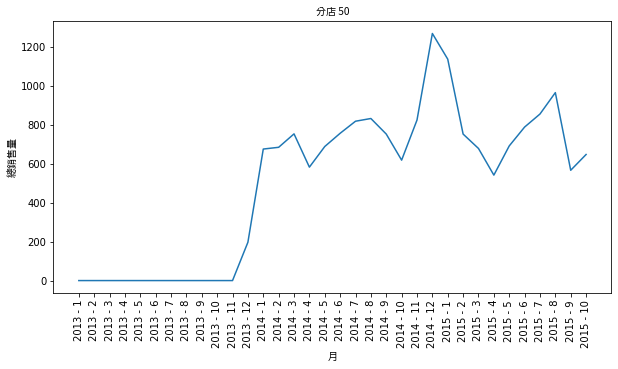

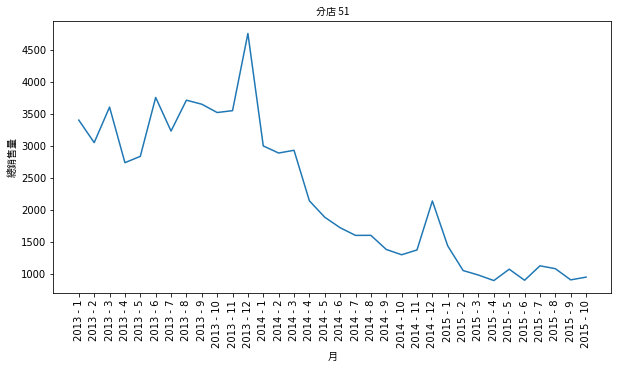

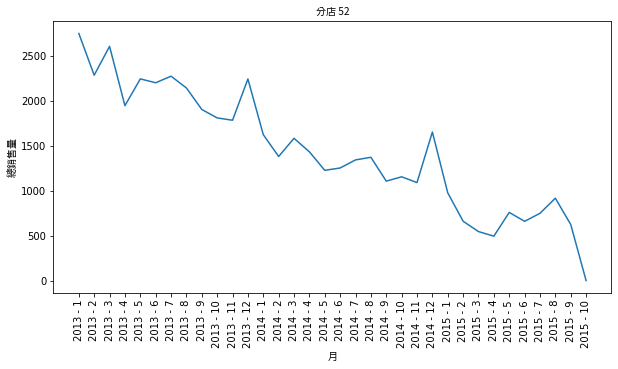

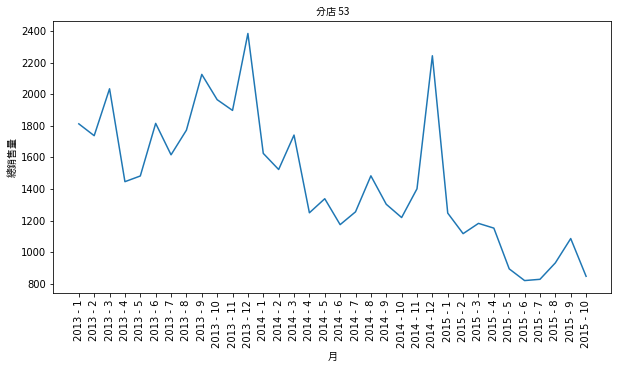

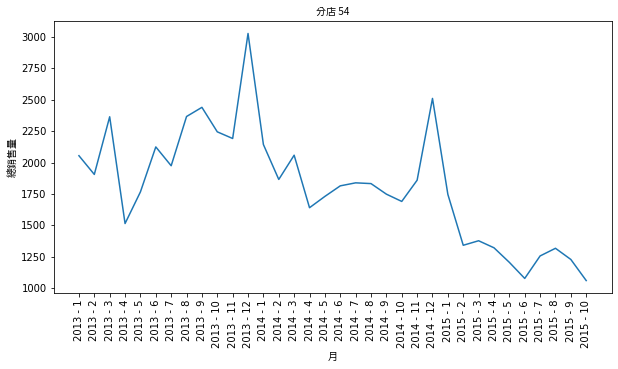

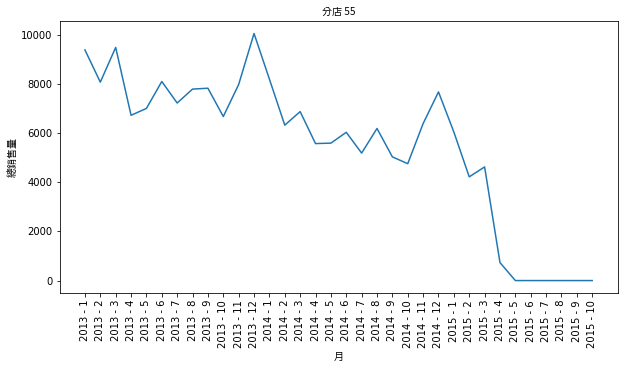

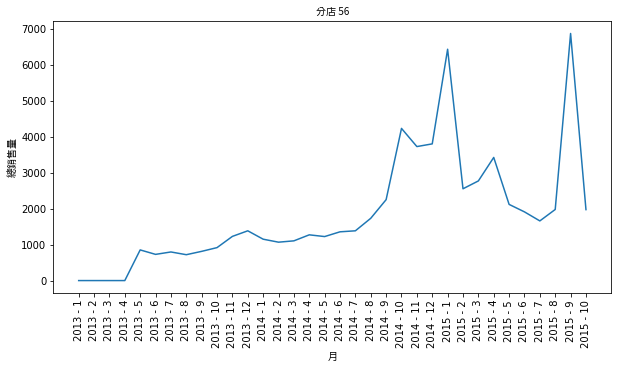

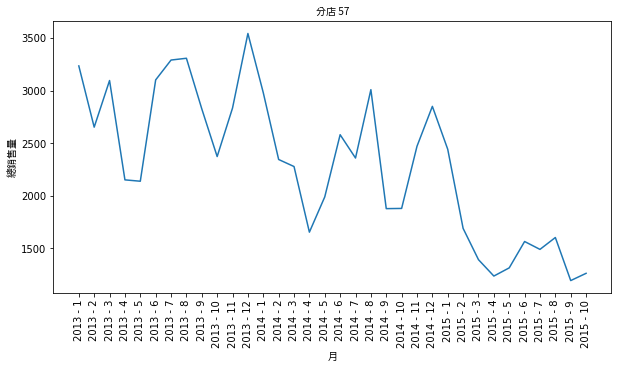

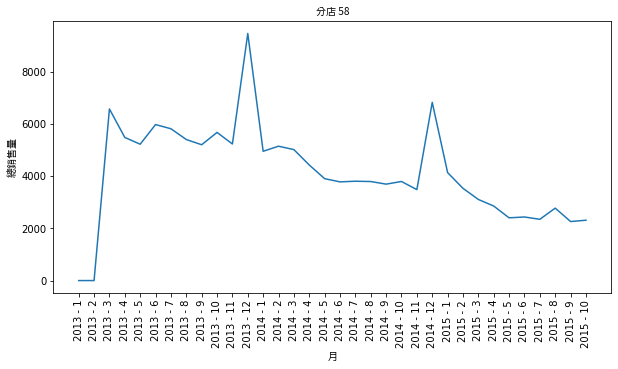

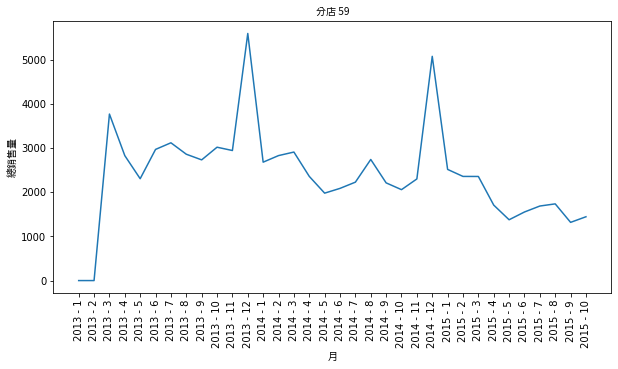

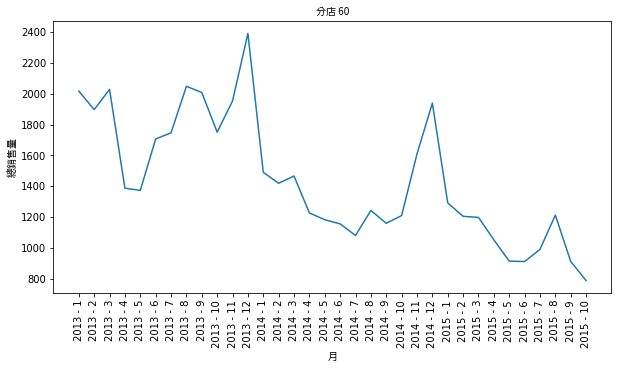

In [ ]:
for j in range(shop_cnt):
    plt.figure(figsize=(10,5))
    plt.plot(d[:,j])
    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月', fontproperties=myfont)
    plt.ylabel('總銷售量', fontproperties=myfont)
    plt.title(f'分店 {j+1}', fontproperties=myfont)

## 品項價格

Text(0, 0.5, '平均價格')

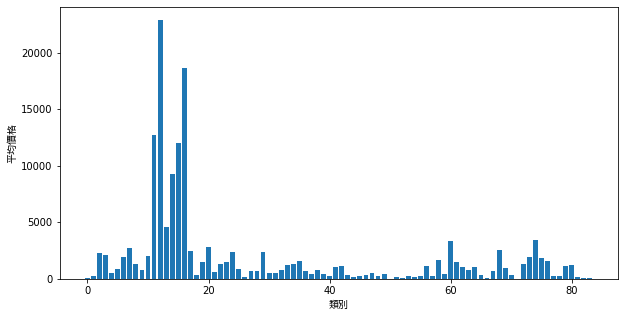

In [ ]:
d = np.zeros([cate_cnt])
plt.figure(figsize=(10,5))
for i in range(cate_cnt):
    d[i] = np.mean(df['item_price'][df['item_category_id'] == i])

plt.bar(range(cate_cnt), d)
plt.xlabel('類別',fontproperties=myfont)
plt.ylabel('平均價格',fontproperties=myfont)


## 分店品項關係

In [ ]:
d = np.zeros([shop_cnt, cate_cnt])

In [ ]:
shop_id = df['shop_id']
item_id = df['item_cnt_day']
cate_id = df['item_category_id']
for shop in range(shop_cnt):
    for cate in range(cate_cnt):
        d[shop,cate] = np.sum(item_id[(shop_id == shop) & (cate_id == cate)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


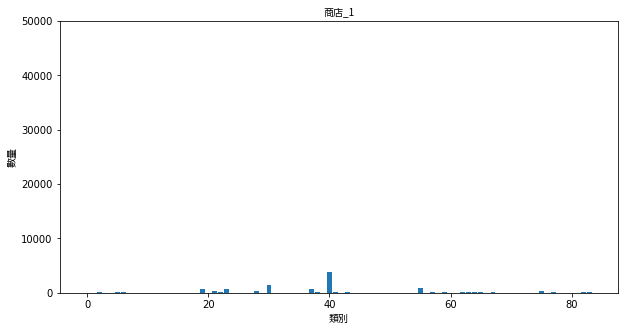

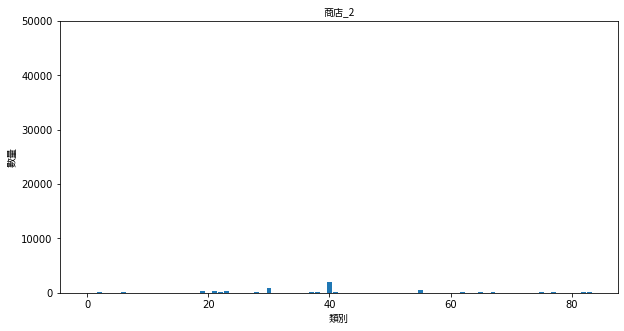

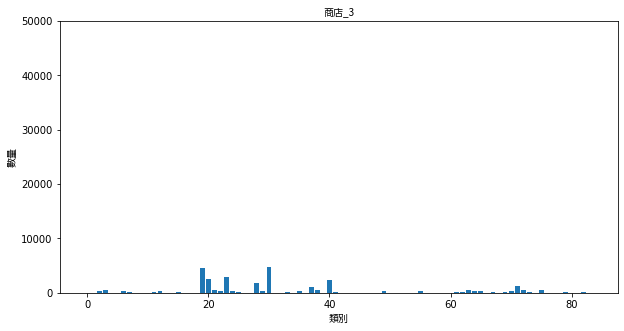

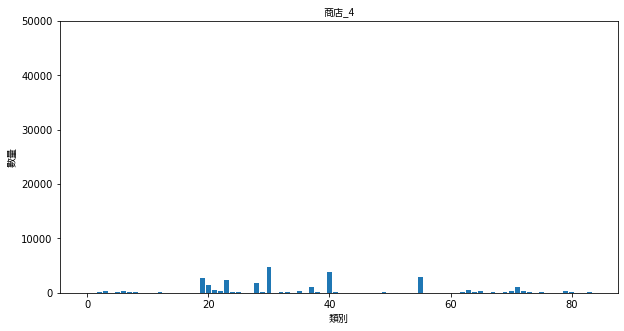

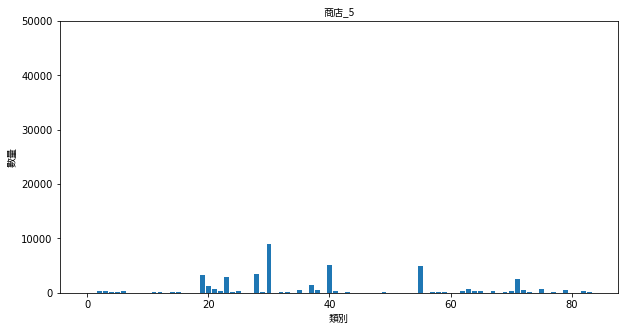

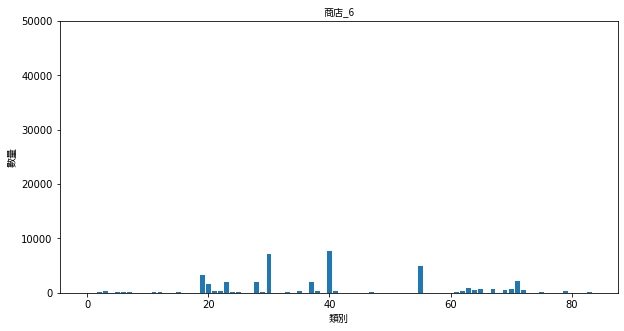

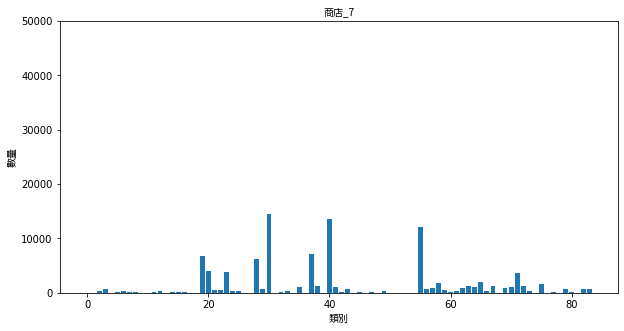

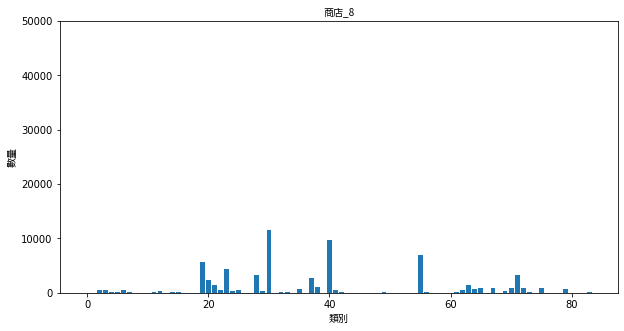

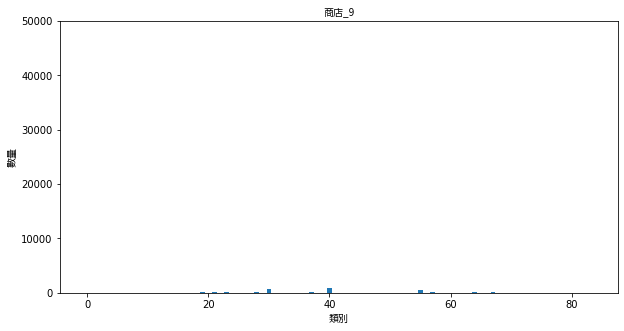

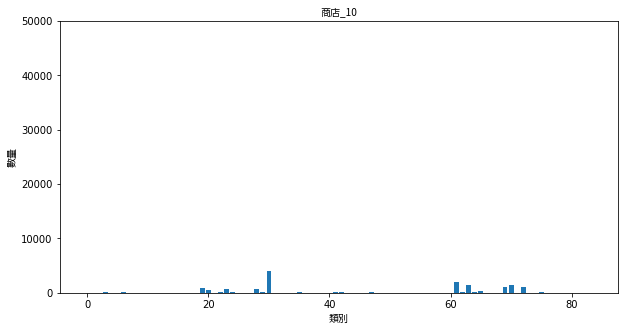

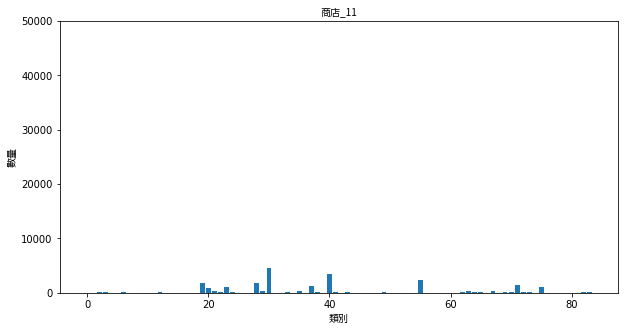

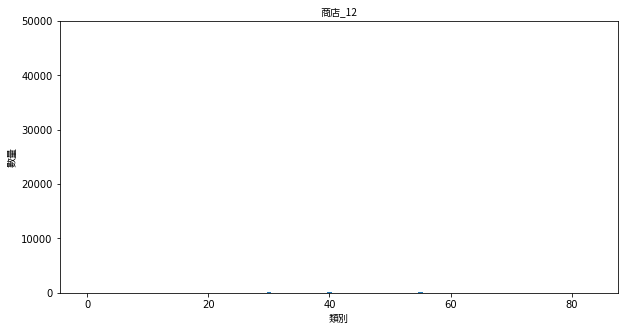

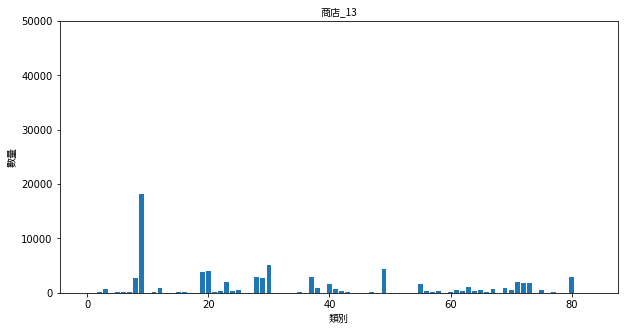

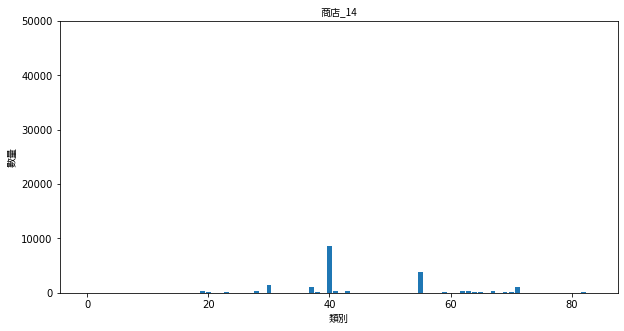

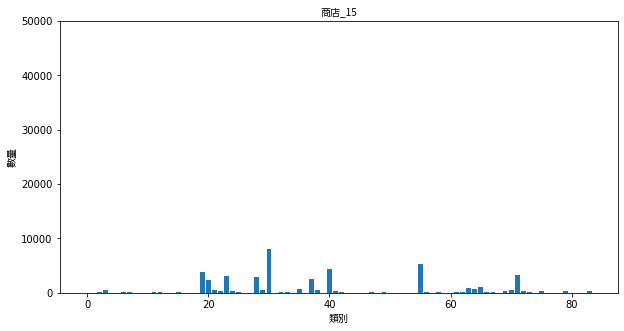

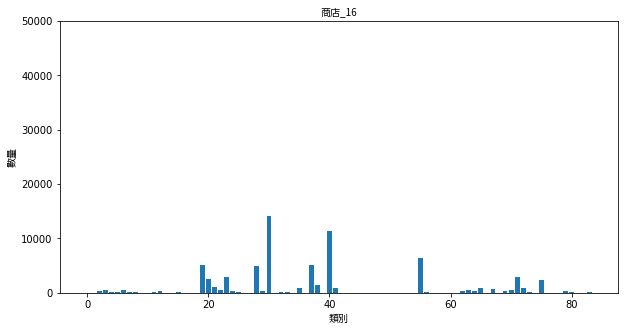

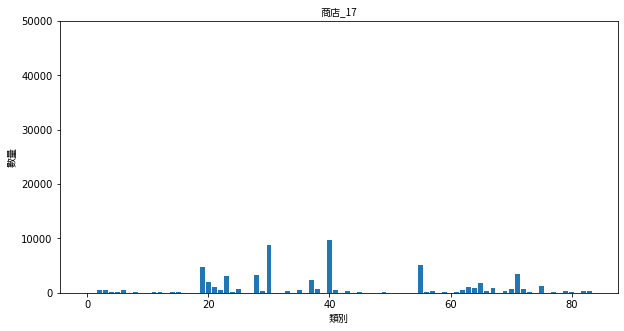

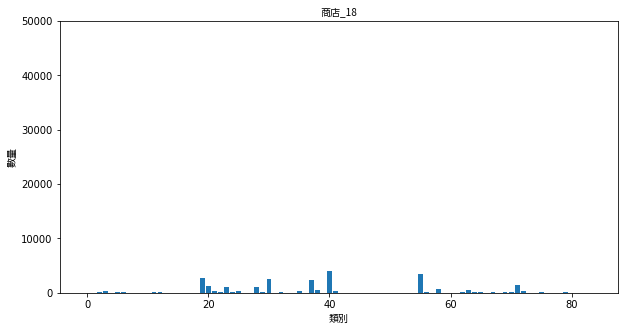

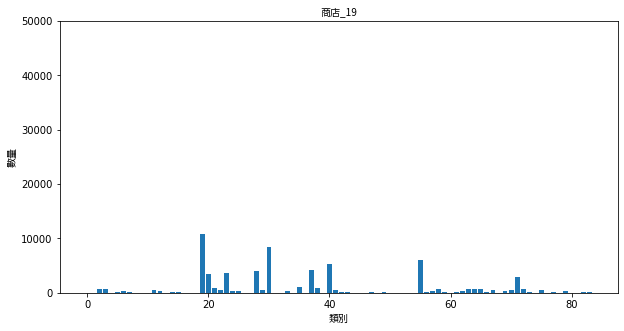

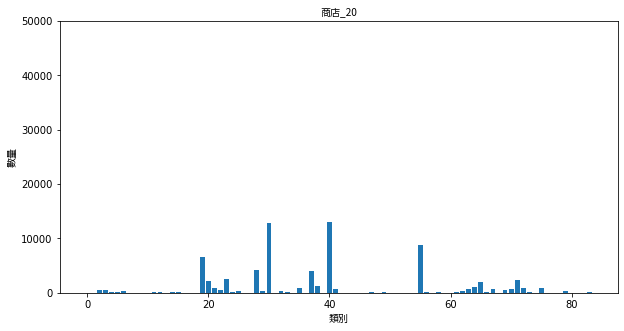

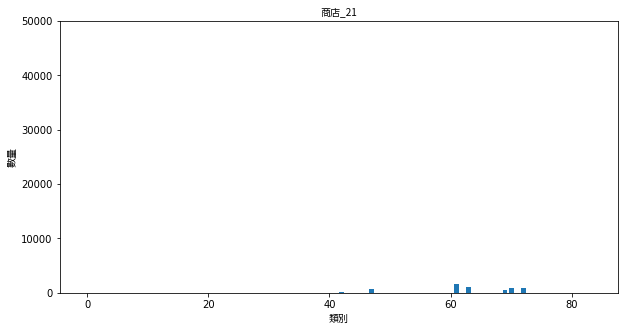

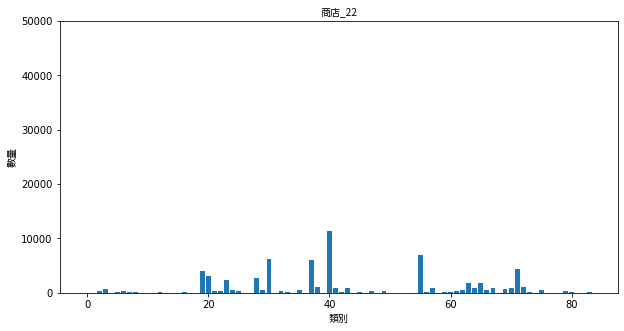

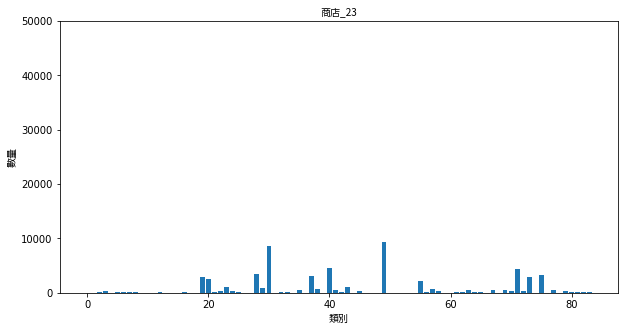

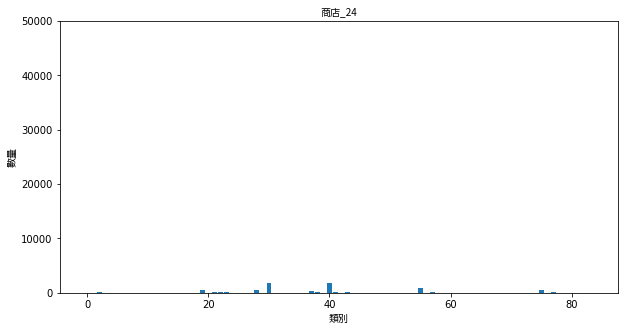

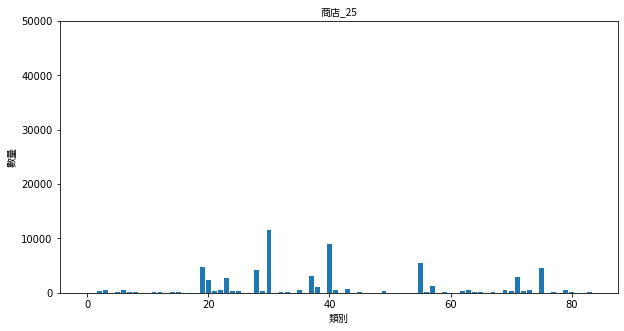

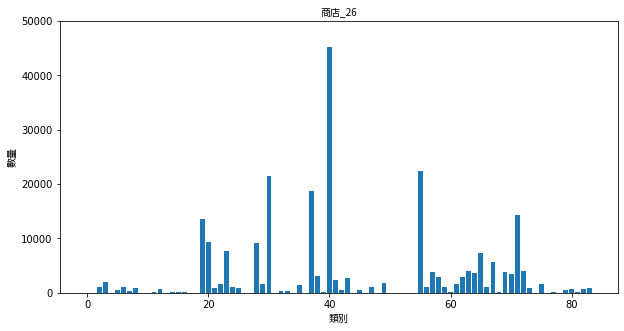

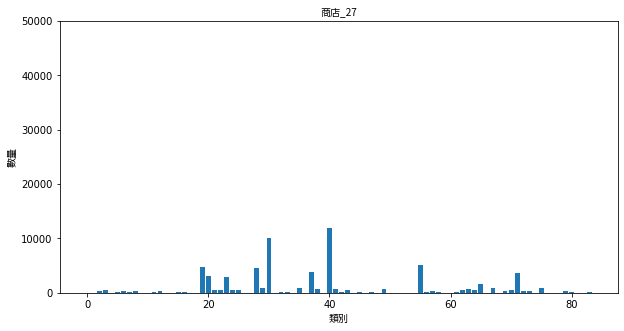

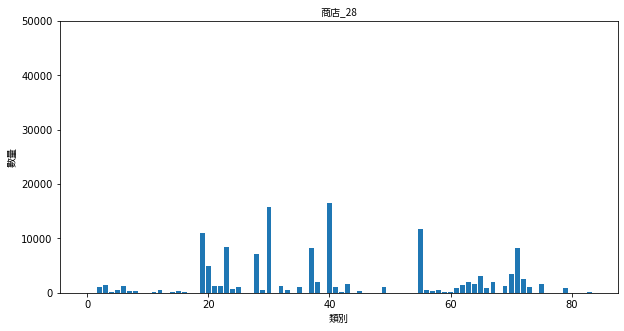

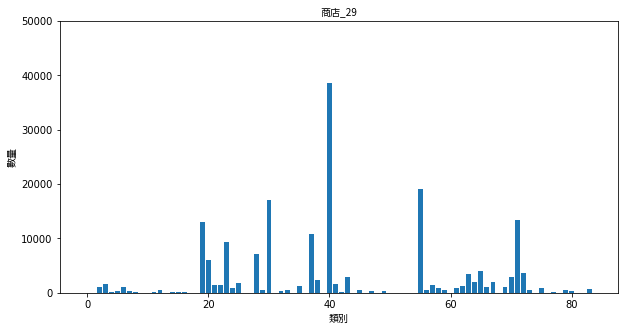

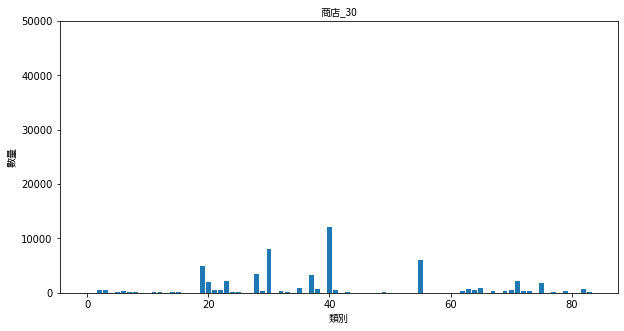

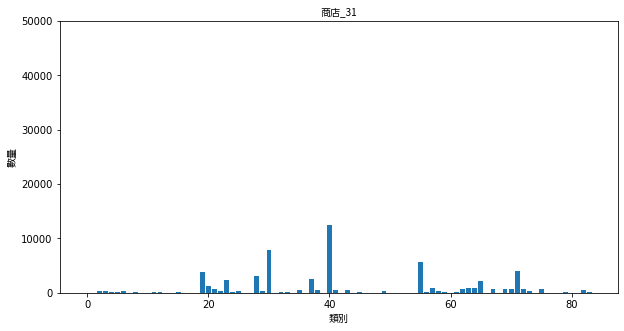

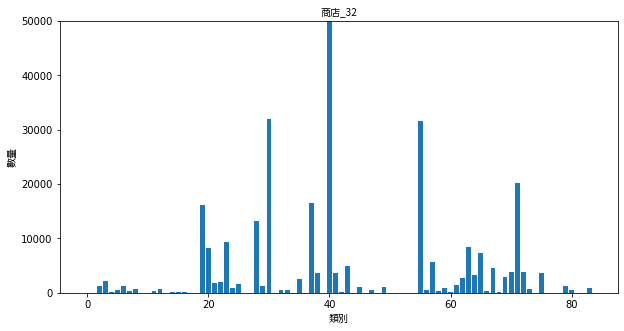

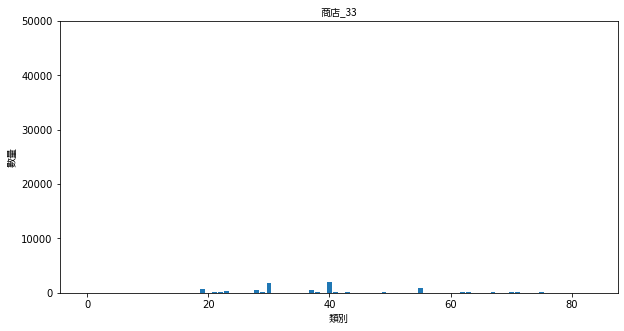

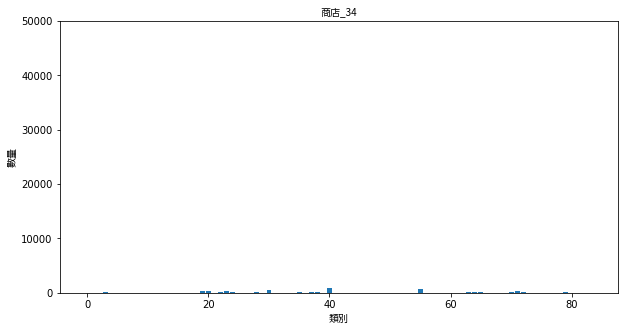

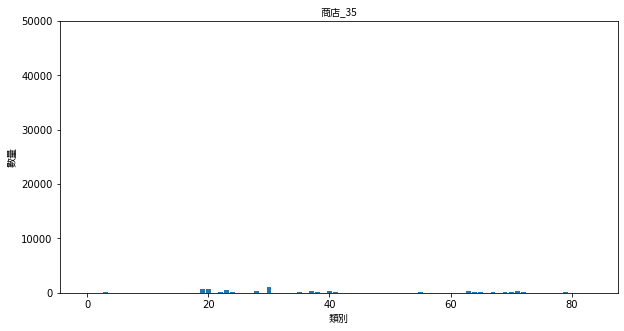

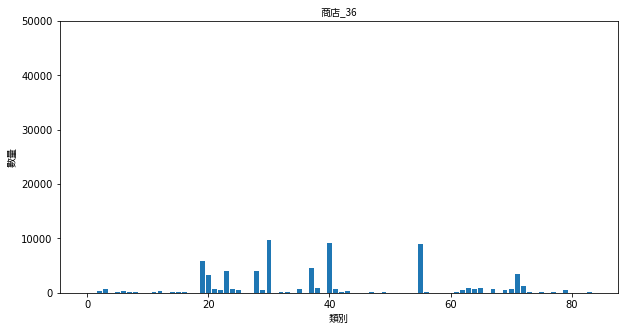

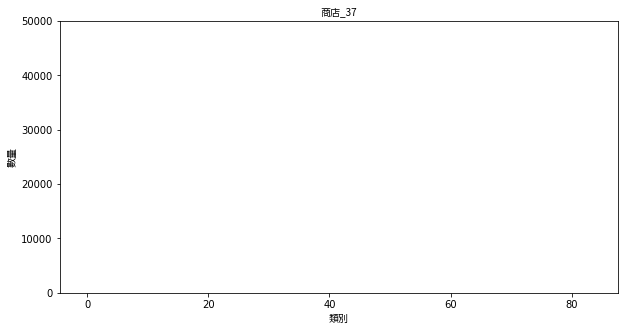

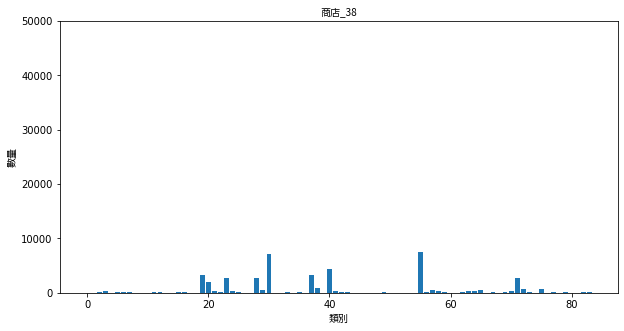

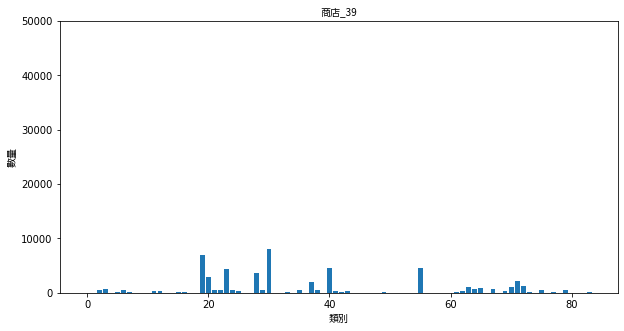

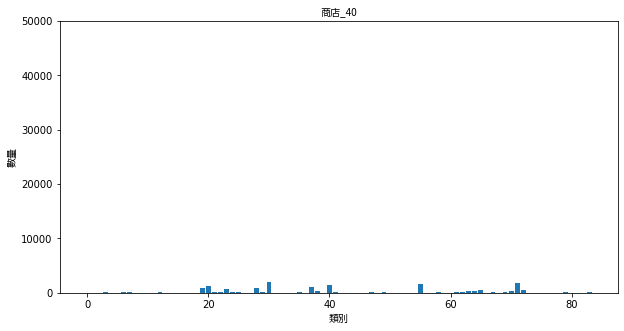

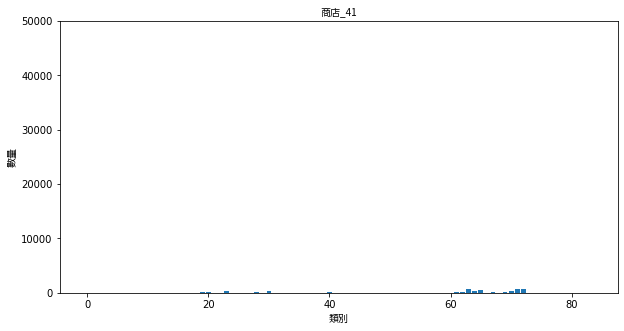

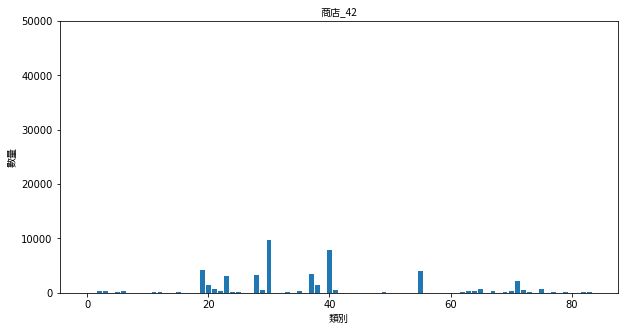

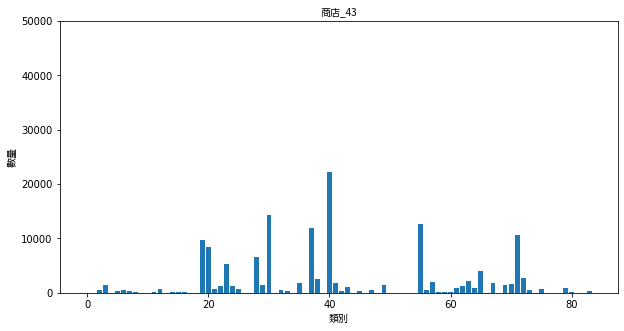

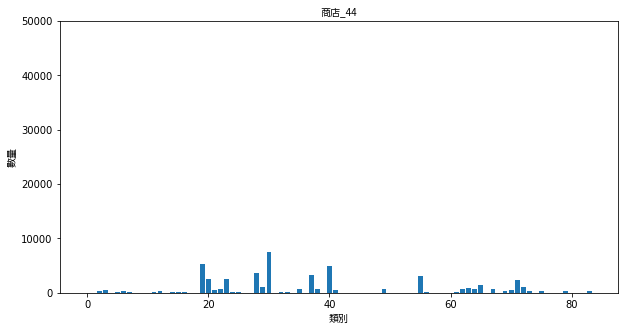

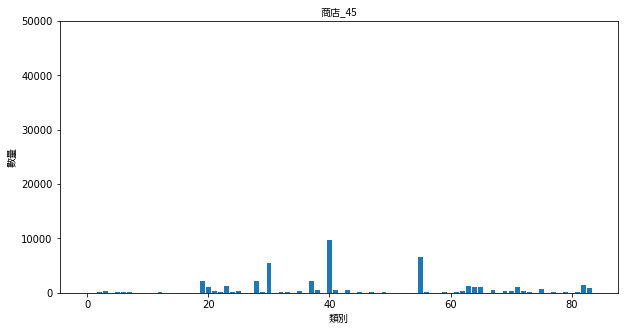

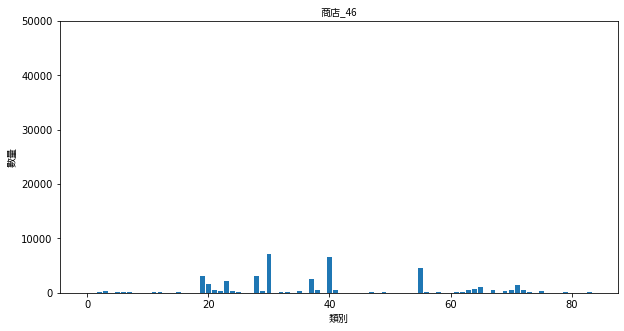

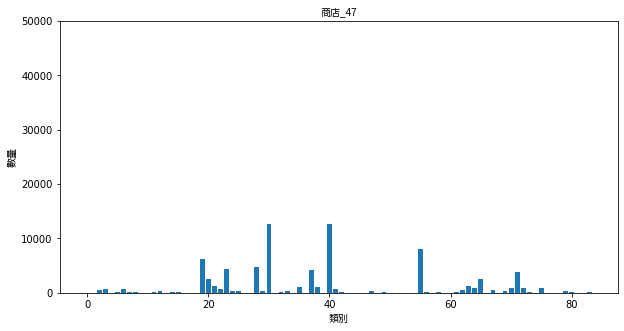

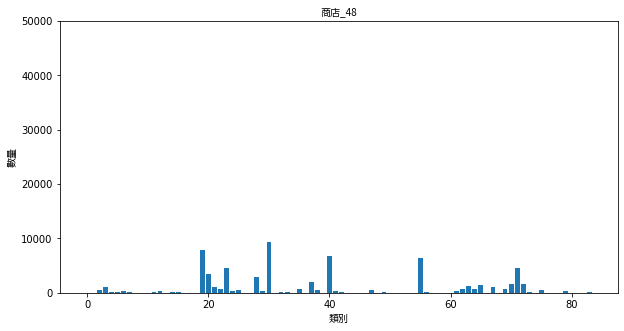

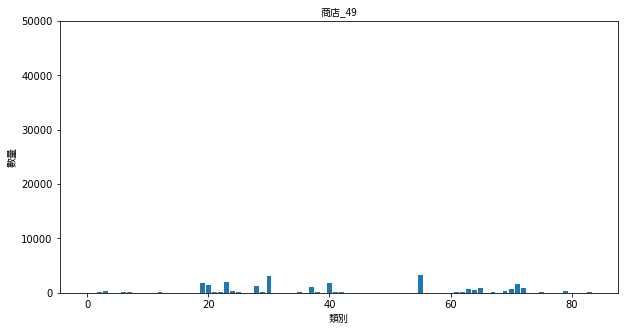

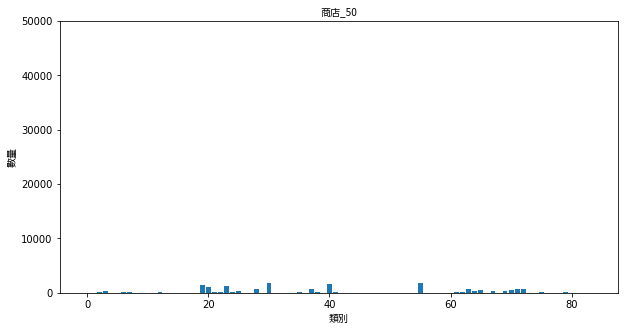

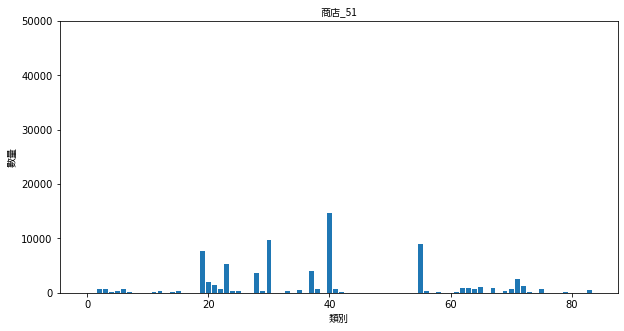

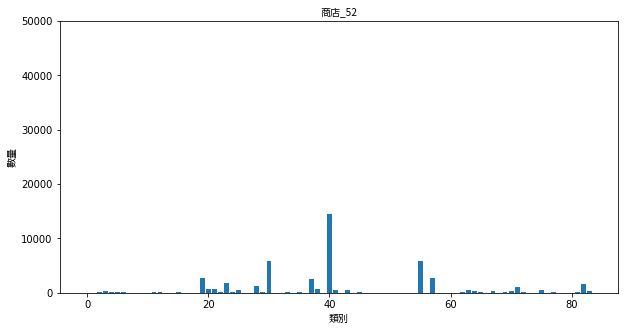

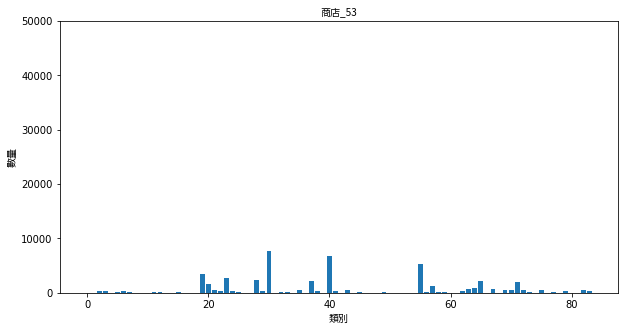

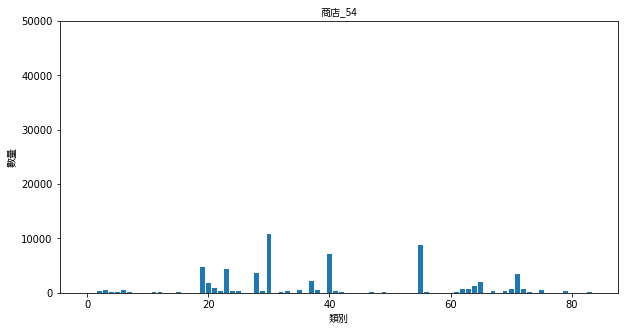

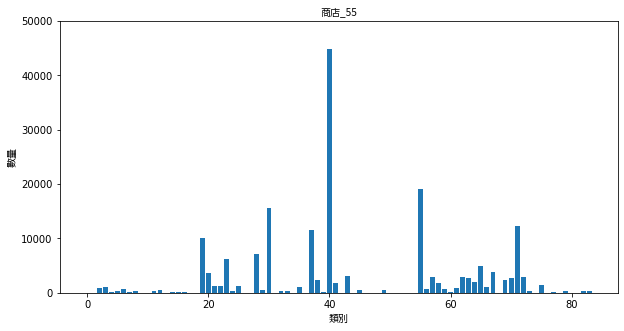

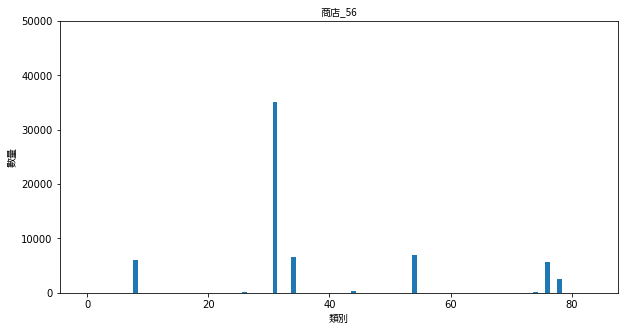

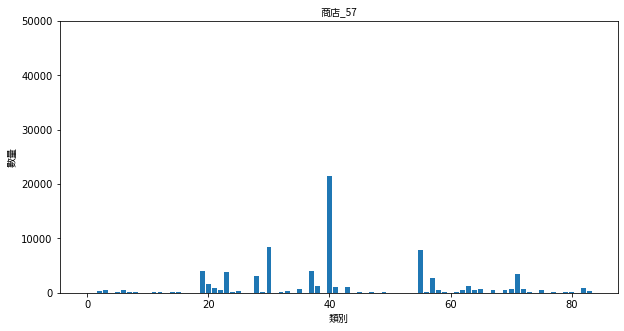

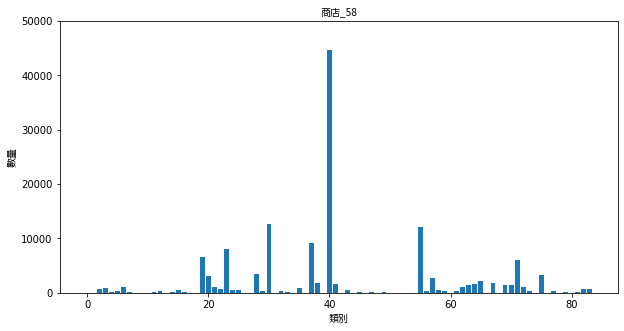

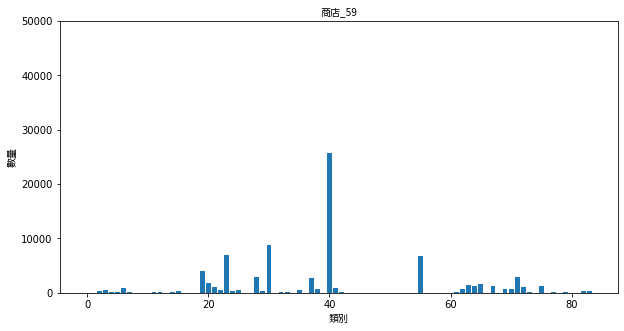

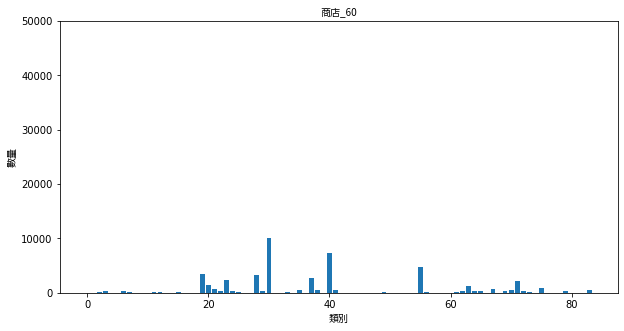

In [ ]:
for shop in range(shop_cnt):
    plt.figure(figsize=(10,5))
    plt.bar(range(cate_cnt),d[shop,:])
    
    plt.title(f'商店_{shop+1}',fontproperties=myfont)
    plt.ylabel('數量',fontproperties=myfont)
    plt.xlabel('類別',fontproperties=myfont)
    plt.ylim([0,50000])

    

## 類別和物件

In [ ]:
d = np.zeros([month_cnt,item_cnt]) 

In [ ]:
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']


for month in range(month_cnt):
    item_ids = df[(month_id == month)]['item_id']  
    d[month,item_ids] += item_id_cnt[item_ids.index]

In [ ]:
select_cate_id = 40
item_in_cate = df_itemCategory[df_itemCategory['item_category_id'] == select_cate_id]['item_id']

類別總和

Text(0.5, 1.0, '類別_40')

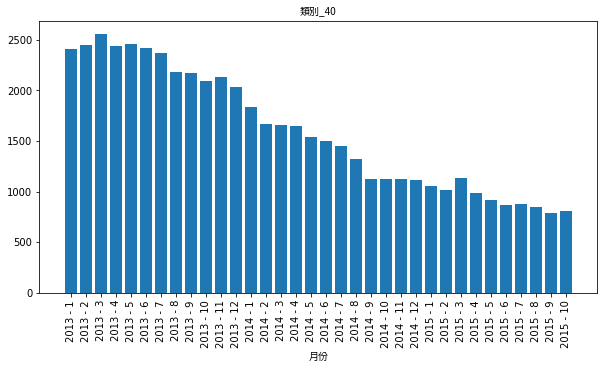

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(month_cnt),np.sum(d[:,item_in_cate],axis=1))

dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]
plt.xticks(ticks=range(34), labels=label, rotation=90)
plt.xlabel('月份',fontproperties=myfont)
plt.title(f'類別_{select_cate_id}',fontproperties=myfont)

各物件

In [ ]:
print(len(item_in_cate))
for item in item_in_cate:
    
    plt.figure(figsize=(10,5))
    plt.bar(range(month_cnt),d[:,item])

    dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
    label = [f'{d.year} - {d.month}' for d in dateList]
    plt.xticks(ticks=range(34), labels=label, rotation=90)
    plt.xlabel('月份',fontproperties=myfont)
    plt.title(f'物件_{item}',fontproperties=myfont)

## 價格 vs 銷量

In [ ]:
d = np.zeros([item_cnt,2]) #[cnt,price]

In [ ]:
for item in range(item_cnt):
    d[item,1] = np.mean(df[df['item_id'] == item]['item_price'])
    d[item,0] += np.sum(df[df['item_id'] == item]['item_cnt_day'])

Text(0, 0.5, '總銷量')

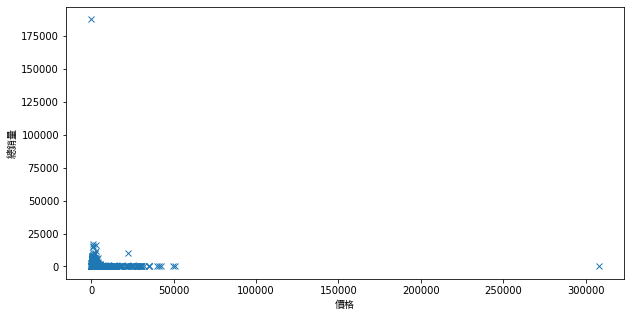

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(d[:,1],d[:,0],'x')

plt.xlabel('價格',fontproperties=myfont)
plt.ylabel('總銷量',fontproperties=myfont)

## 商店&物品

In [ ]:
# [month,shop,item,(count,category)]
d = np.zeros([month_cnt,shop_cnt,item_cnt,2])

In [ ]:
shop_id = df['shop_id']
item_id = df['item_id']
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']

for month in range(month_cnt):
    for shop in range(shop_cnt):        
        select_item_id = item_id[(month_id == month) & (shop_id == shop)]
        select_item_cnt = item_id_cnt[(month_id == month) & (shop_id == shop)]
                
        d[month,shop,select_item_id,0] += select_item_cnt   

d[:,:,:,1] = df_itemCategory['item_category_id']
    

Text(0.5, 0, '月份')

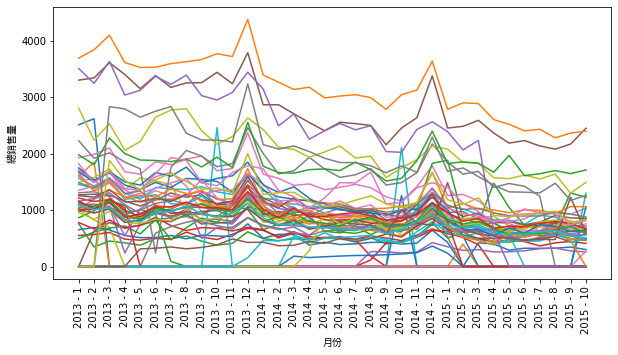

In [ ]:
plt.figure(figsize=(10,5))

dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
label = [f'{d.year} - {d.month}' for d in dateList]
plt.xticks(ticks=range(34), labels=label, rotation=90)

plt.plot(np.sum(d[:,:,:,0],axis=2))

plt.ylabel('總銷售量',fontproperties=myfont)
plt.xlabel('月份',fontproperties=myfont)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


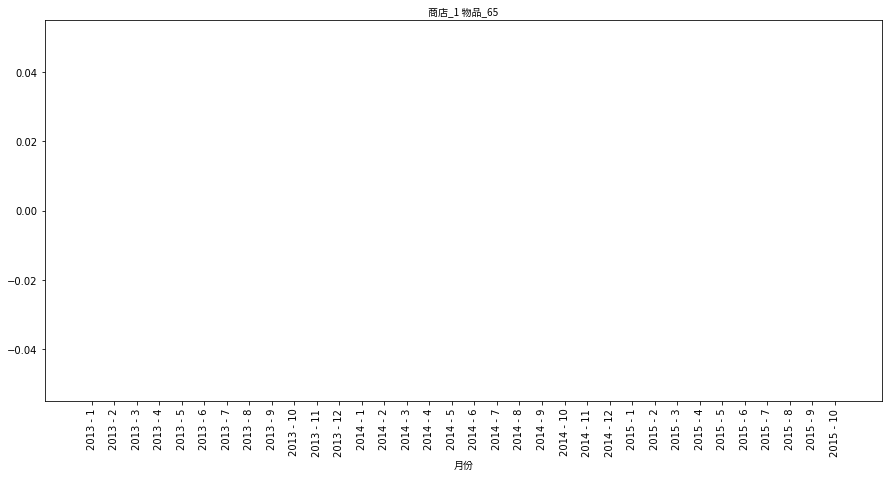

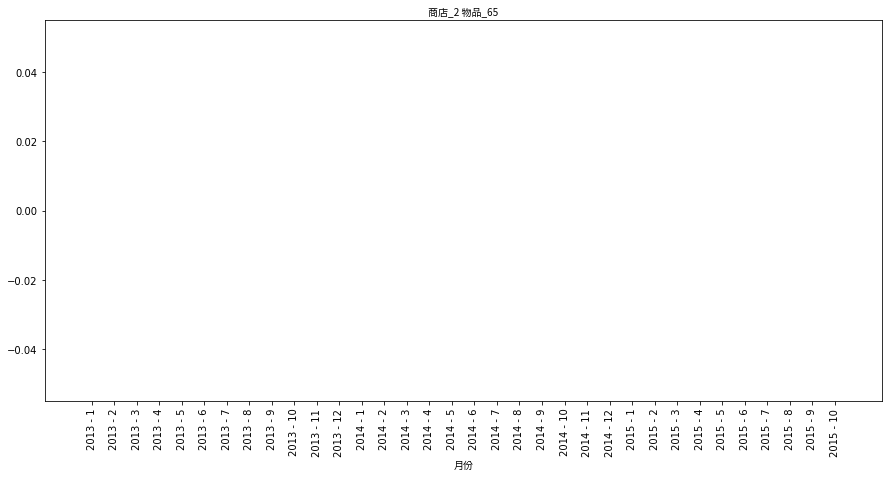

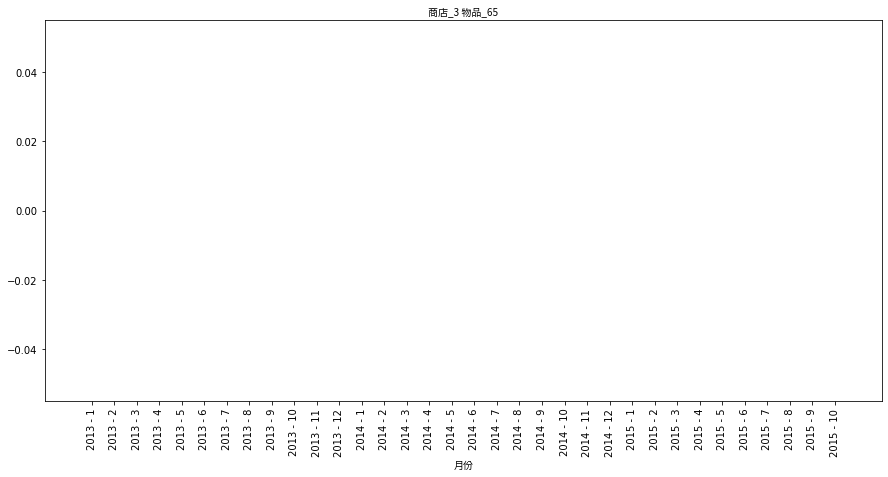

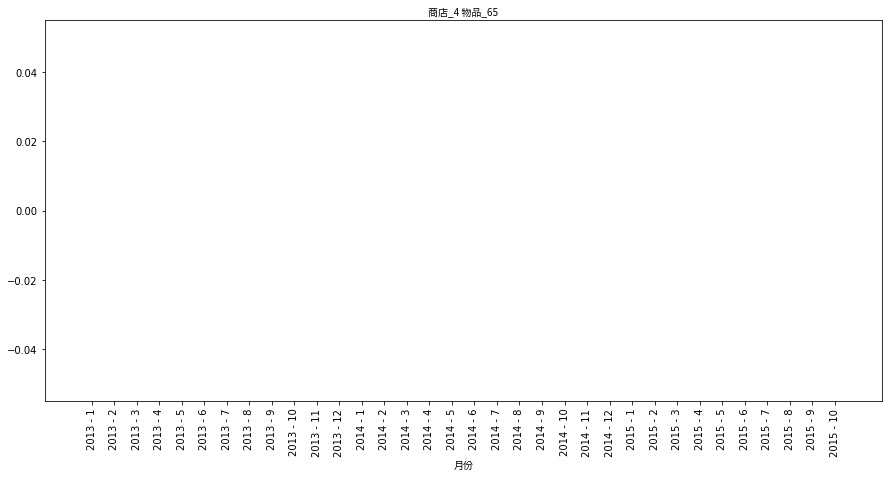

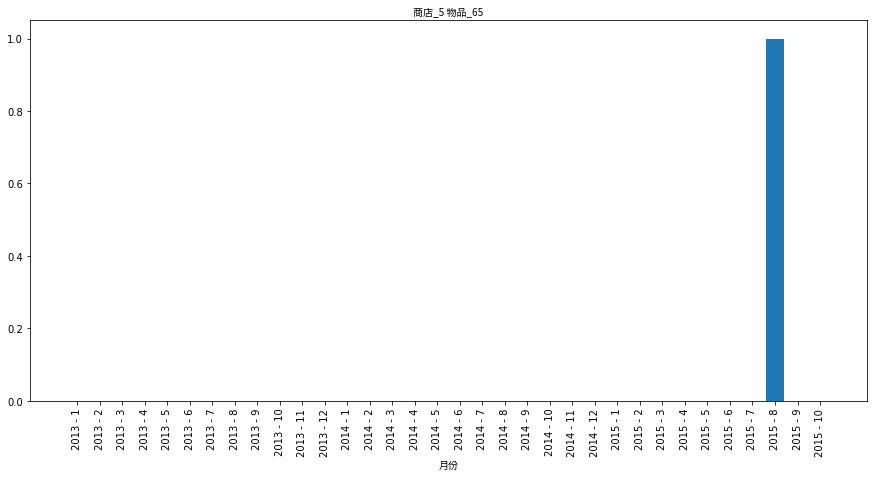

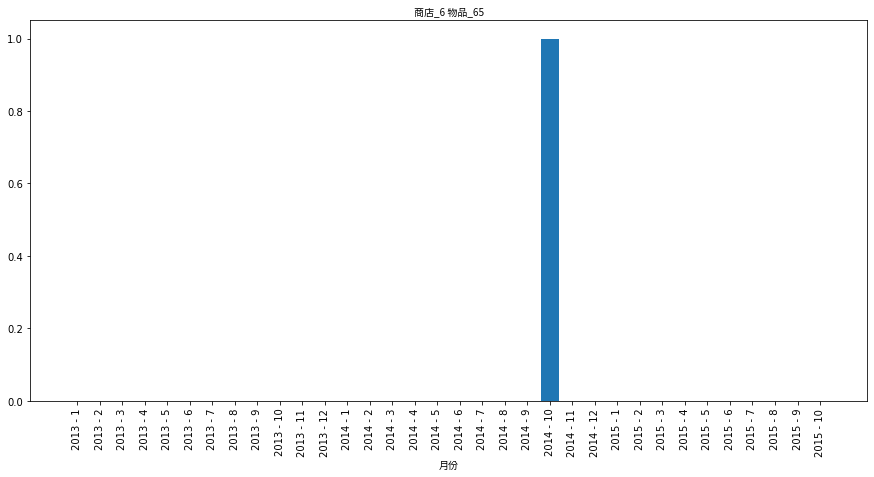

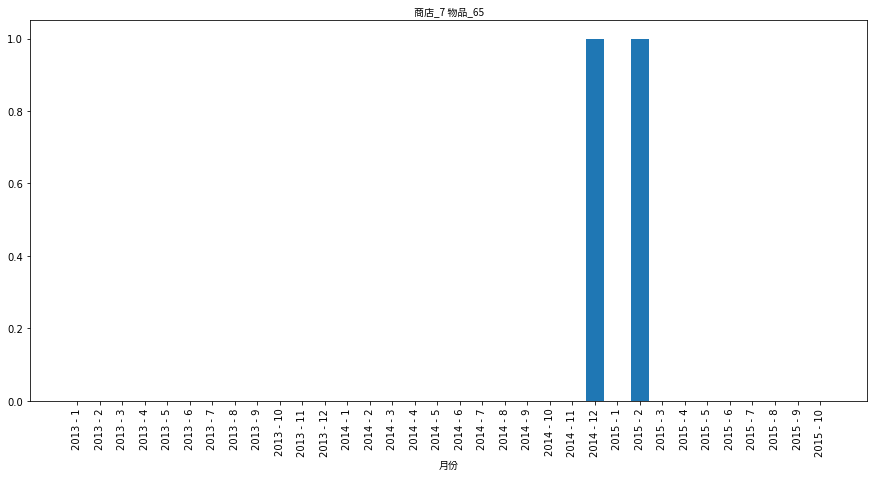

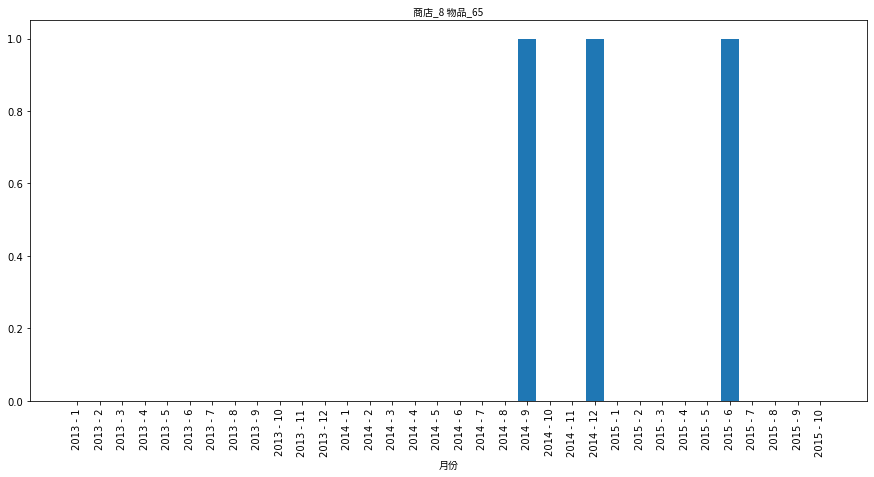

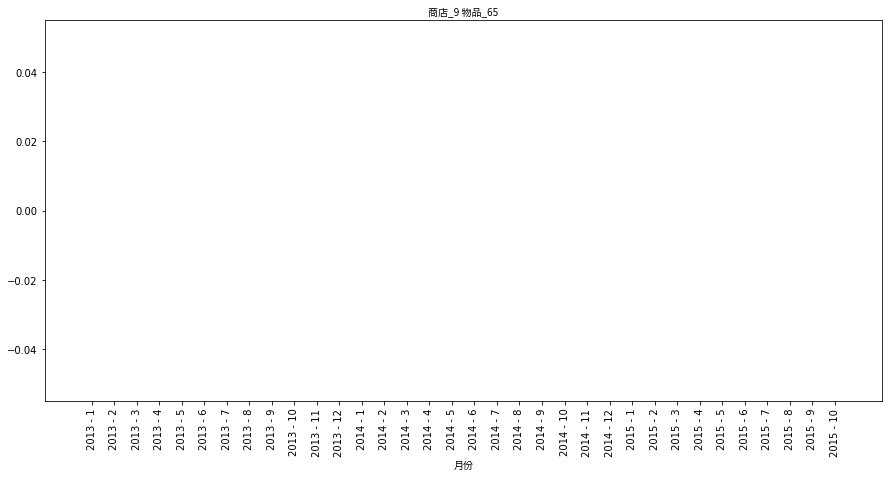

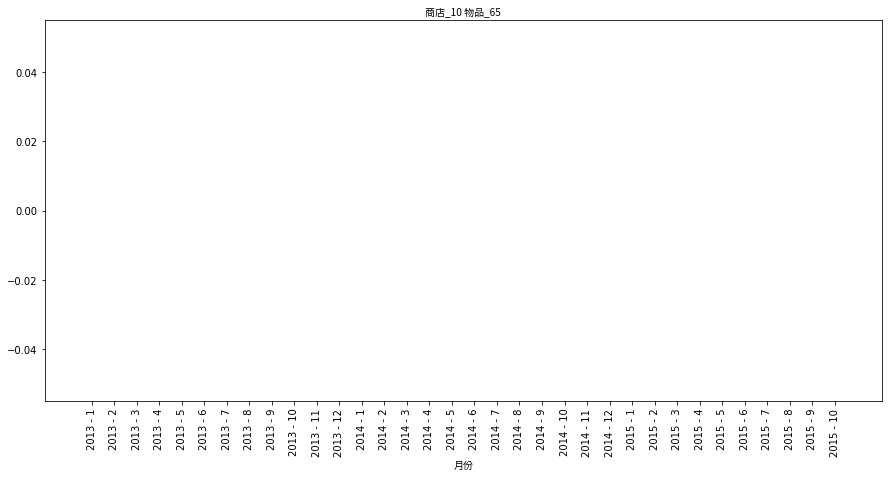

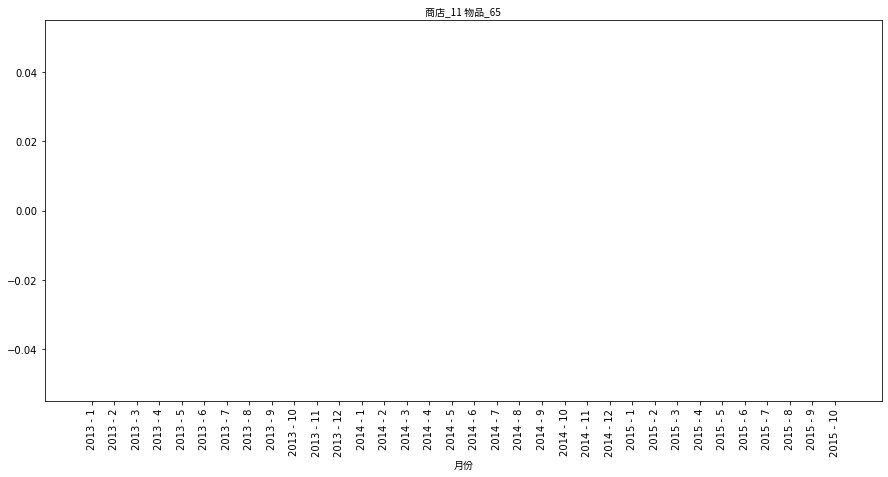

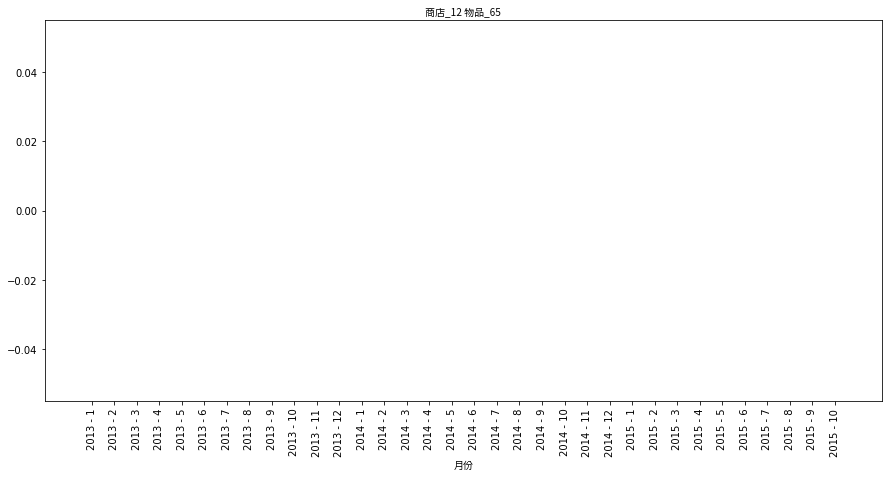

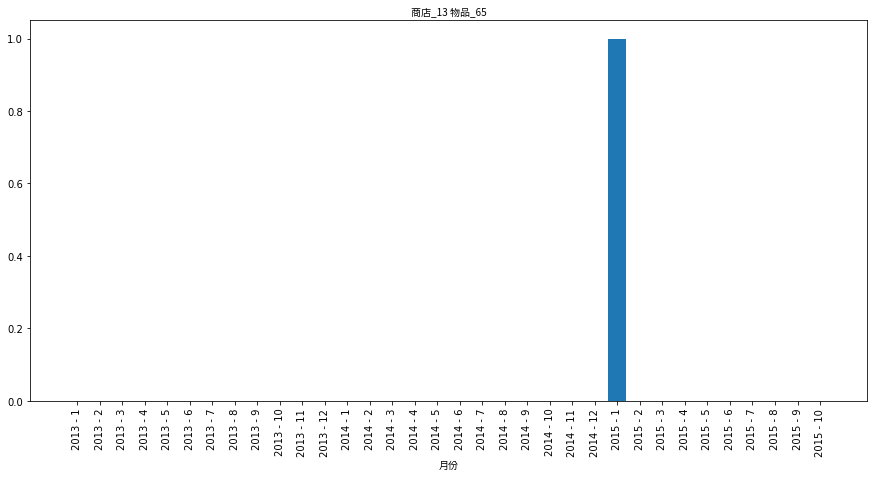

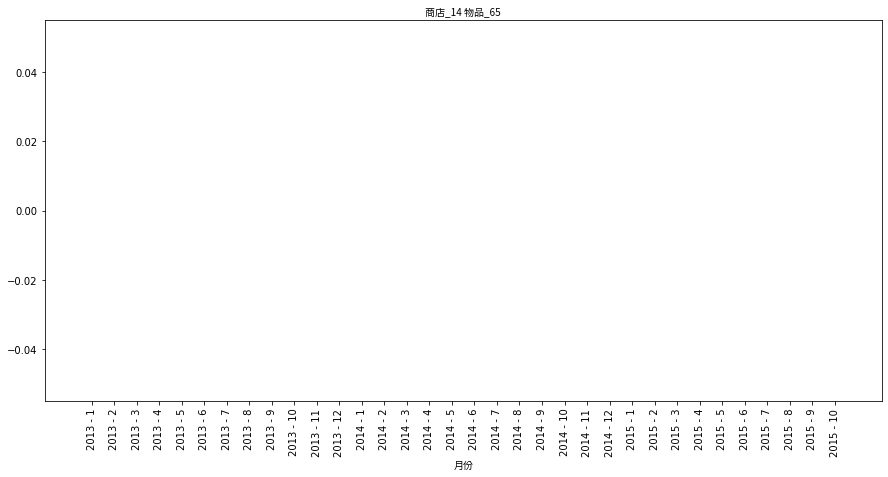

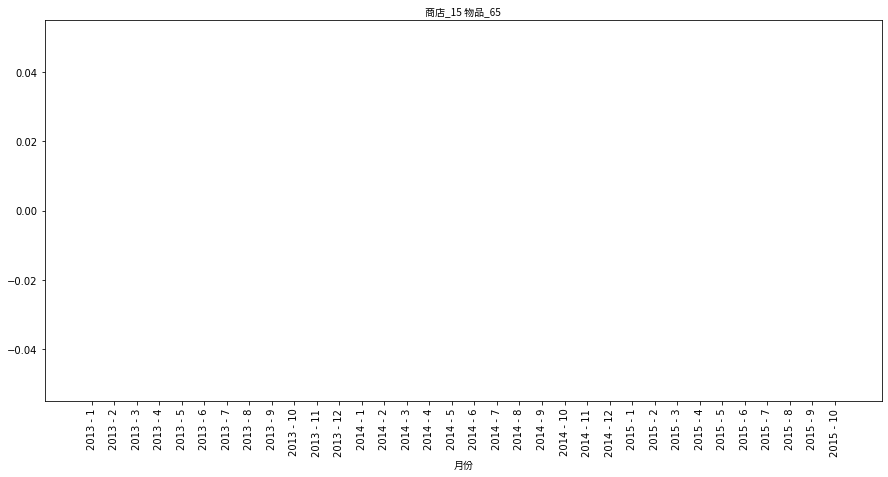

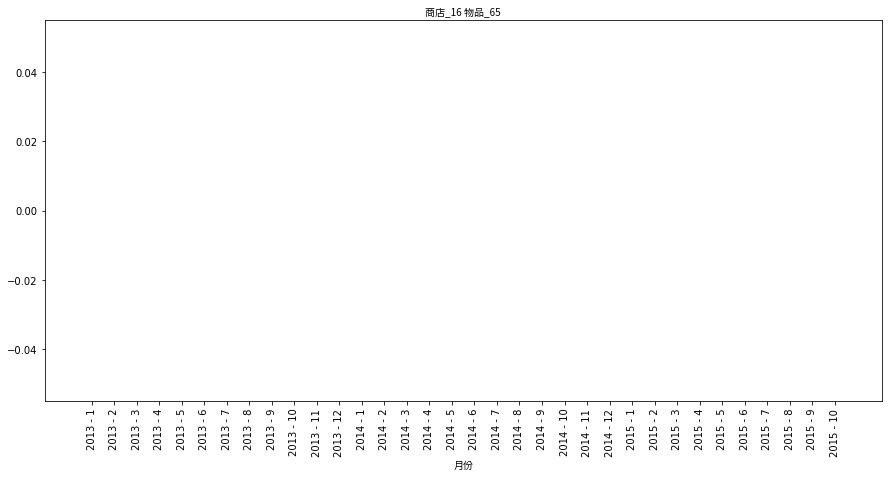

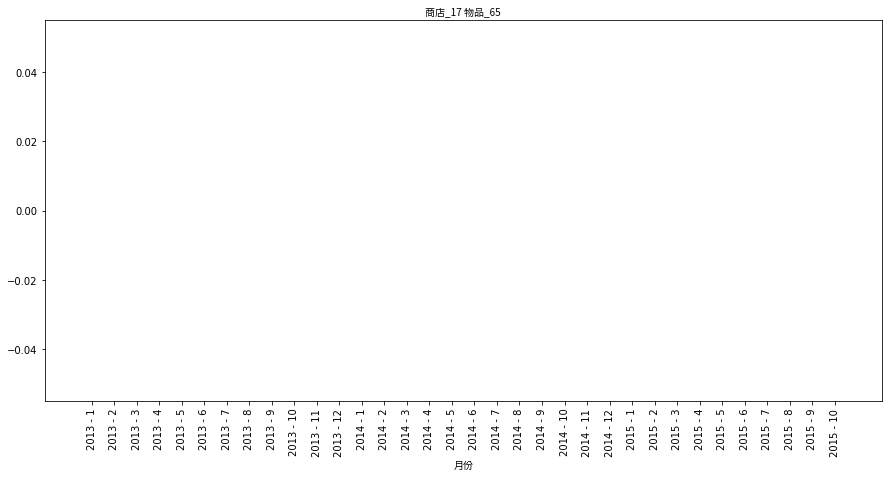

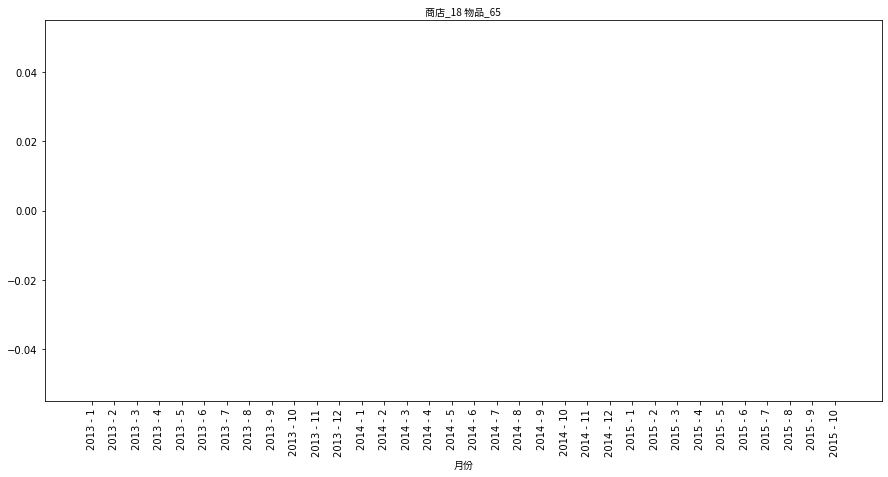

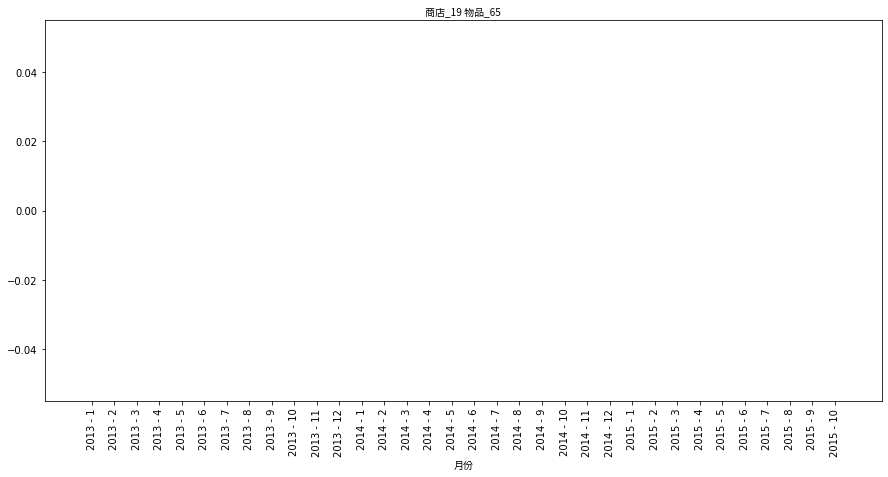

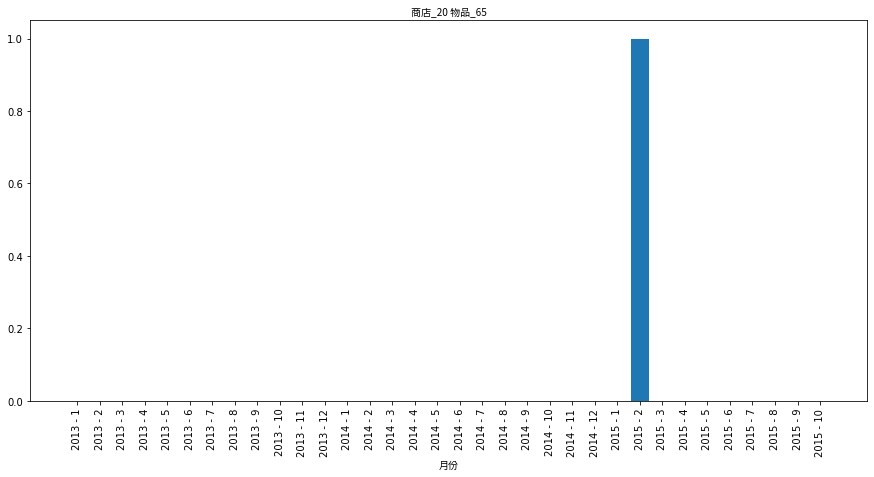

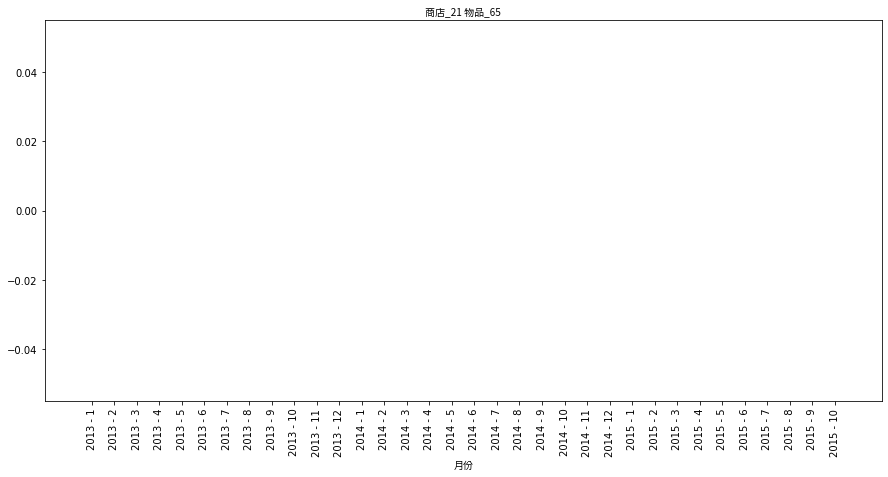

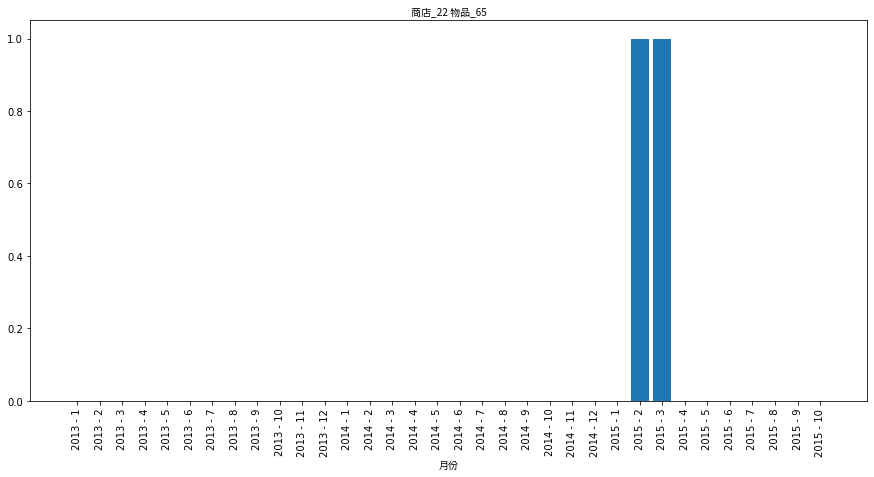

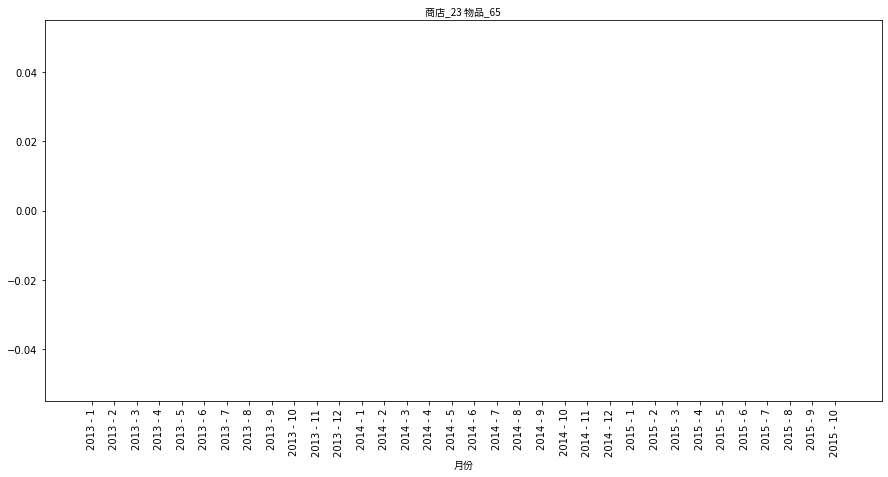

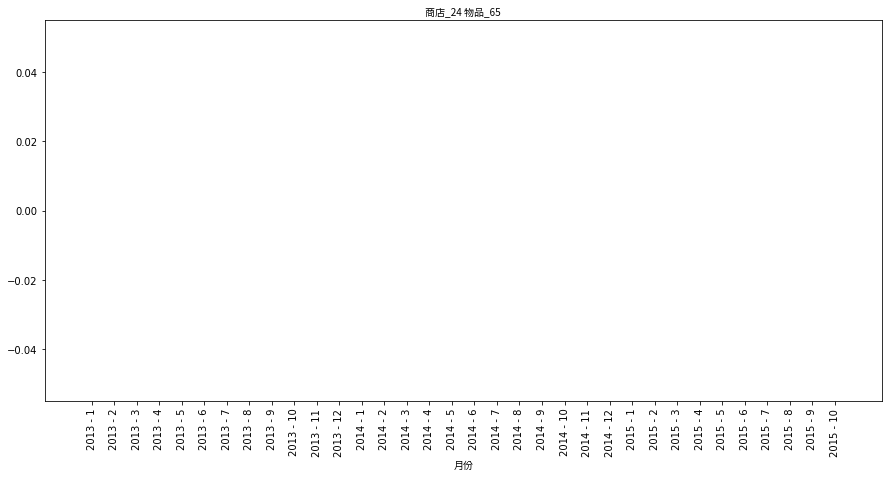

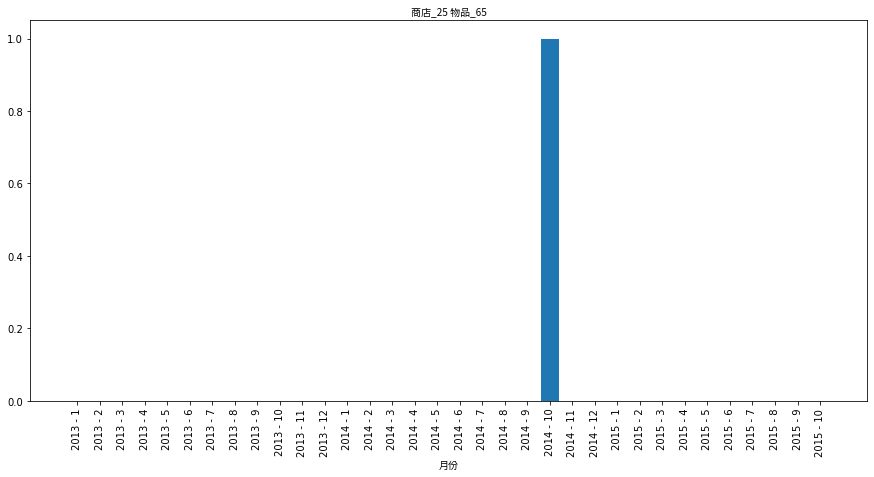

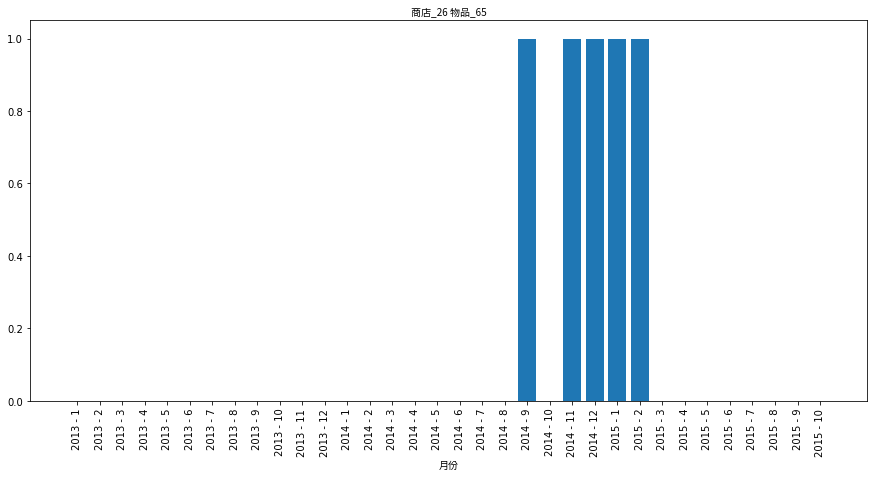

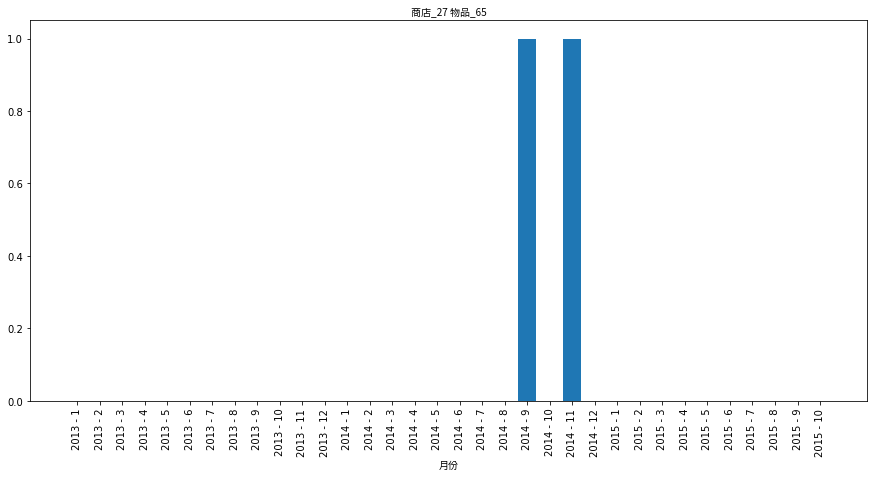

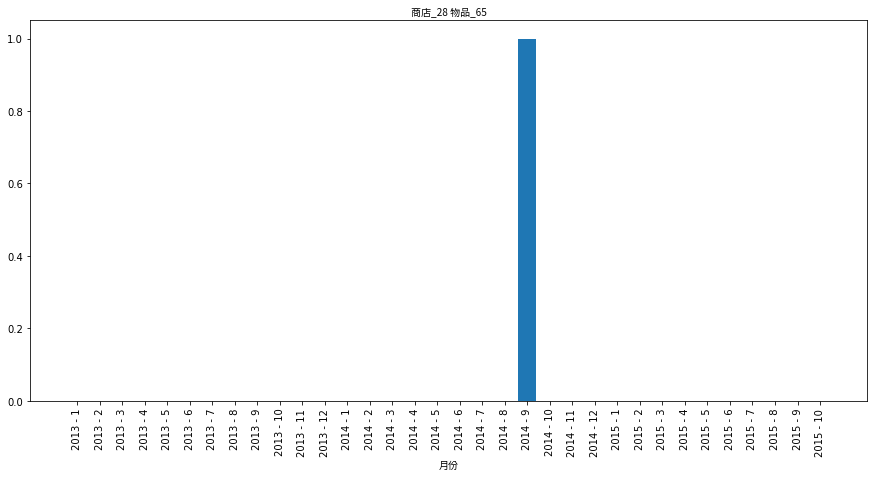

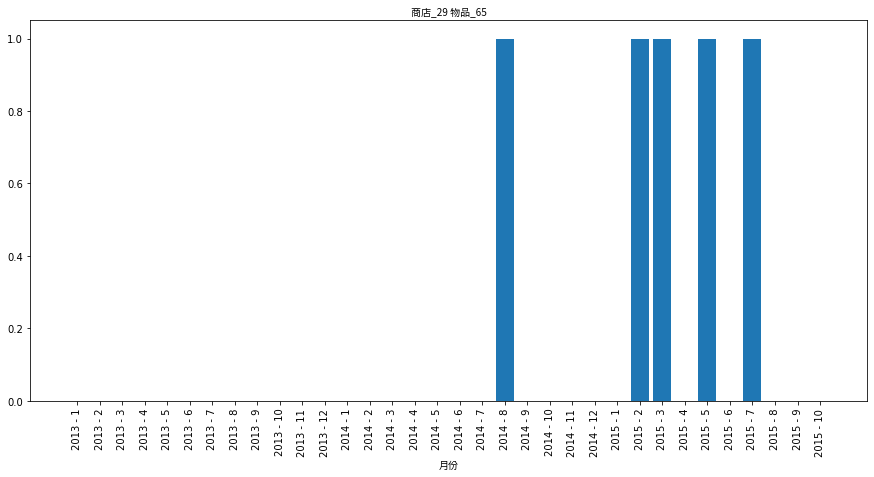

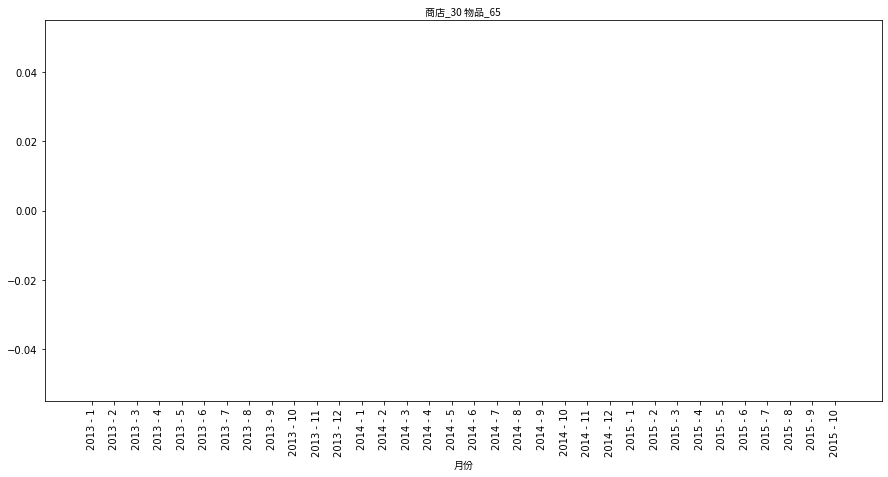

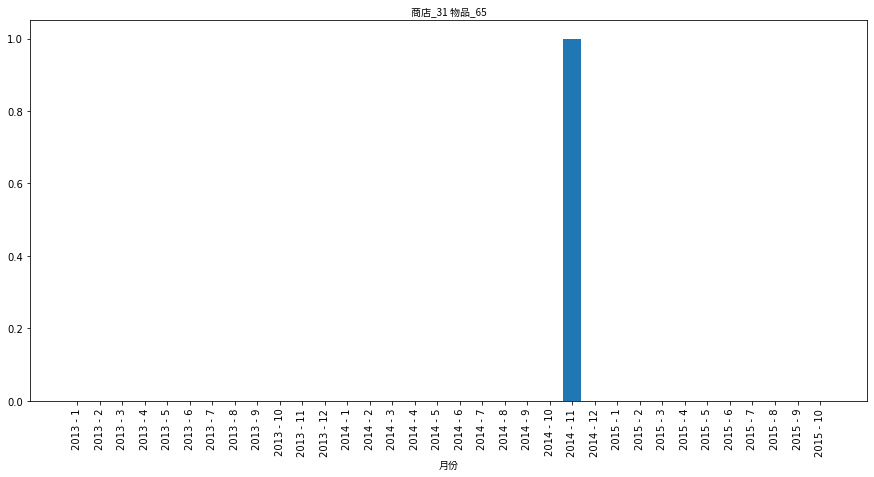

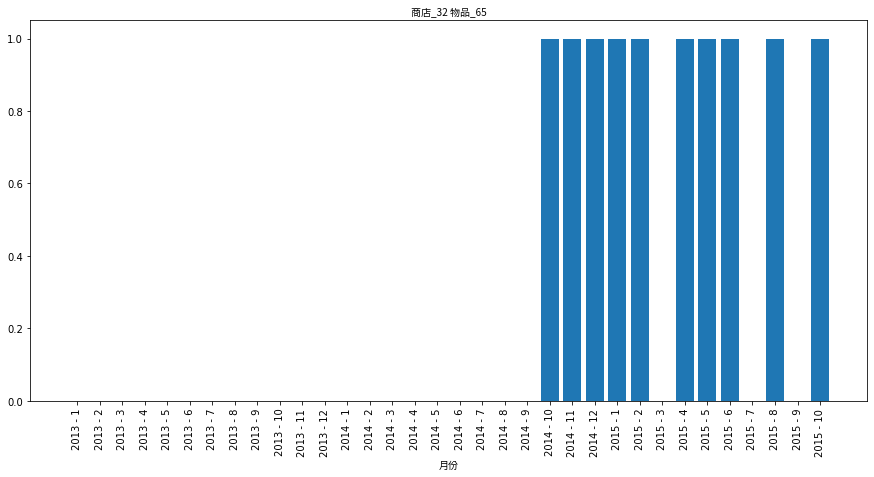

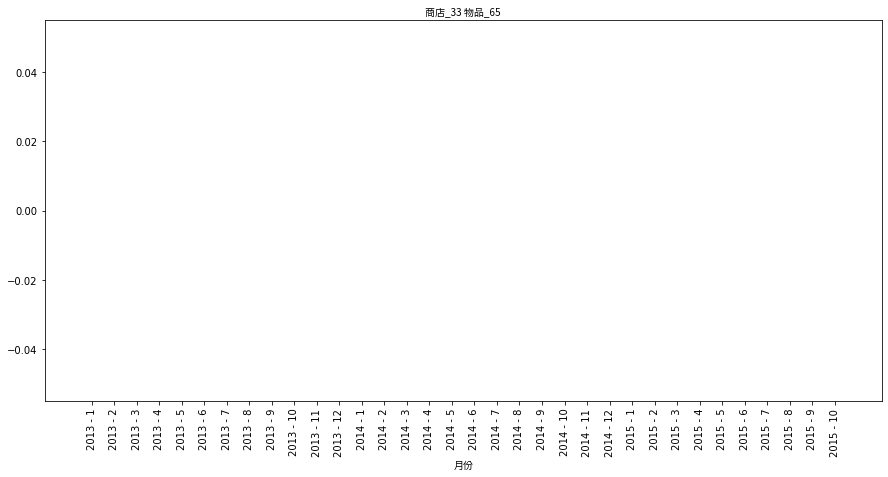

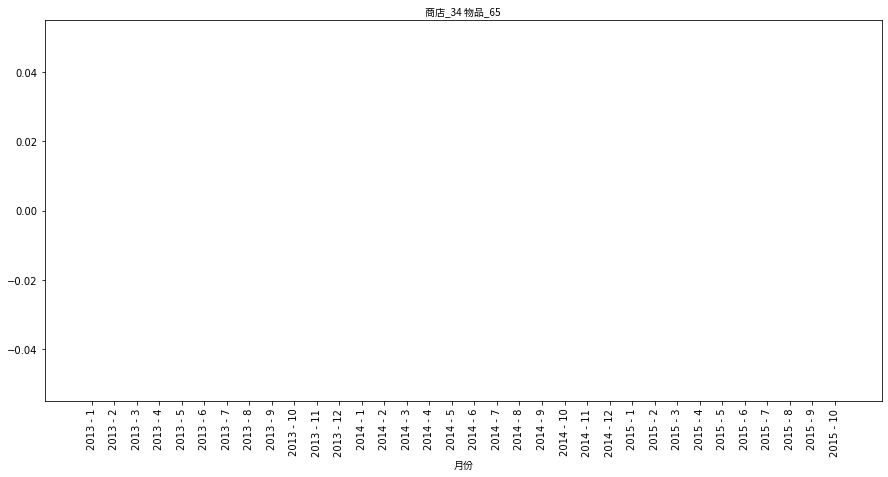

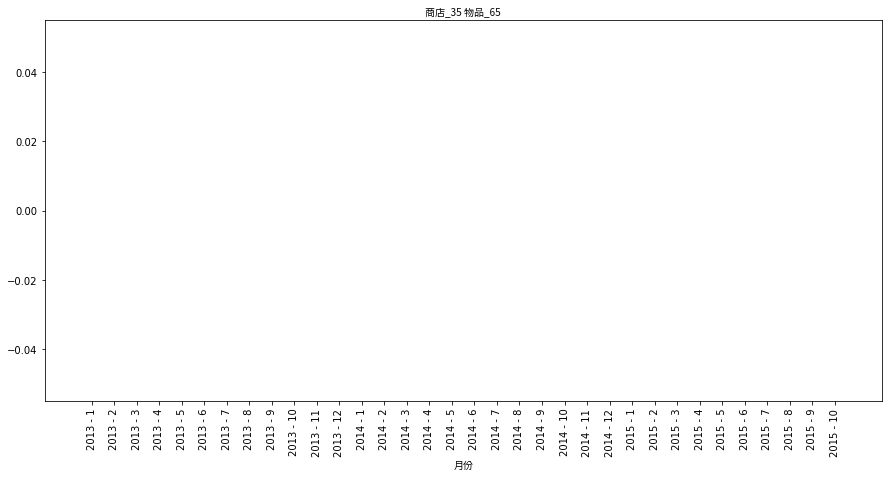

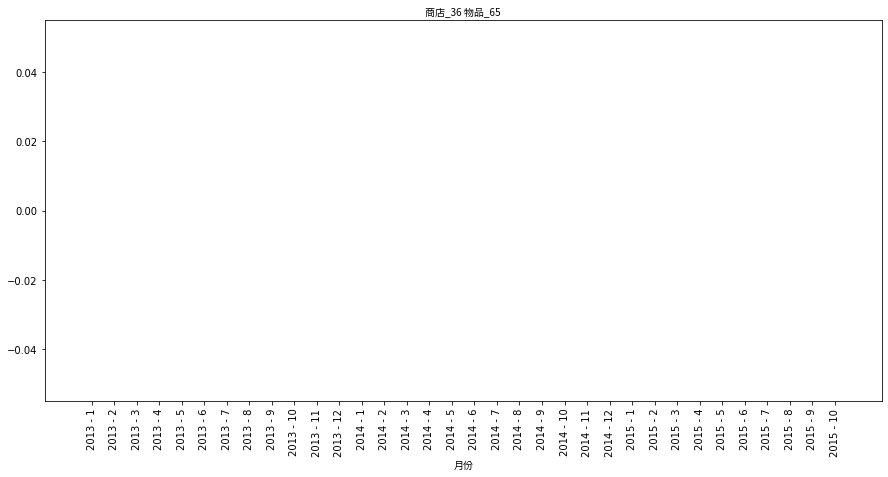

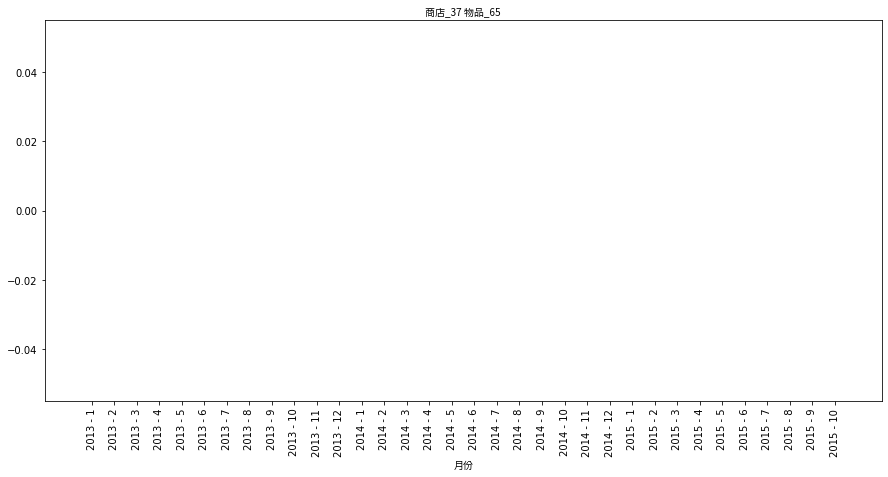

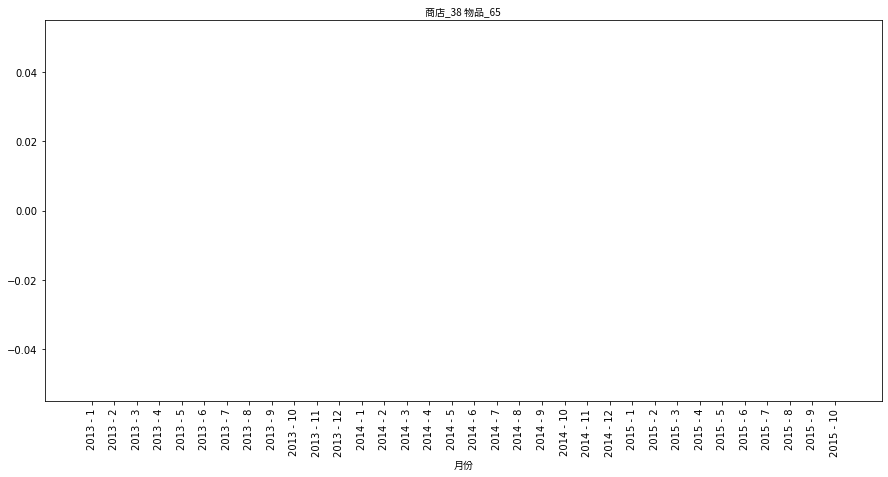

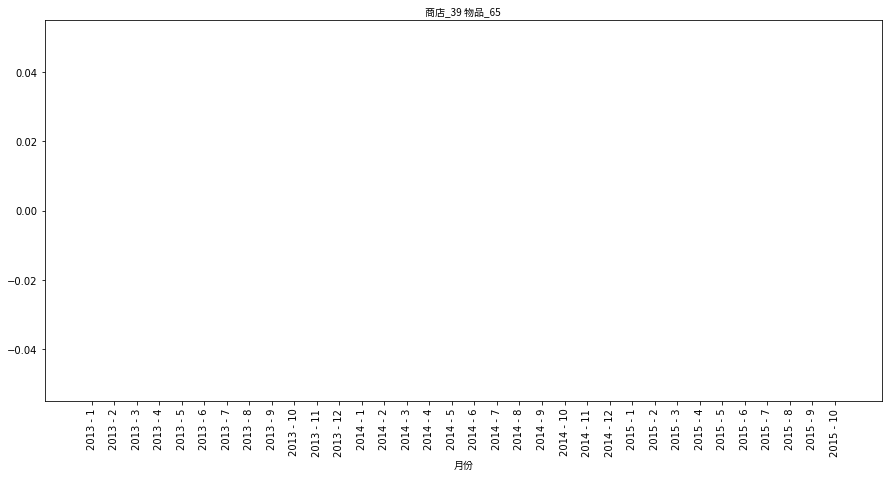

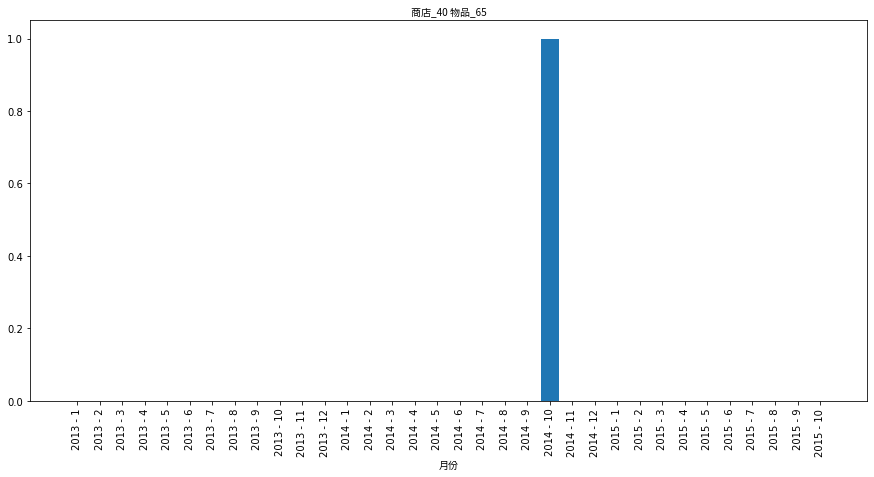

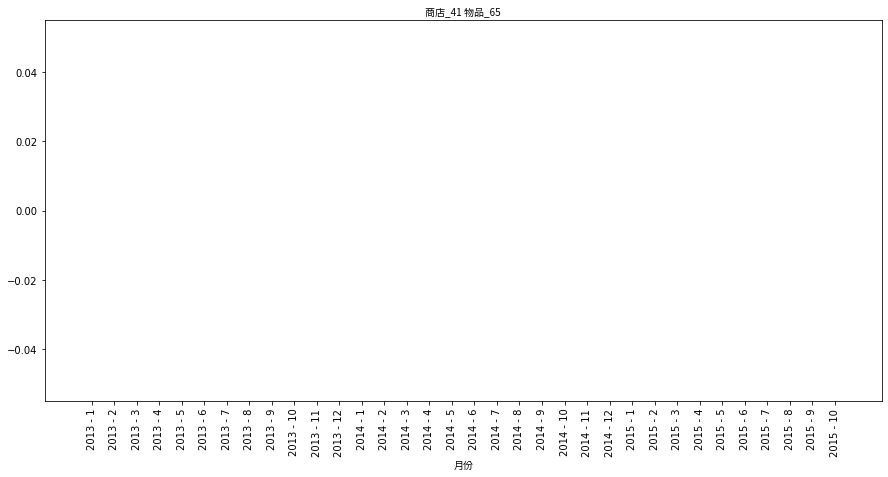

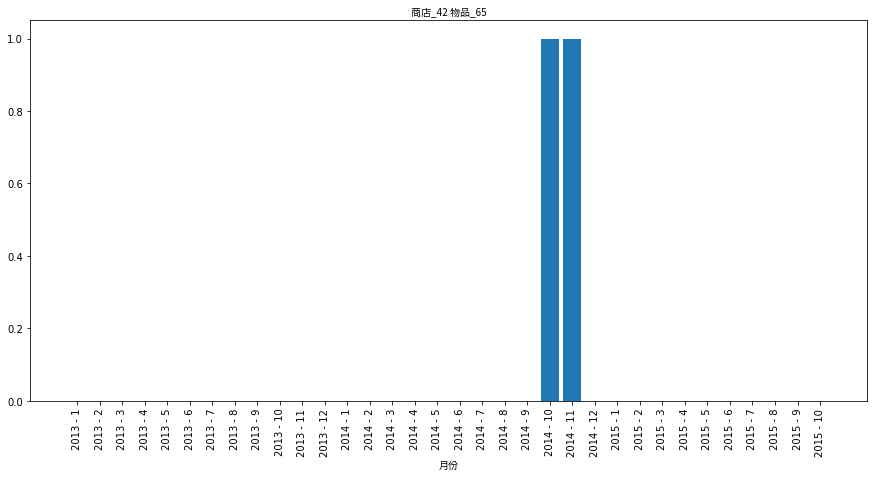

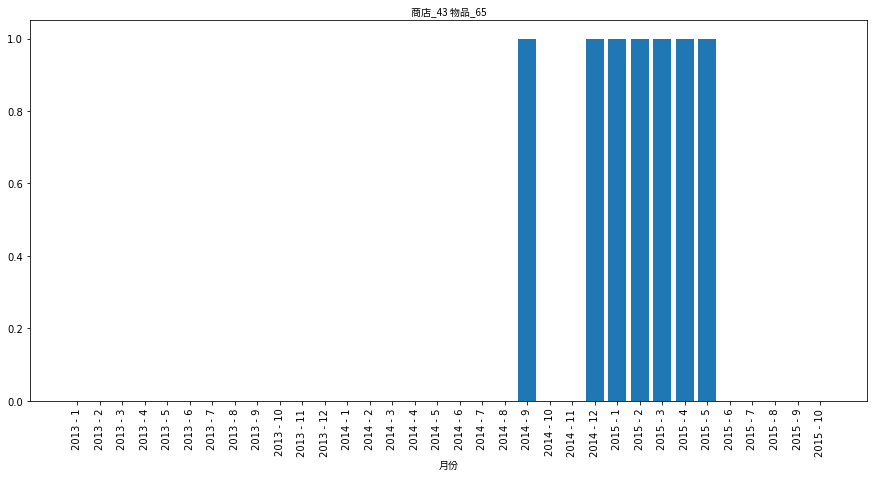

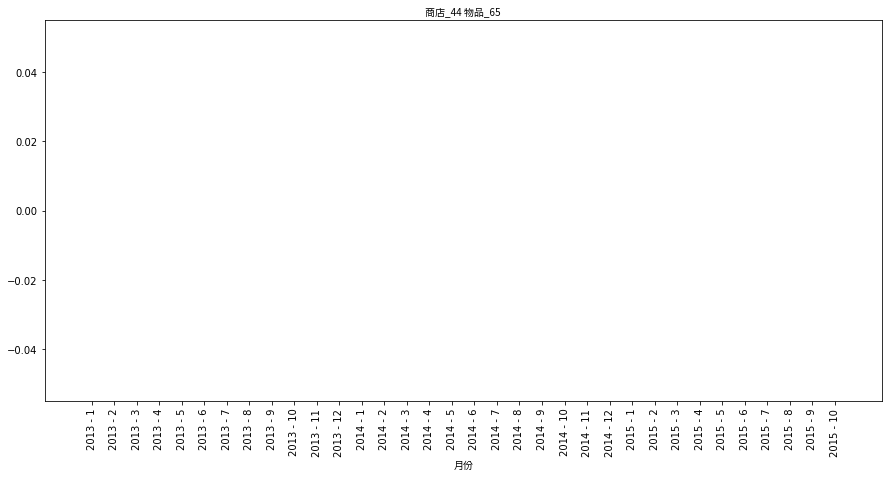

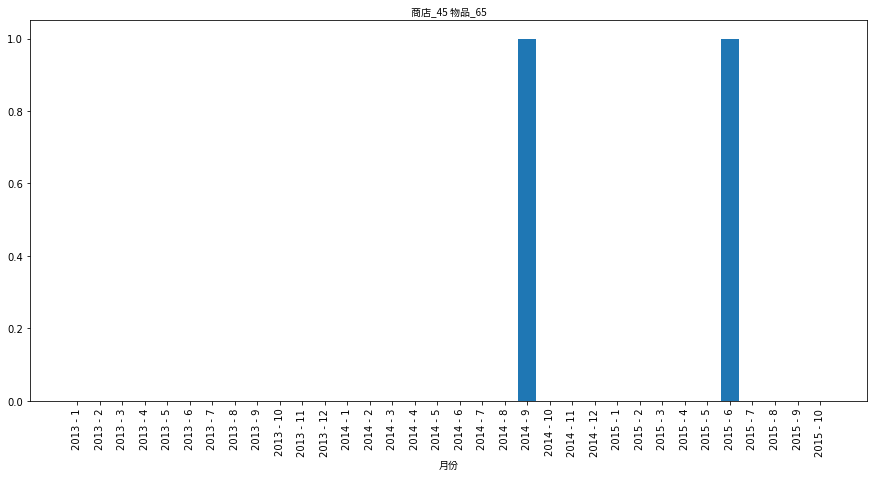

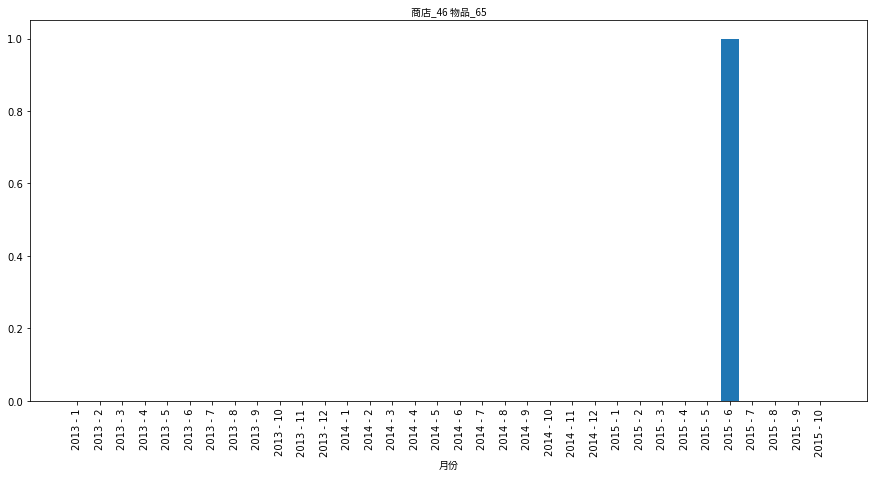

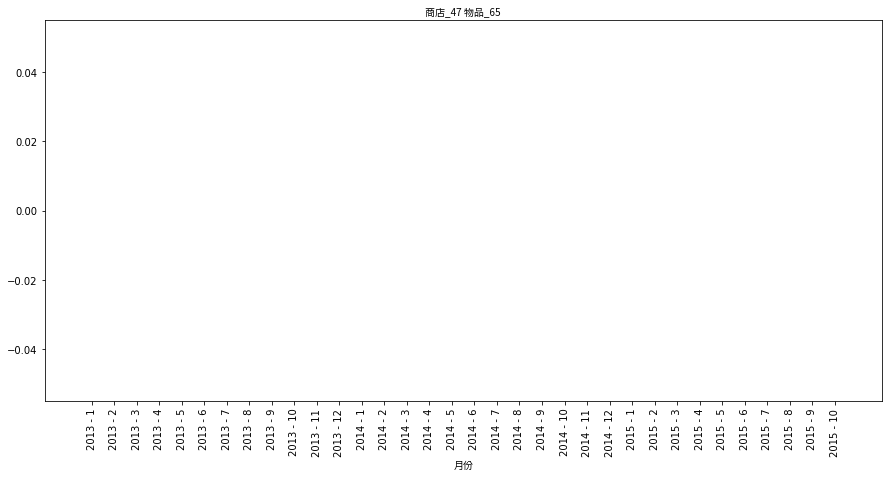

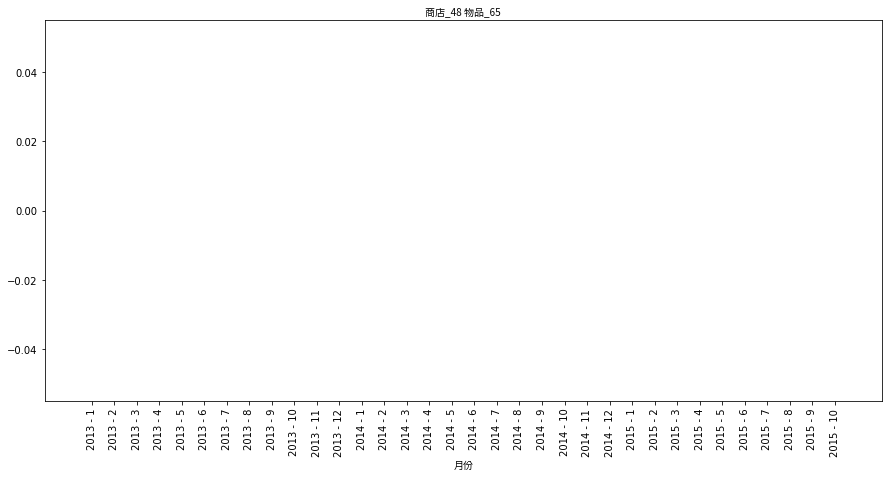

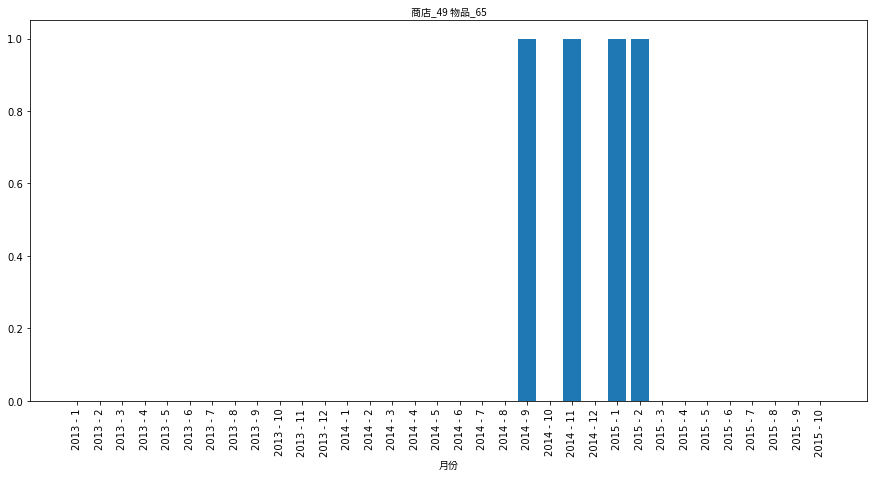

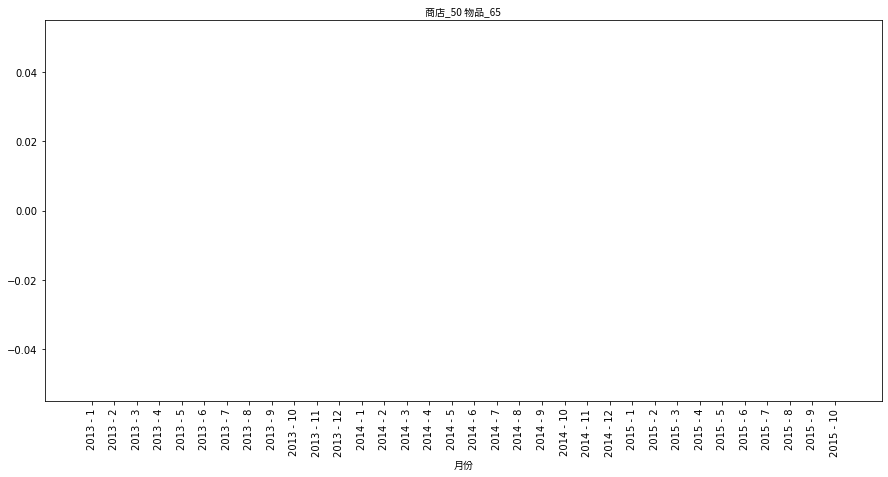

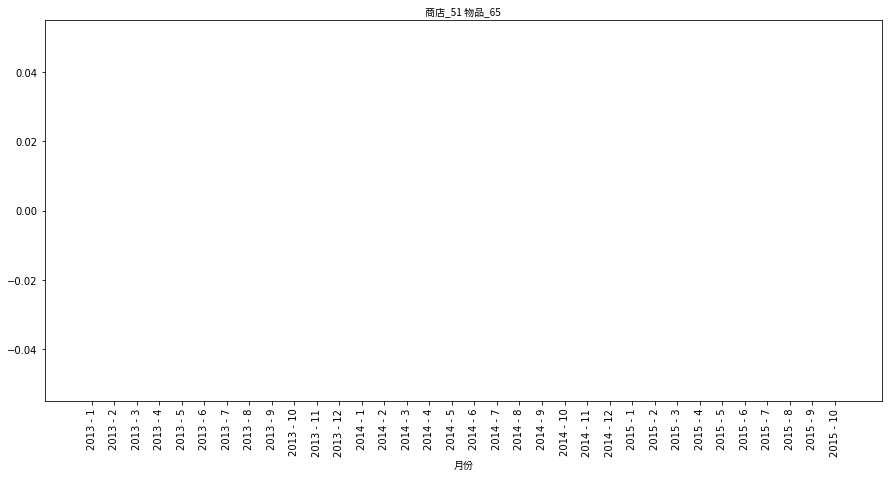

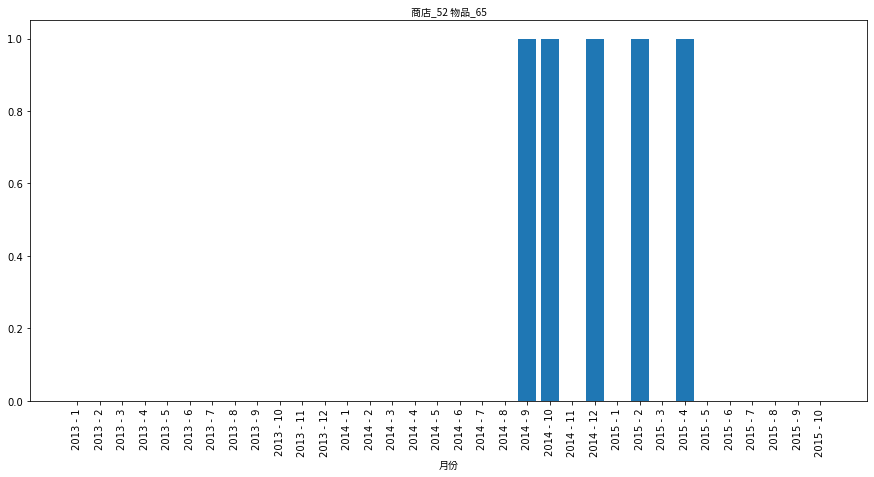

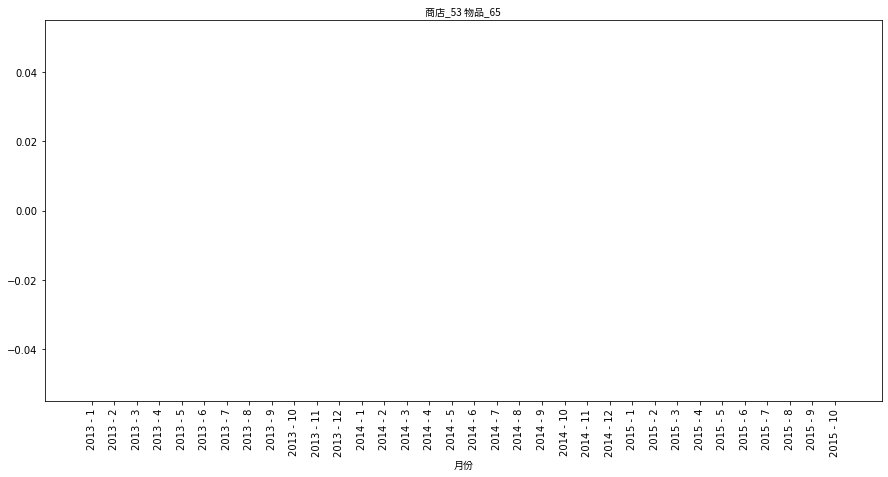

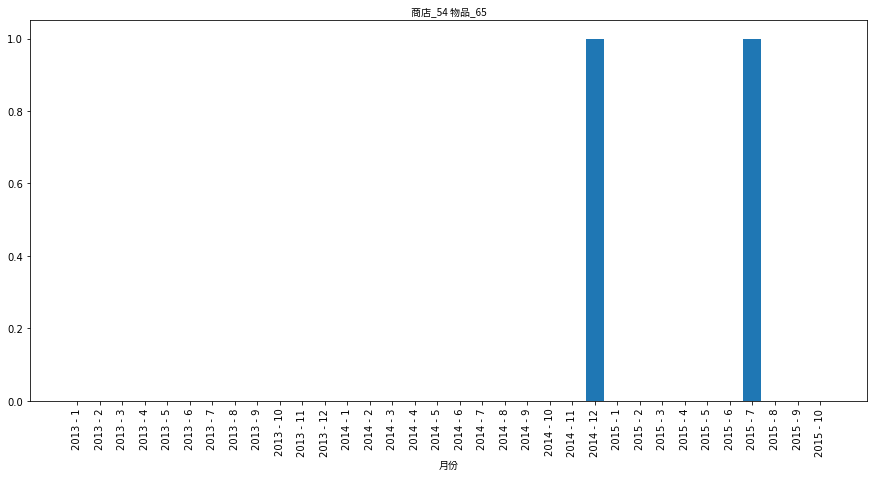

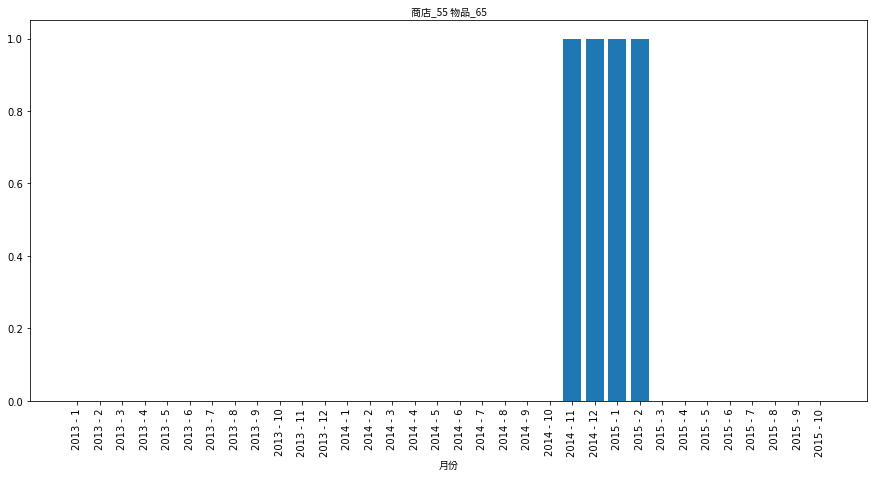

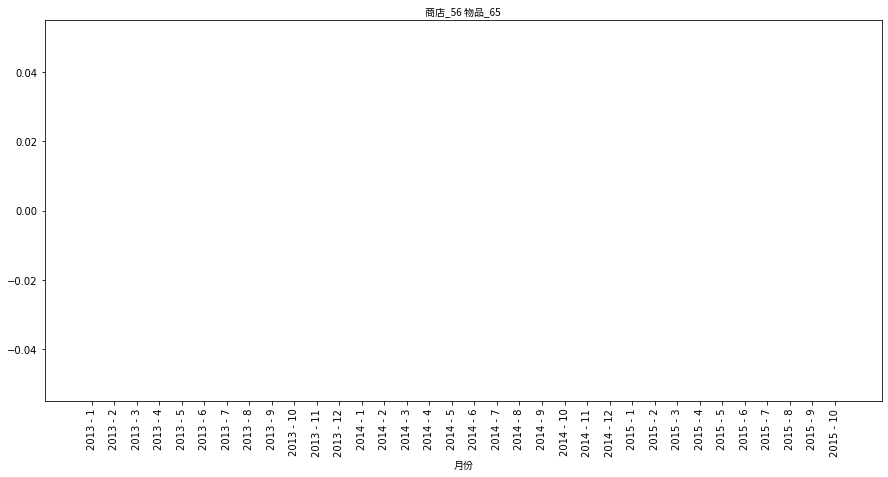

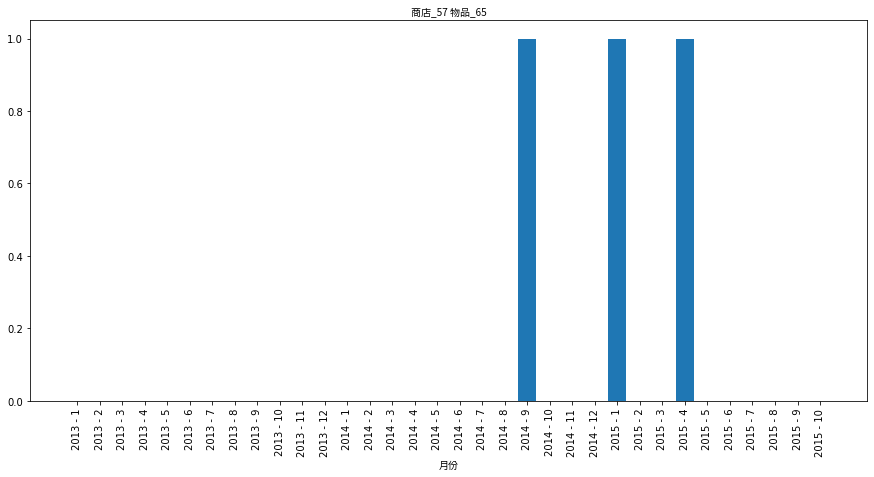

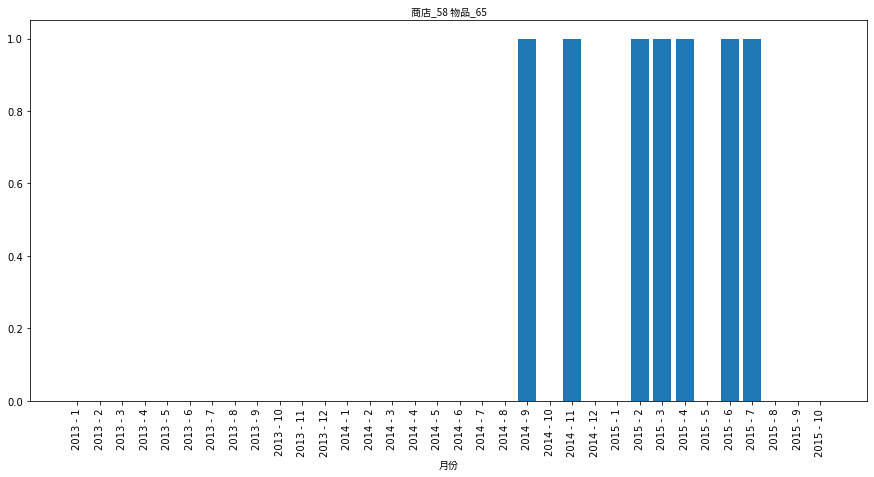

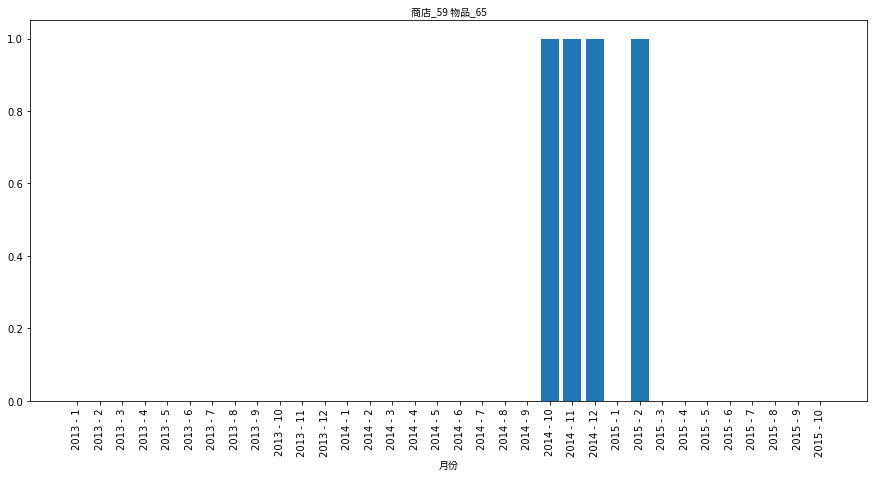

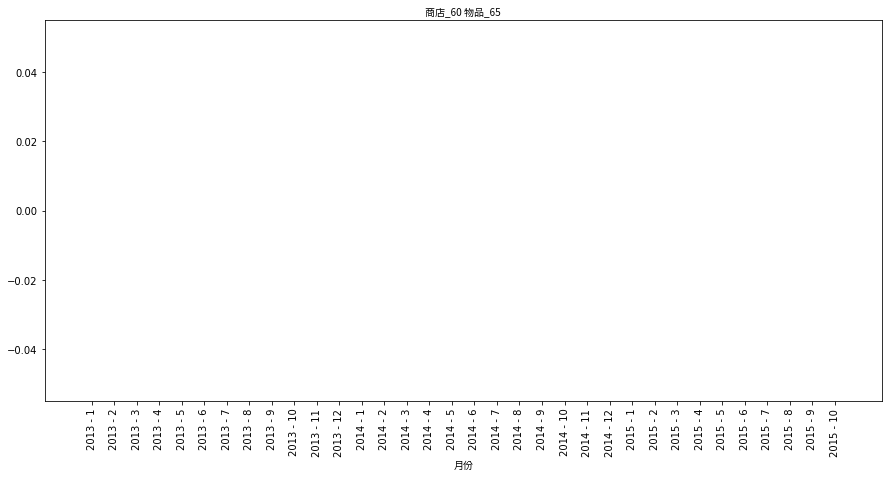

In [ ]:

item = 64
for shop in range(shop_cnt):
    plt.figure(figsize=(15,7))

    plt.bar(range(month_cnt),d[:,shop,item,0])

    dateList = pd.date_range(start='01/02/2013', periods=34, freq='M')
    label = [f'{d.year} - {d.month}' for d in dateList]
    plt.xticks(ticks=range(34), labels=label, rotation=90)        
            
    plt.xlabel('月份',fontproperties=myfont) 

    plt.title(f'商店_{shop+1} 物品_{item+1}',fontproperties=myfont)

# 前處理

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

In [4]:
myfont = FontProperties(fname=r'./data/TaipeiSansTCBeta-Regular.ttf')

讀取

In [5]:
df = pd.read_csv('./data/sales_train.csv')

In [6]:
df_itemCategory = pd.read_csv('./data/items.csv')

In [7]:
df['date'] = [datetime.strptime(date_str, "%d.%m.%Y") for date_str in df['date'].values]

In [8]:
item_cate = {}
for i in df_itemCategory.index:
    item_cate[df_itemCategory['item_id'][i]] = df_itemCategory['item_category_id'][i]
df['item_category_id'] = [item_cate[item_id] for item_id in df['item_id']]

In [9]:
pd.set_option('max_columns', None)
print(df)
print(df.keys())

              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3              

In [10]:
month_cnt = np.unique(df['date_block_num']).shape[0]
shop_cnt = np.unique(df['shop_id']).shape[0]
cate_cnt = np.unique(df['item_category_id']).shape[0]
item_cnt = np.unique(df_itemCategory['item_id']).shape[0]

print('month_cnt -> ', month_cnt)
print('shop_cnt -> ', shop_cnt)
print('cate_cnt -> ', cate_cnt)
print('item_cnt -> ', item_cnt)

month_cnt ->  34
shop_cnt ->  60
cate_cnt ->  84
item_cnt ->  22170


In [11]:
# [month,shop,item,(count,category)]
d = np.zeros([month_cnt,shop_cnt,item_cnt,2])

In [12]:
shop_id = df['shop_id']
item_id = df['item_id']
month_id = df['date_block_num']
item_id_cnt = df['item_cnt_day']
cate_id = df['item_category_id']

for month in range(month_cnt):
    for shop in range(shop_cnt):        
        select_item_id = item_id[(month_id == month) & (shop_id == shop)]
        select_item_cnt = item_id_cnt[(month_id == month) & (shop_id == shop)]
                
        d[month,shop,select_item_id,0] += select_item_cnt   

d[:,:,:,1] = df_itemCategory['item_category_id']

In [13]:
data_input = np.zeros([item_cnt*shop_cnt,month_cnt,2])

wn = np.blackman(8)

In [14]:
from itertools import product

for n,(shop,item) in enumerate(product(range(shop_cnt),range(item_cnt))):    
    data_input[n,:,0] = np.convolve(d[:,shop,item,0],wn,mode='same')   

    data_input[n,:,1] = d[:,shop,item,1] 

In [15]:
print(data_input.shape)

(1330200, 34, 2)


In [16]:
SEQ_LENGTH = 12
N, TIME_LENGTH, FEATURE_LENGTH = data_input.shape

**TRAIN_DATA**

In [17]:
train_N = N * (TIME_LENGTH - SEQ_LENGTH)
print(train_N)

29264400


In [18]:
x, y = list(), list()
for i in range(0,TIME_LENGTH - (SEQ_LENGTH + 1) + 1, 1):    
    slice_data = data_input[:,i:i+SEQ_LENGTH+1,:]
    
    x.append(slice_data[:,:-1,:])
    y.append(slice_data[:,-1:,0])    


In [19]:
train_x = np.vstack(x)
del x

In [20]:
train_y = np.vstack(y)
del y

**TEST_DATA**

In [21]:
test_x = data_input[:,-SEQ_LENGTH:,:]
print(test_x.shape)

(1330200, 12, 2)


# 訓練模型

In [22]:
import tensorflow as tf
import tensorflow.keras as keras

In [29]:
class predictModel(keras.Model):
    def __init__(self):
        super(predictModel, self).__init__()
        
        self.lstm = keras.layers.LSTM(20, activation='tanh')
        
        self.dense_1 = keras.layers.Dense(10, activation='tanh')
        self.dense_2 = keras.layers.Dense(1)
        
    def call(self,x):
        
        pred = self.lstm(x)
        
        pred = self.dense_1(pred)
        
        pred = self.dense_2(pred)        
        print(pred.shape)
        return pred

In [30]:
model = predictModel()

model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError())

model.fit(x=train_x, y=train_y,batch_size=64,epochs=60,verbose=1)

Epoch 1/60


NotImplementedError: in user code:

    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    <ipython-input-29-2f3db544561a>:12 call  *
        pred = self.lstm(x)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:668 __call__  **
        return super(RNN, self).__call__(inputs, **kwargs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent_v2.py:1153 call
        inputs, initial_state, _ = self._process_inputs(inputs, initial_state, None)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:868 _process_inputs
        initial_state = self.get_initial_state(inputs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:650 get_initial_state
        init_state = get_initial_state_fn(
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:2516 get_initial_state
        return list(_generate_zero_filled_state_for_cell(
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:2998 _generate_zero_filled_state_for_cell
        return _generate_zero_filled_state(batch_size, cell.state_size, dtype)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:3014 _generate_zero_filled_state
        return nest.map_structure(create_zeros, state_size)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\util\nest.py:867 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\util\nest.py:867 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:3011 create_zeros
        return array_ops.zeros(init_state_size, dtype=dtype)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\ops\array_ops.py:2911 wrapped
        tensor = fun(*args, **kwargs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\ops\array_ops.py:2960 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\ops\array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\numpy\core\fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\numpy\core\fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\Users\randy\.virtualenvs\DSAI_HW4_PredictFutureSales-Crwfscut\lib\site-packages\tensorflow\python\framework\ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (predict_model_3/lstm_3/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


# TEST(不要管這個)

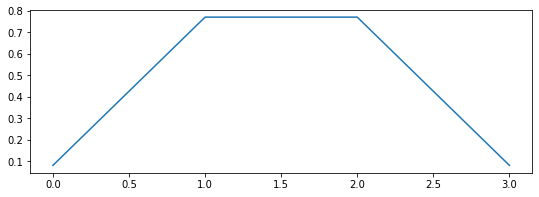

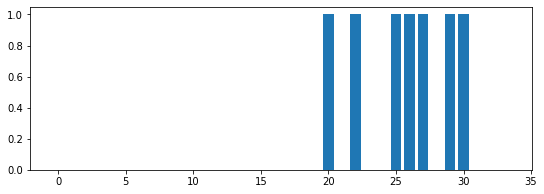

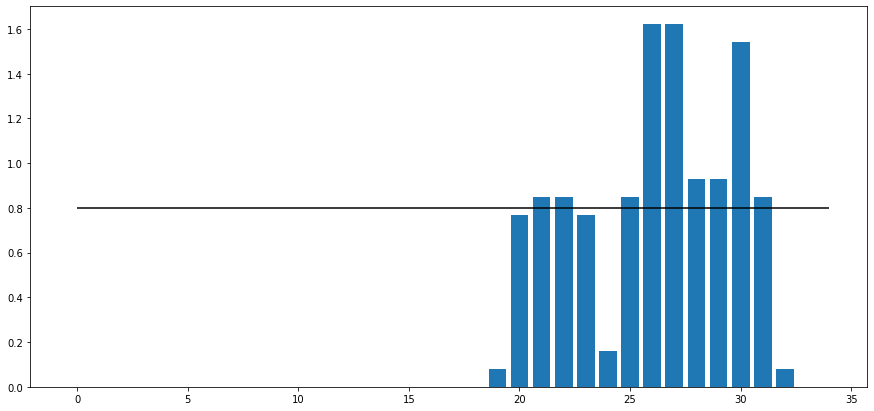

In [ ]:
wn = np.hamming(4)
dn = d[:,57,64,0]

plt.figure(figsize=(9,3))
plt.plot(wn)
plt.figure(figsize=(9,3))
plt.bar(range(month_cnt),dn)


plt.figure(figsize=(15,7))
plt.bar(range(month_cnt),np.convolve(dn,wn,mode='same'))
plt.hlines(y=0.8,xmin=0,xmax=len(sum))
